<a href="https://colab.research.google.com/github/jonathanluo23/6545/blob/main/Capstone_All_NBA_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pd.options.display.max_columns = 500

#import data, merging data, and data asplicing 

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2012_target - raw_allnba_2012.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2013_target - raw_allnba_2013.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2014_target - raw_allnba_2014.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2015_target - raw_allnba_2015.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2016_target - raw_allnba_2016.csv')
df_6 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2017_target - raw_allnba_2017.csv')
df_7 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2018_target - raw_allnba_2018.csv')
df_8 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2019_target - raw_allnba_2019.csv')
df_9 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2020_target - raw_allnba_2020.csv')
df_10 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2021_target - raw_allnba_2021.csv')
df_11 = pd.read_csv('/content/drive/MyDrive/Capstone/all nba raw data /raw_allnba_2022_target - raw_allnba_2022.csv')



In [ ]:
df_10.isna().sum()

Unnamed: 0               0
PLAYER_NAME_x            0
PLAYER_ID                0
year                     0
GP_x                     0
                        ..
PCT_BOX_OUTS_DEF         0
PCT_BOX_OUTS_TEAM_REB    0
PCT_BOX_OUTS_REB         0
POSITION                 0
Y                        0
Length: 80, dtype: int64

In [ ]:
all_nba_df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11])

In [ ]:
test = all_nba_df[all_nba_df['Y'] == 1]

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
test.count()

Unnamed: 0                       165
PLAYER_NAME_x                    165
PLAYER_ID                        165
year                             165
GP_x                             165
W_PCT_x                          165
OFF_RATING                       165
DEF_RATING                       165
NET_RATING                       165
AST_PCT                          165
AST_TO                           165
TM_TOV_PCT                       165
TS_PCT                           165
OREB_PCT                         165
DREB_PCT                         165
REB_PCT                          165
EFG_PCT                          165
PIE                              165
USG_PCT                          165
TS_PCT.1                         165
PACE                             165
POSS                             165
PLAYER_NAME_y                    165
NICKNAME                         165
TEAM_ID_x                        165
TEAM_ABBREVIATION_x              165
AGE_x                            165
G

In [ ]:
all_nba_df

Unnamed: 0    PLAYER_NAME_x  PLAYER_ID  year  GP_x  W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TO  TM_TOV_PCT  TS_PCT  OREB_PCT  DREB_PCT  REB_PCT  EFG_PCT    PIE  USG_PCT  TS_PCT.1    PACE  POSS    PLAYER_NAME_y NICKNAME   TEAM_ID_x TEAM_ABBREVIATION_x  AGE_x  GP_y   W   L  W_PCT_y  MIN_x  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  TOV  STL  BLK   PF   PTS  PLUS_MINUS      PLAYER_NAME   TEAM_ID_y TEAM_ABBREVIATION_y  AGE_y   G  MIN_y  CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  CONTESTED_SHOTS_3PT  DEFLECTIONS  CHARGES_DRAWN  SCREEN_ASSISTS  SCREEN_AST_PTS  OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  LOOSE_BALLS_RECOVERED  PCT_LOOSE_BALLS_RECOVERED_OFF  PCT_LOOSE_BALLS_RECOVERED_DEF  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUTS  BOX_OUT_PLAYER_TEAM_REBS  BOX_OUT_PLAYER_REBS  PCT_BOX_OUTS_OFF  PCT_BOX_OUTS_DEF  PCT_BOX_OUTS_TEAM_REB  PCT_BOX_OUTS_REB POSITION  Y
0             0         AJ Price     201985  2012    44    0.614        98.9        97.7         1.2    0.264    2.69        10.4   0.454     0.021     0.092    0.054    0.414  0.095    0.171     0.454   93.50  1118         AJ Price       AJ  1610612754                 IND     25    44  27  17    0.614   12.9  1.3   4.0   0.339   0.6   2.0    0.295  0.6  0.8   0.800   0.3   1.1  1.4  2.0  0.7  0.5  0.0  0.7   3.9         0.8         AJ Price  1610612754                 IND     25  44   12.9             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        G  0
1             1       Aaron Gray     201189  2012    49    0.347        96.4       106.5       -10.0    0.055    0.53        19.6   0.526     0.105     0.265    0.183    0.516  0.078    0.134     0.526   90.64  1535       Aaron Gray    Aaron  1610612761                 TOR     27    49  17  32    0.347   16.6  1.7   3.3   0.516   0.0   0.0    0.000  0.5  1.0   0.532   1.7   4.0  5.7  0.6  1.0  0.4  0.3  2.6   3.9        -3.1       Aaron Gray  1610612761                 TOR     27  49   16.6             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        C  0
2             2    Al Harrington       1733  2012    64    0.563       107.5       102.5         5.0    0.083    0.79        10.6   0.535     0.042     0.181    0.113    0.512  0.104    0.241     0.535   95.95  3516    Al Harrington       Al  1610612743                 DEN     32    64  36  28    0.563   27.5  5.4  12.1   0.446   1.6   4.7    0.333  1.9  2.8   0.676   1.1   5.0  6.1  1.4  1.8  0.9  0.2  2.8  14.2         2.6    Al Harrington  1610612743                 DEN     32  64   27.5             0.00                 0.00                 0.00         0.00           0.00            0.00            0.00                       0.00                       0.00                   0.00                          0.000                          0.000         0.00         0.00      0.00                      0.00                 0.00             0.000             0.000                  0.000             0.000        F  0
3             3       Al Horford     201143  2012    11    0.636       108.6       100.3         8.3    0.113    1.50        10.4   0.585     0.077     0.156    0.116    0.553  0.130    0.174     0.585   90.07   652       Al Horford       Al  1610612737                 ATL     26    11   7   4    0.6

In [ ]:
col = all_nba_df.columns.T
col

Index(['Unnamed: 0', 'PLAYER_NAME_x', 'PLAYER_ID', 'year', 'GP_x', 'W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS', 'PLAYER_NAME_y', 'NICKNAME', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x', 'AGE_x', 'GP_y', 'W', 'L', 'W_PCT_y', 'MIN_x', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS', 'PLAYER_NAME', 'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'AGE_y', 'G', 'MIN_y', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'PCT_LOOSE_BALLS_RECOVERED_OFF', 'PCT_LOOSE_BALLS_RECOVERED_DEF', 'OFF_BOXOUTS', 'DEF_BOXOUTS', 'BOX_OUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS', 'PCT_BOX_OUTS_OFF',
       'P

In [ ]:
all_nba_df = all_nba_df[['PLAYER_ID','PLAYER_NAME_x','AGE_x','year', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x','GP_x','W', 'L','W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS','POSITION', 'Y']]

In [ ]:
all_nba_df.isna().sum()

PLAYER_ID              0
PLAYER_NAME_x          0
AGE_x                  0
year                   0
TEAM_ID_x              0
TEAM_ABBREVIATION_x    0
GP_x                   0
W                      0
L                      0
W_PCT_x                0
OFF_RATING             0
DEF_RATING             0
NET_RATING             0
AST_PCT                0
AST_TO                 0
TM_TOV_PCT             0
TS_PCT                 0
OREB_PCT               0
DREB_PCT               0
REB_PCT                0
EFG_PCT                0
PIE                    0
USG_PCT                0
TS_PCT.1               0
PACE                   0
POSS                   0
FGM                    0
FGA                    0
FG_PCT                 0
FG3M                   0
FG3A                   0
FG3_PCT                0
FTM                    0
FTA                    0
FT_PCT                 0
OREB                   0
DREB                   0
REB                    0
AST                    0
TOV                    0


| Features | Data Type | Description |
| ------------ | ---------- | ---------- |
OFF_RATING | Integer | Avg. keyword (min. shares)
DEF_RATING | Integer | Avg. keyword (avg. shares)
NET_RATING | Integer | Max. shares of referenced articles in Mashable
x5 | Integer | Avg. shares of referenced articles in Mashable
x13 | Nominal | Was article published on a Saturday?



#Continuous/Categorical-Discrete Data

In [ ]:
Identifiers = all_nba_df[['PLAYER_ID','TEAM_ID_x', 'PLAYER_NAME_x','TEAM_ABBREVIATION_x',]]

In [ ]:
categorical = all_nba_df[['POSITION','year']]

In [ ]:
continous = all_nba_df[[ 'GP_x','W', 'L','W_PCT_x', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'TM_TOV_PCT', 'TS_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'PIE', 'USG_PCT', 'TS_PCT.1', 'PACE', 'POSS','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS']]

In [ ]:
target = all_nba_df[['Y']]

#One hot encoding 

In [ ]:
def label_year(col):
    if col in [2012, 2013]:
        return '2012-13'
    elif col in [2014,2015]:
        return '2014-15'
    elif col in [2016,2017]:
        return '2016-17'
    elif col in [2018,2019]:
        return '2018-19'
    elif col in [2020,2021,2022]:
        return '2020-22'
    else:
        return 'unknown'

In [ ]:
def label_position(col):
    if col in ['C', 'C-F']:
        return 'C or C-F'
    elif col in ['F','F-G','F-C']:
        return 'F or F-G or F-C'
    elif col in ['G','G-F']:
      return 'G or G-F'
    else:
        return 'unknown'

In [ ]:
categorical['label_year'] = categorical['year'].apply(label_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical['label_position'] = categorical['POSITION'].apply(label_position)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical[['label_year','year','label_position','POSITION']]

label_year  year   label_position POSITION
0      2012-13  2012         G or G-F        G
1      2012-13  2012         C or C-F        C
2      2012-13  2012  F or F-G or F-C        F
3      2012-13  2012         C or C-F      C-F
4      2012-13  2012         C or C-F        C
..         ...   ...              ...      ...
600    2020-22  2022         G or G-F      G-F
601    2020-22  2022         G or G-F        G
602    2020-22  2022  F or F-G or F-C      F-C
603    2020-22  2022  F or F-G or F-C        F
604    2020-22  2022  F or F-G or F-C        F

[5627 rows x 4 columns]

In [ ]:
categorical.drop(['year','POSITION'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.columns.values

array(['label_year', 'label_position'], dtype=object)

In [ ]:
categorical = pd.get_dummies(categorical)

In [ ]:
categorical

label_year_2012-13  label_year_2014-15  label_year_2016-17  label_year_2018-19  label_year_2020-22  label_position_C or C-F  label_position_F or F-G or F-C  label_position_G or G-F
0                     1                   0                   0                   0                   0                        0                               0                        1
1                     1                   0                   0                   0                   0                        1                               0                        0
2                     1                   0                   0                   0                   0                        0                               1                        0
3                     1                   0                   0                   0                   0                        1                               0                        0
4                     1                   0                   0                   0                   0                        1                               0                        0
..                  ...                 ...                 ...                 ...                 ...                      ...                             ...                      ...
600                   0                   0                   0                   0                   1                        0                               0                        1
601                   0                   0                   0                   0                   1                        0                               0                        1
602                   0                   0                   0                   0                   1                        0                               1                        0
603                   0                   0                   0                   0                   1                        0                               1                        0
604                   0                   0                   0                   0                   1                        0                               1                        0

[5627 rows x 8 columns]

#EDA

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 8.4 MB/s 


In [ ]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


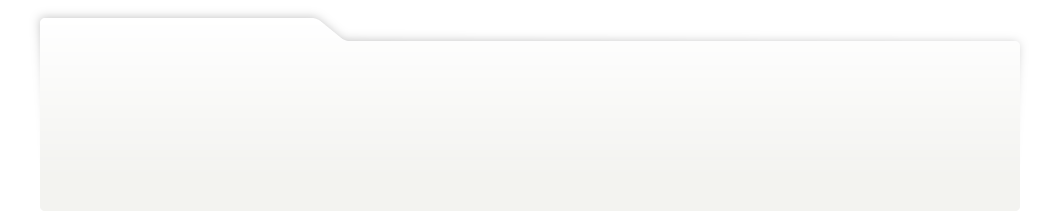
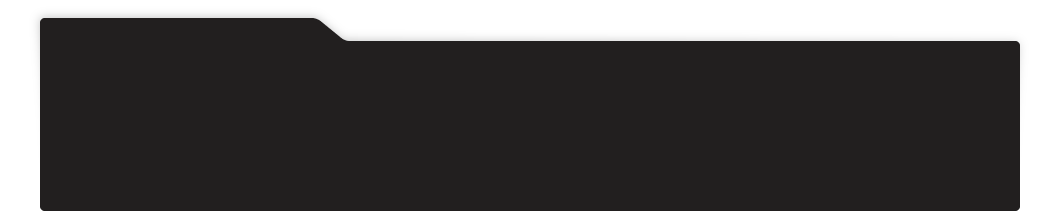
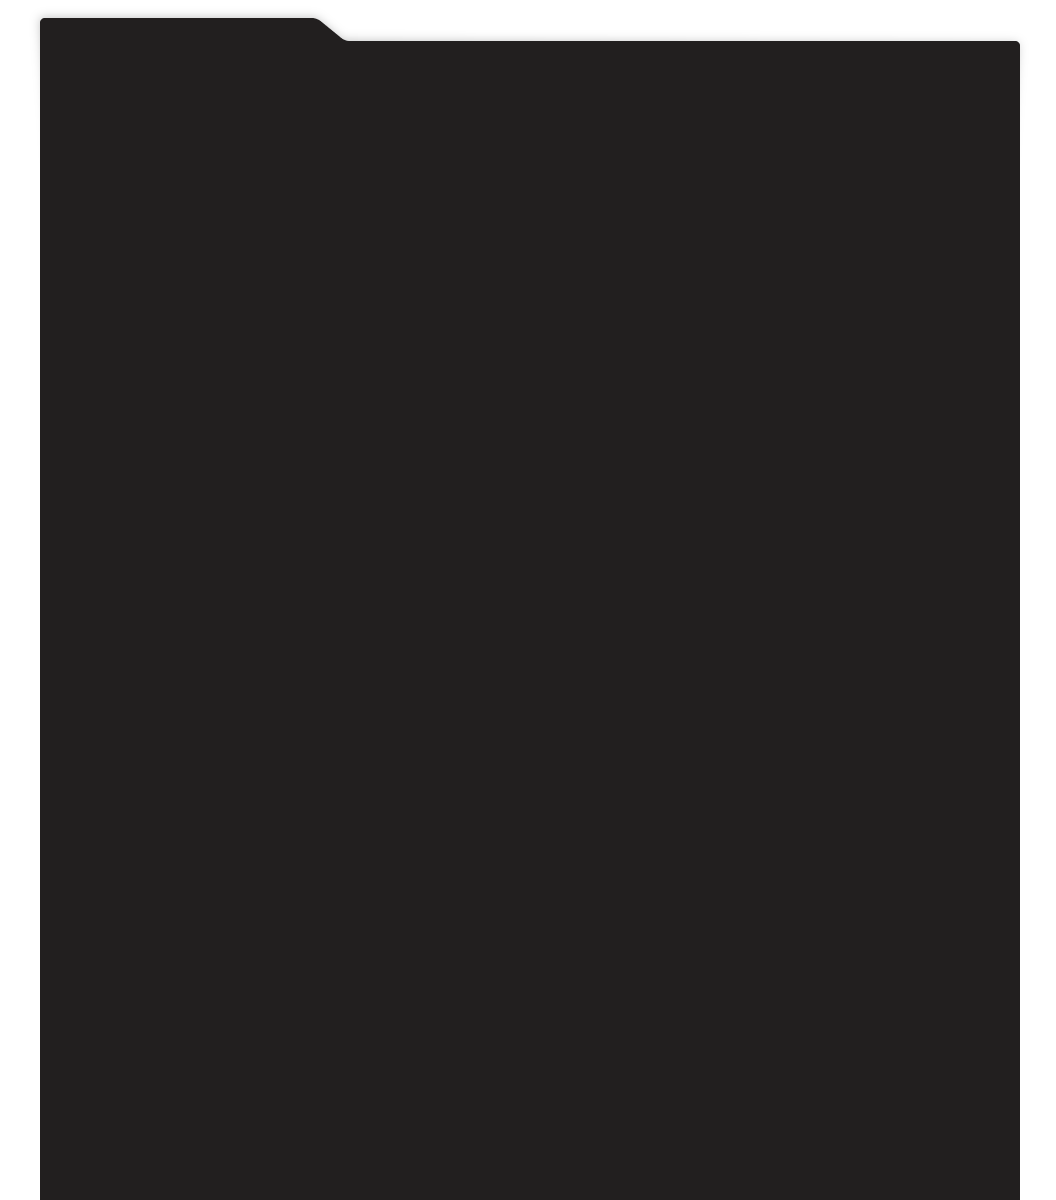
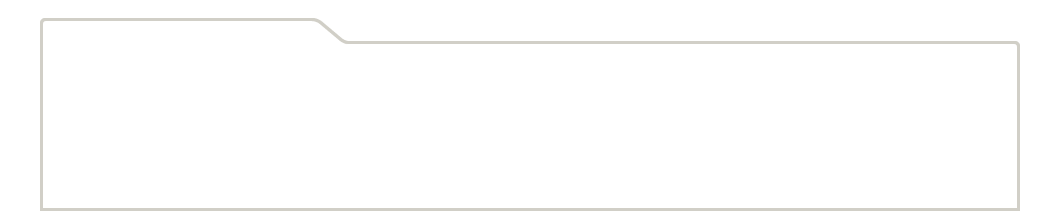
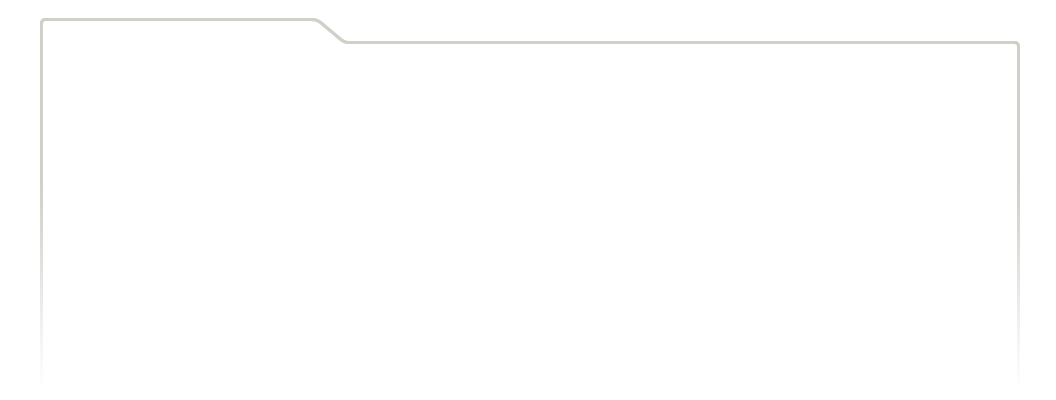
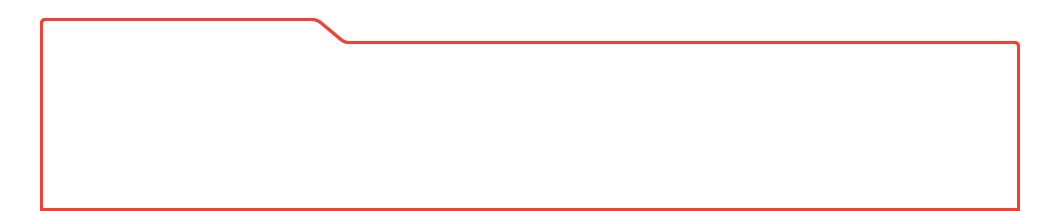
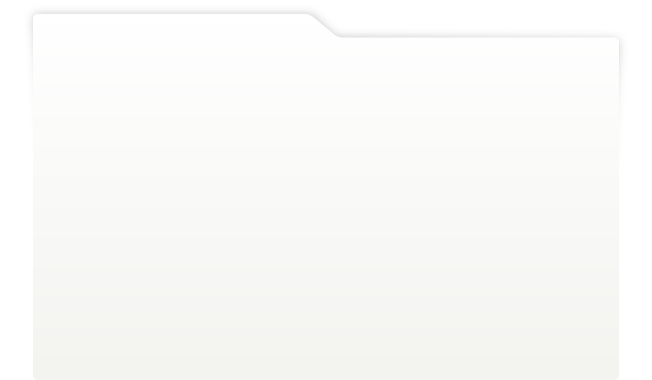
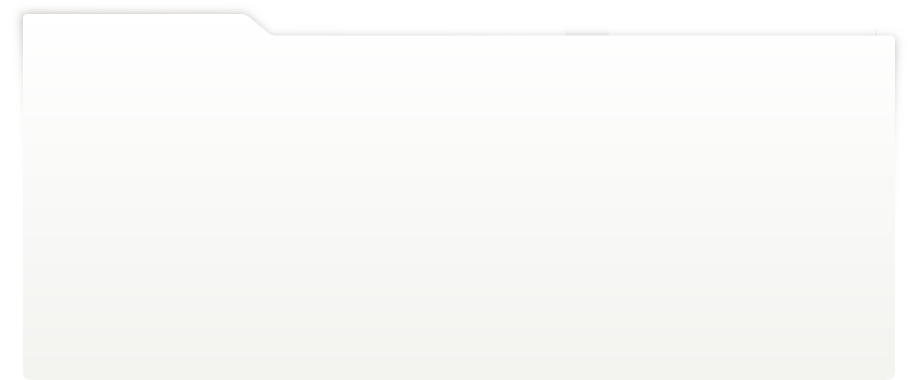
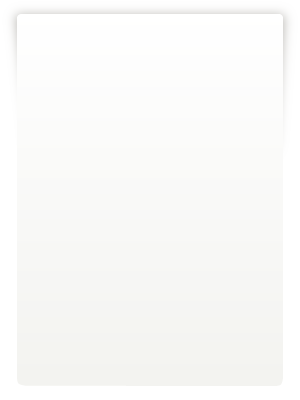
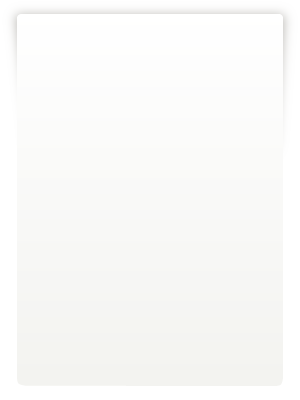
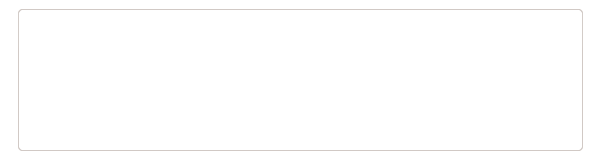
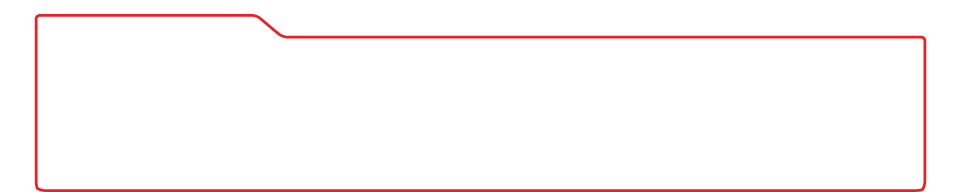
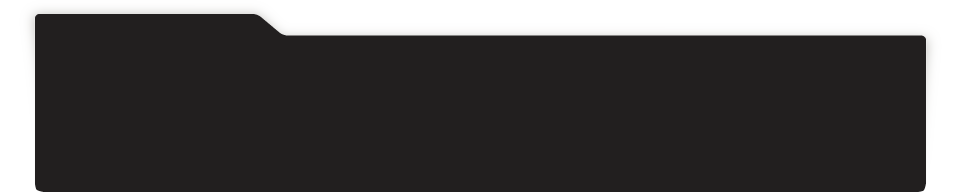
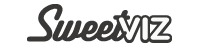
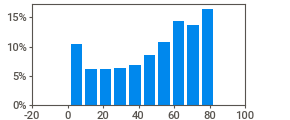
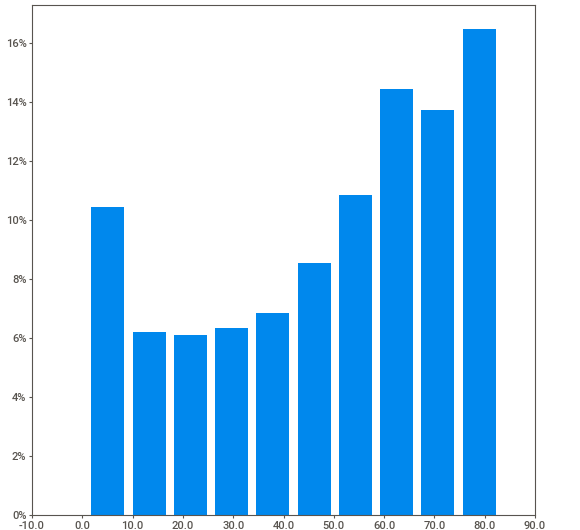
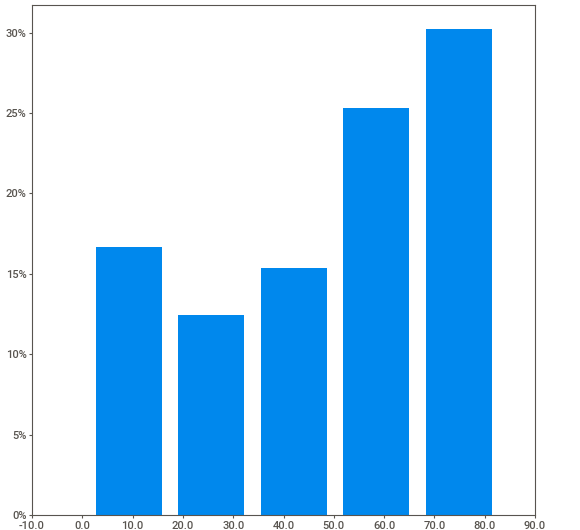
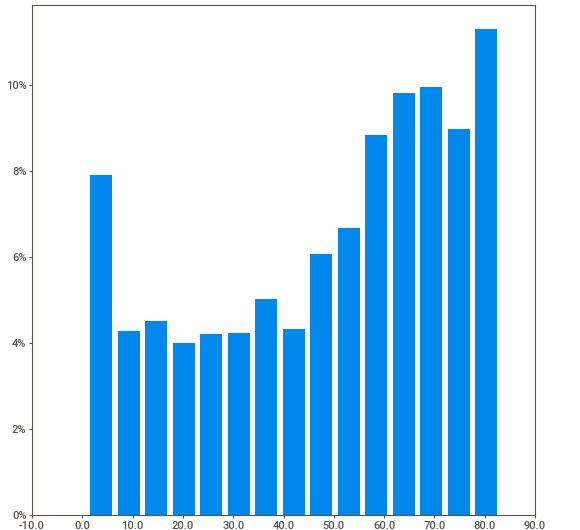
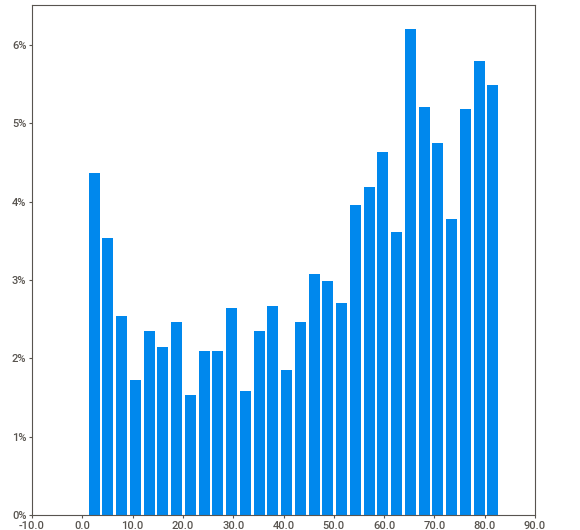
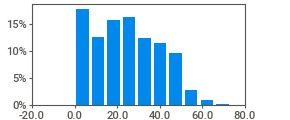
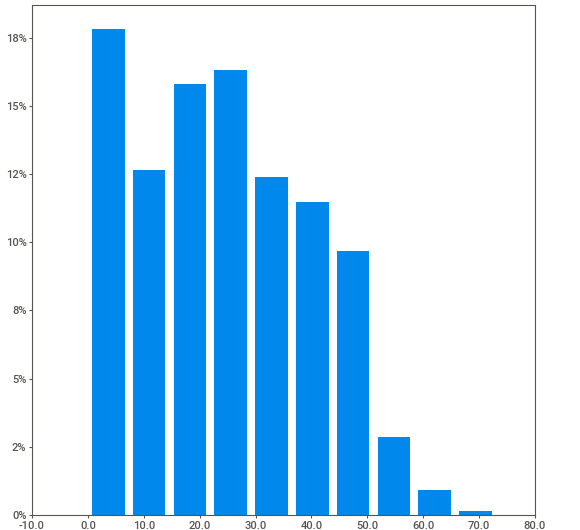
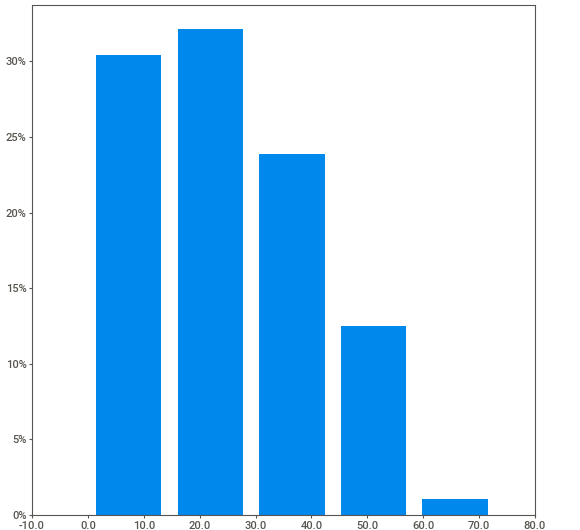
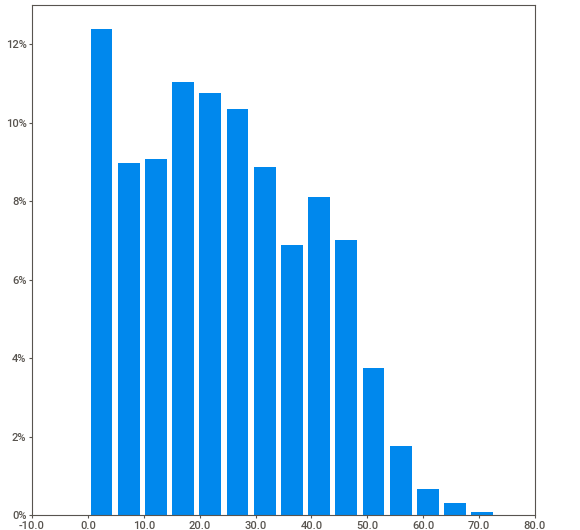
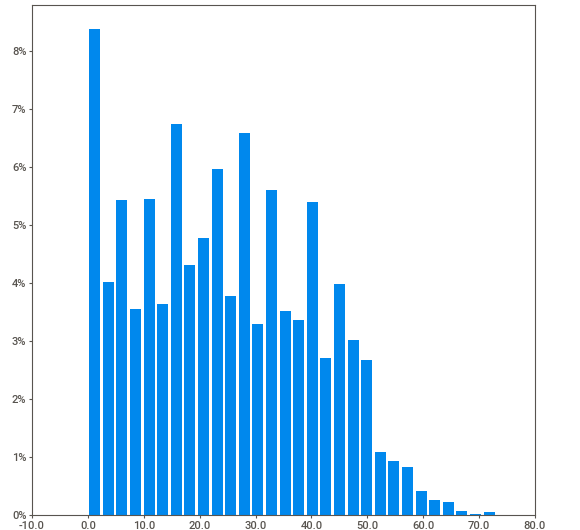
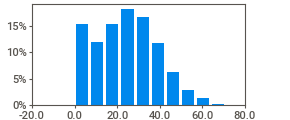
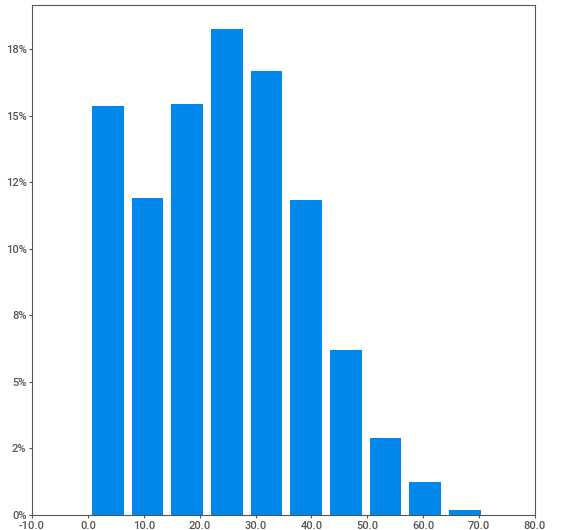
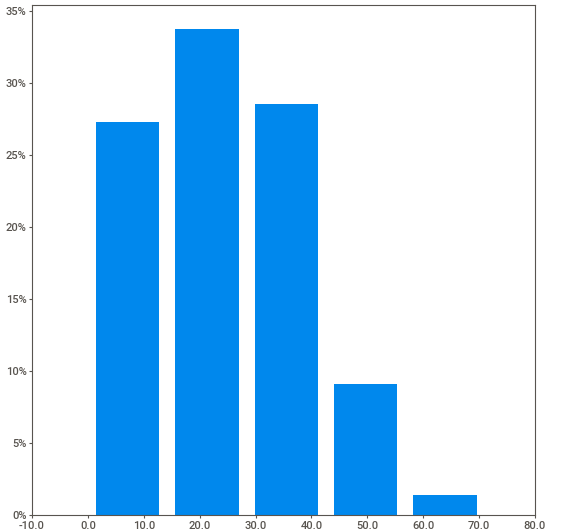
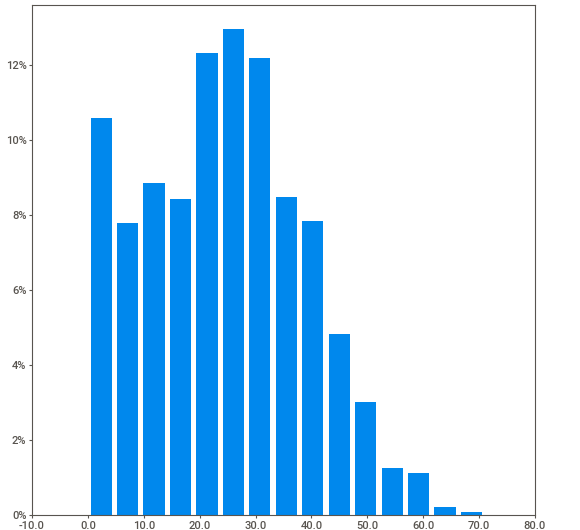
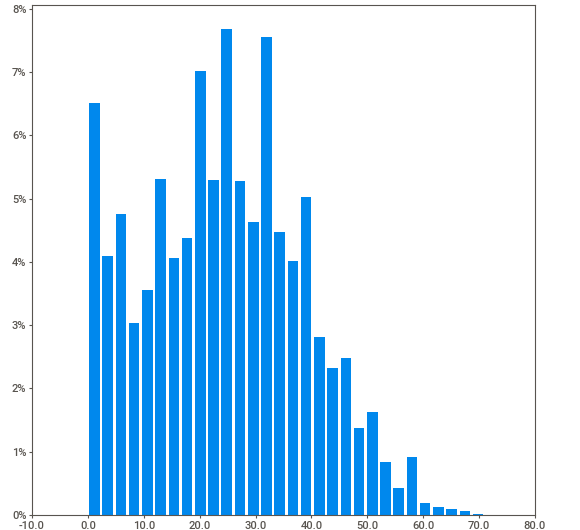
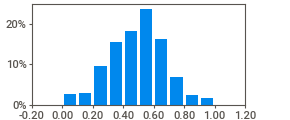
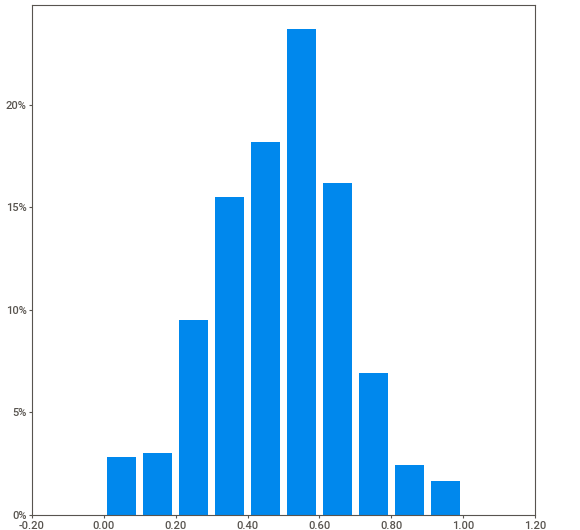
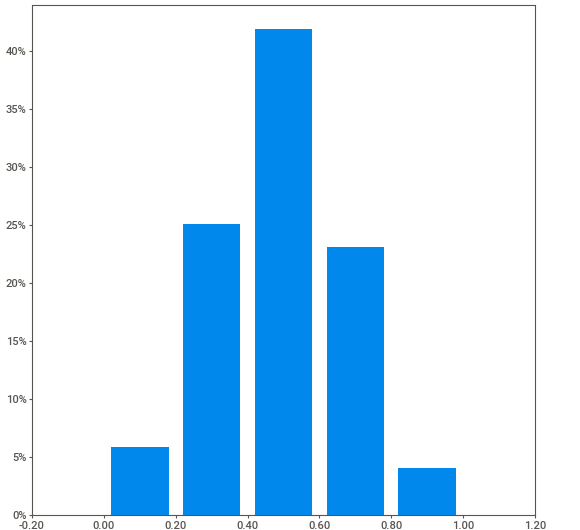
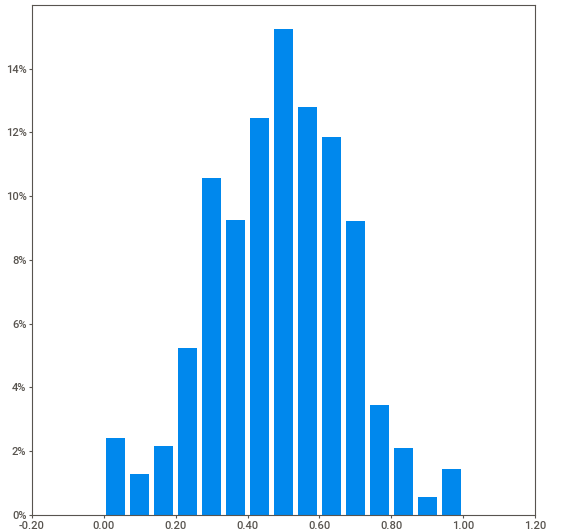
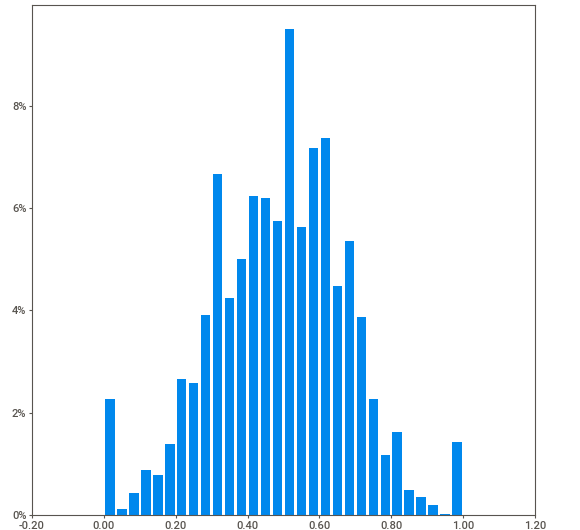
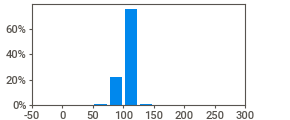
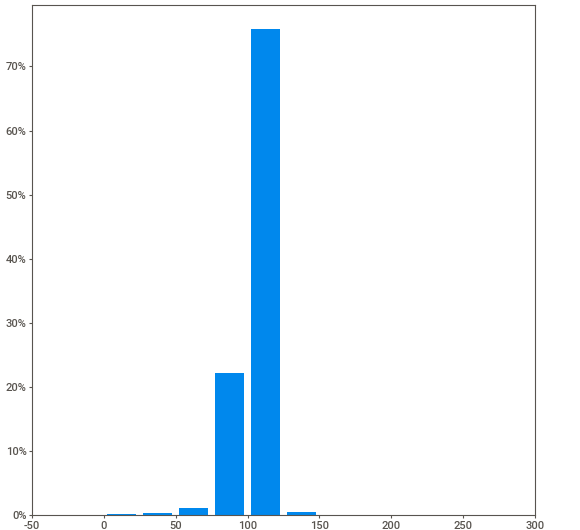
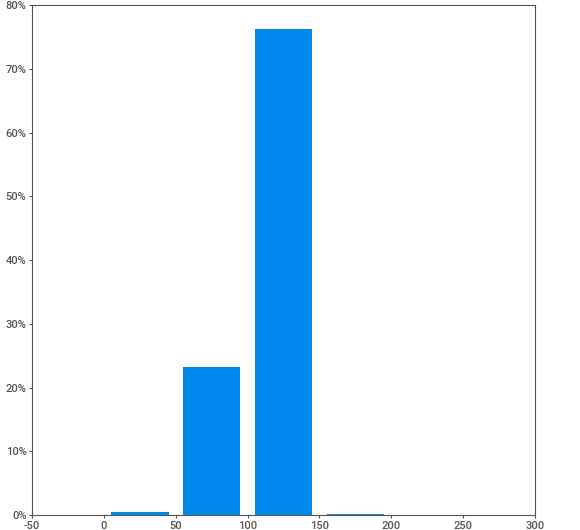
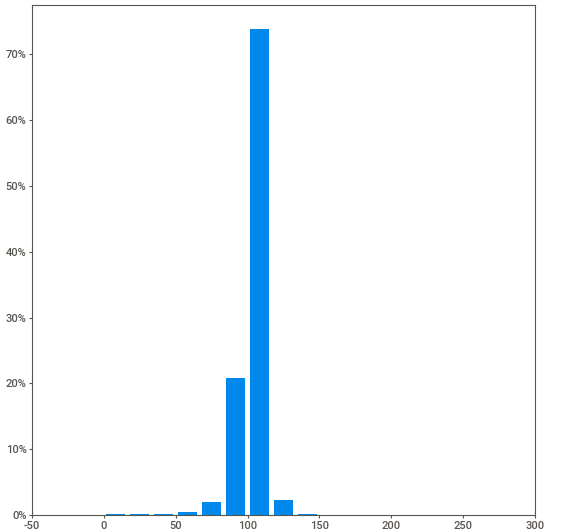
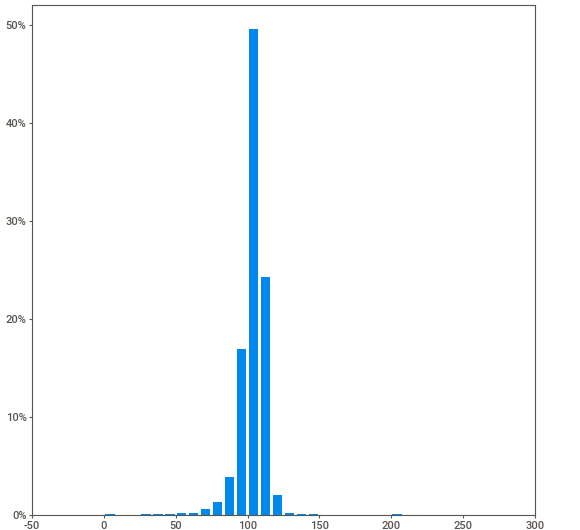
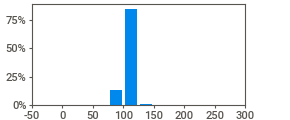
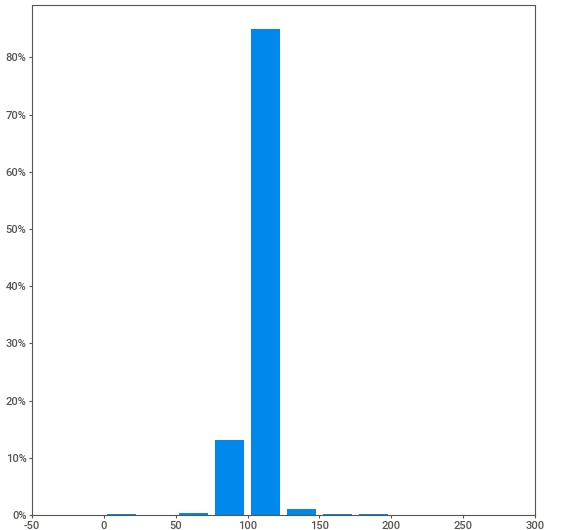
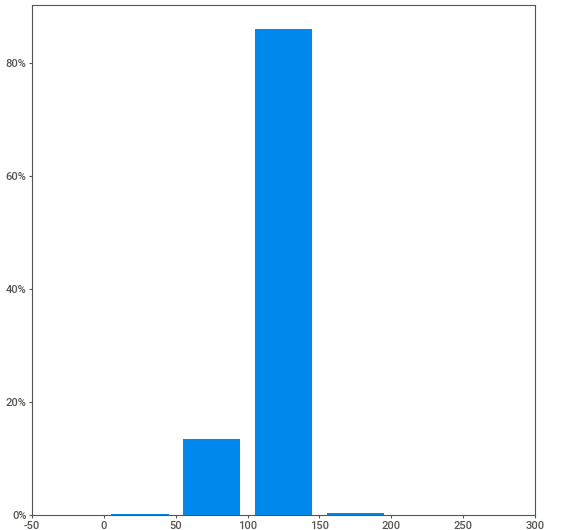
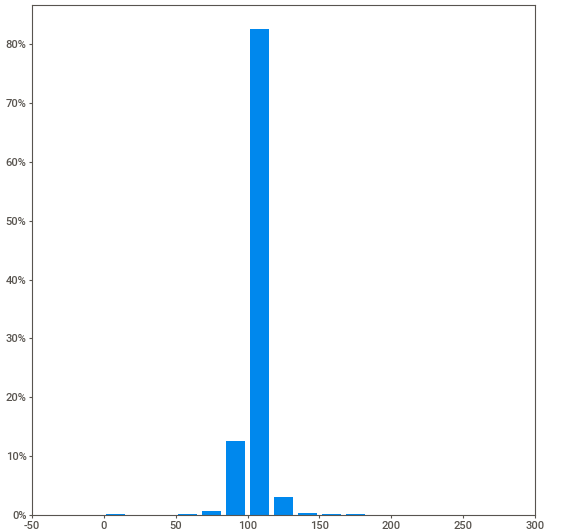
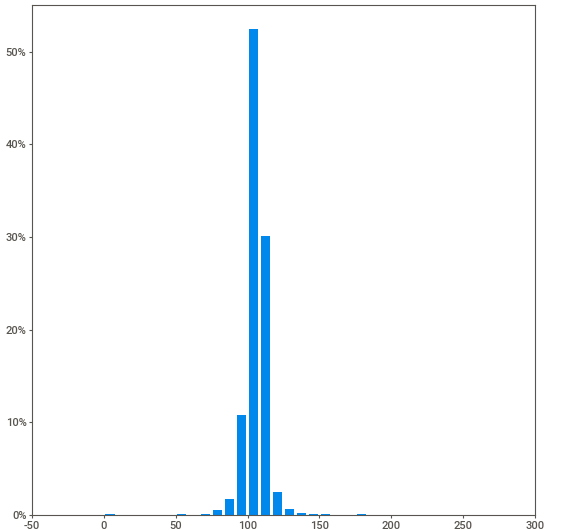
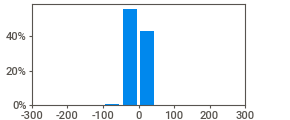
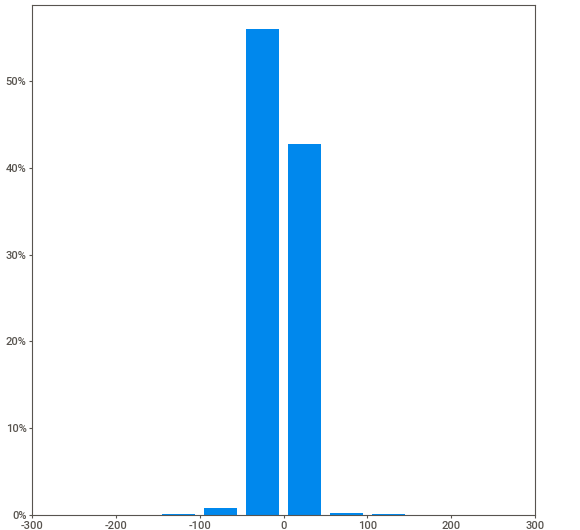
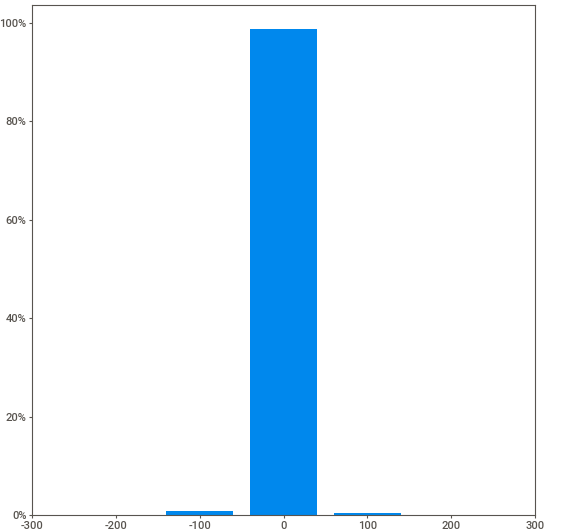
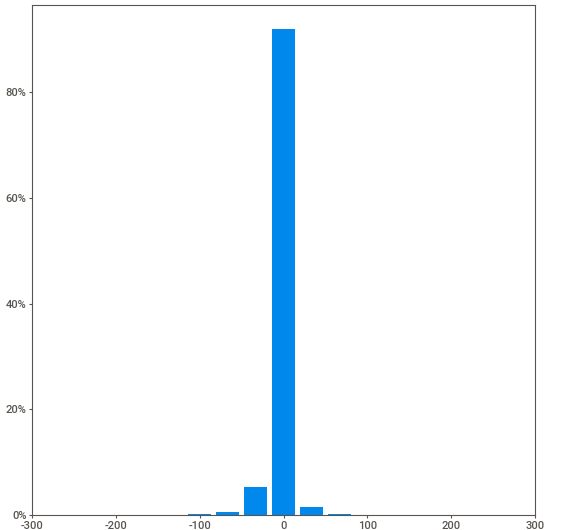
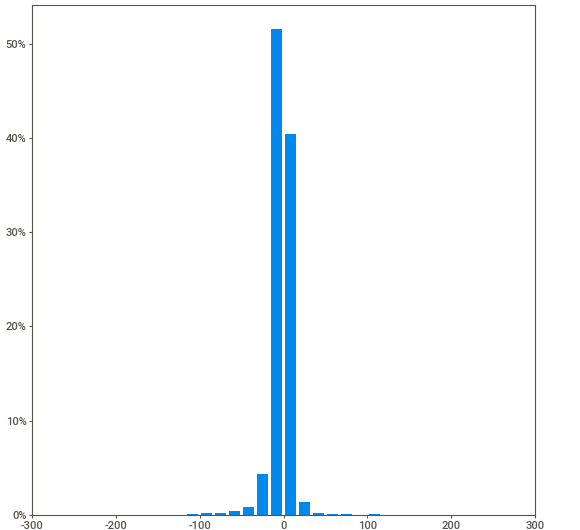
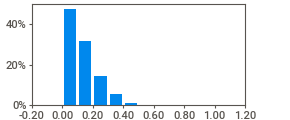
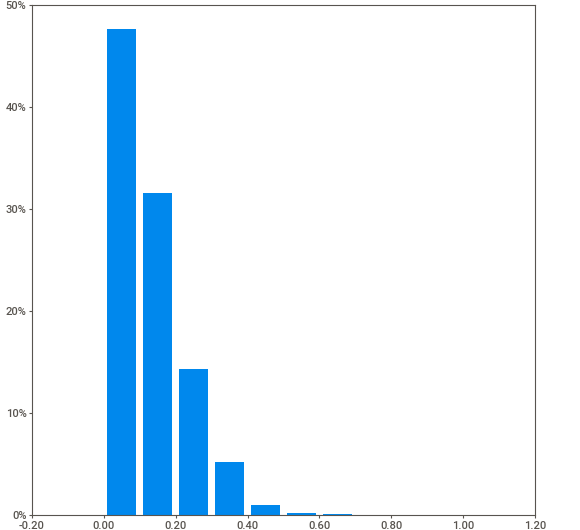
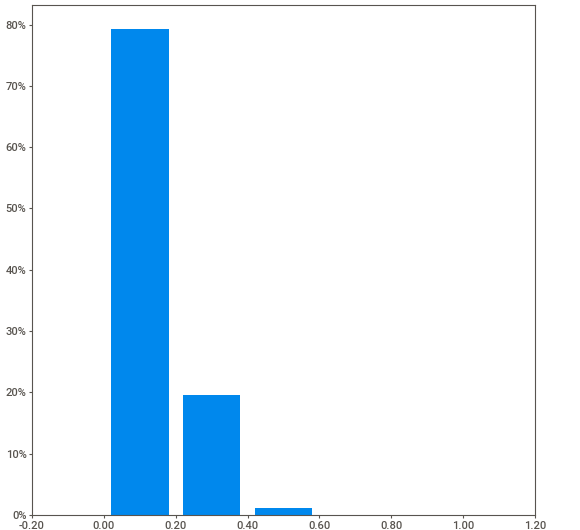
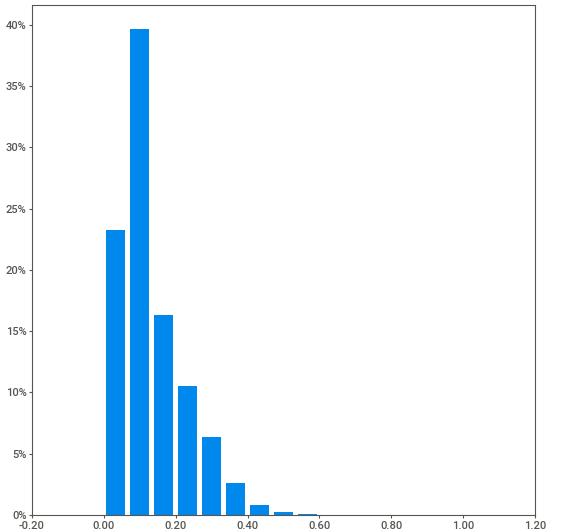
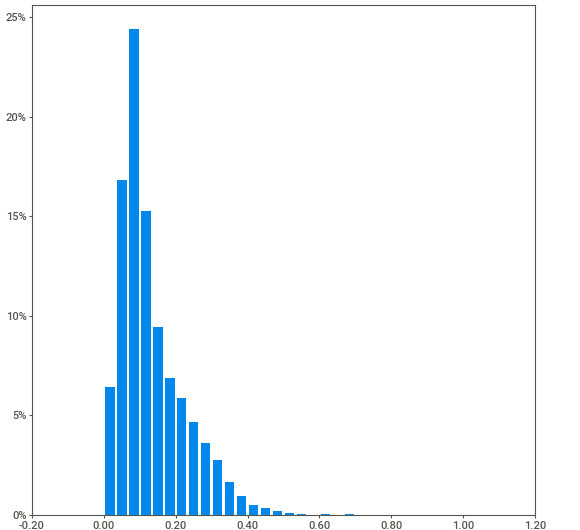
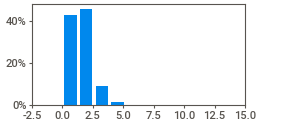
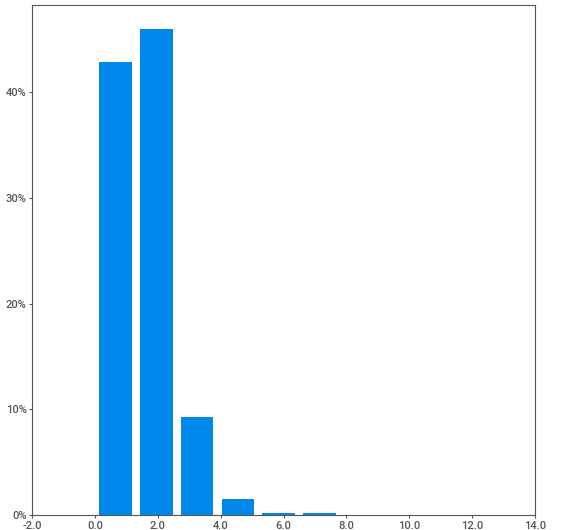
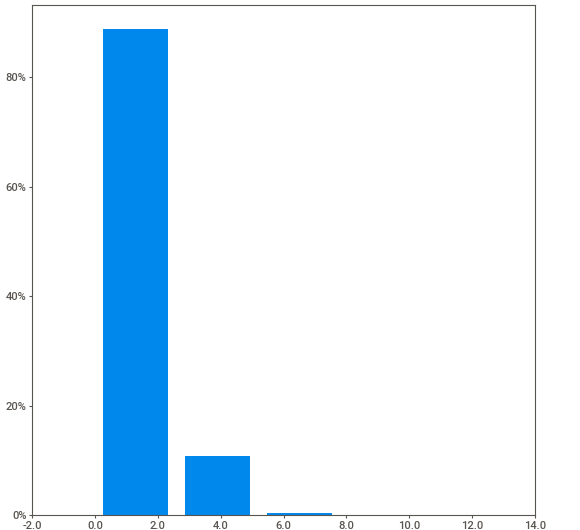
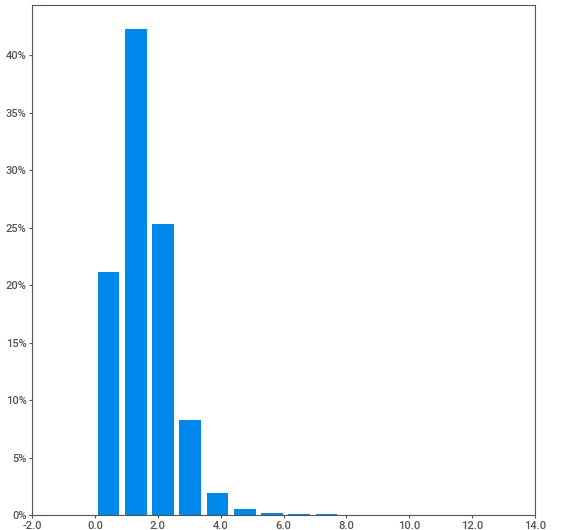
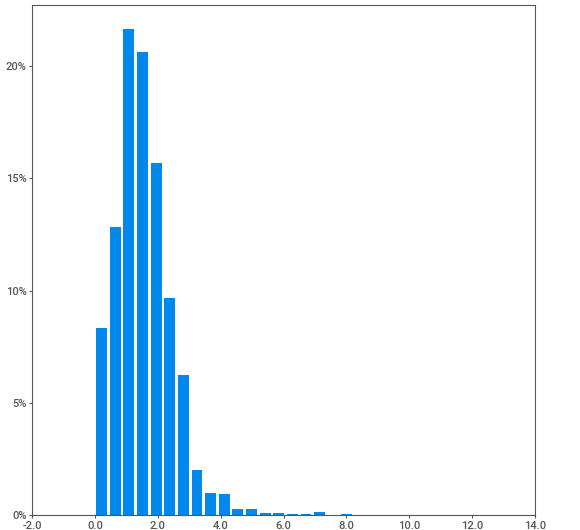
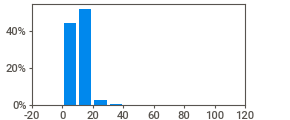
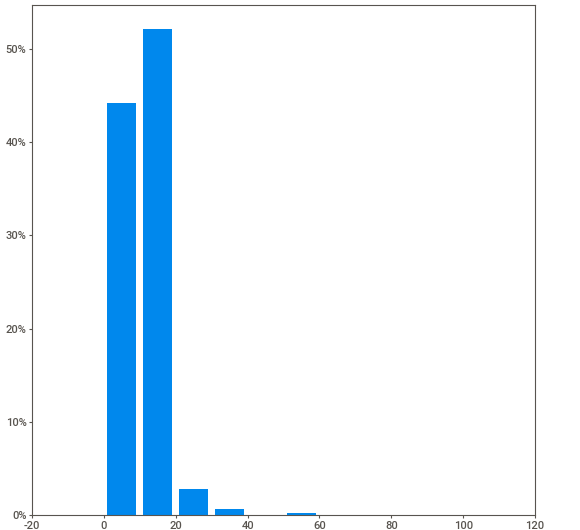
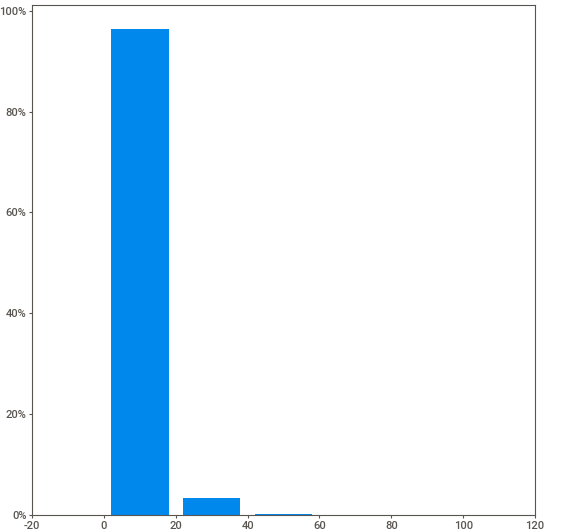
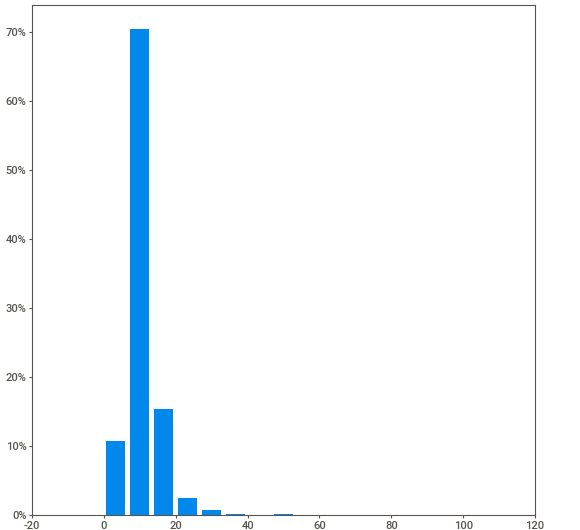
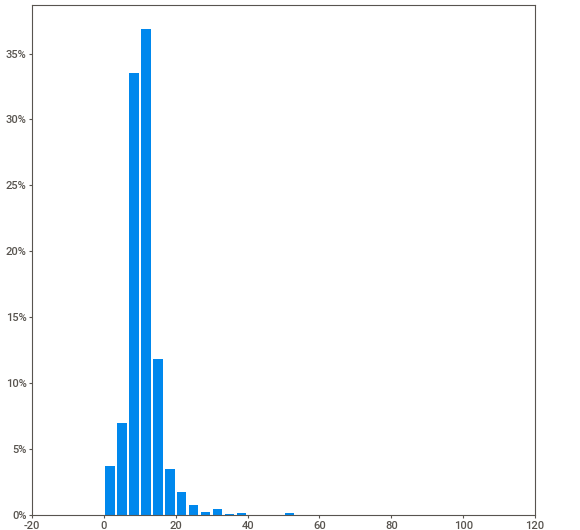
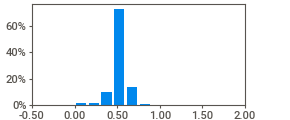
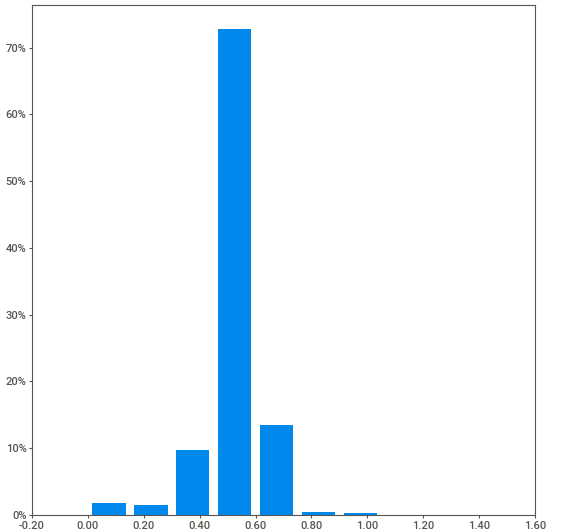
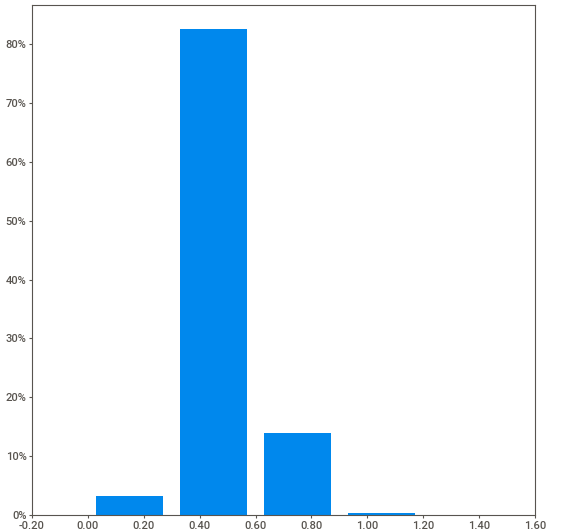
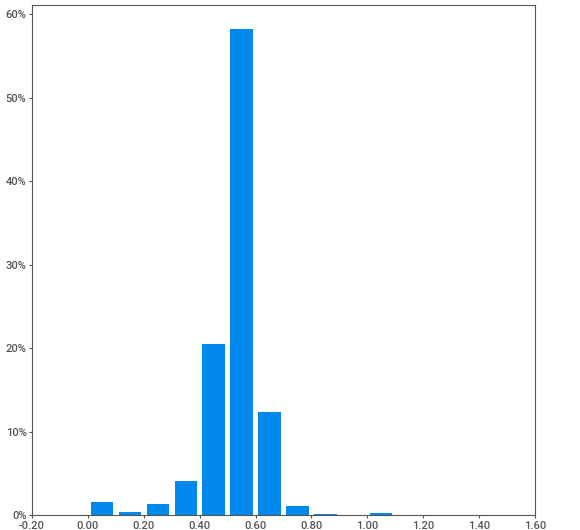
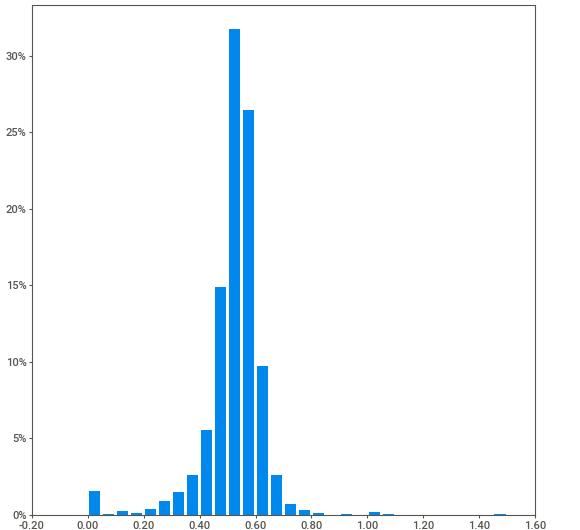
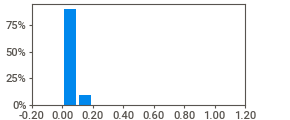
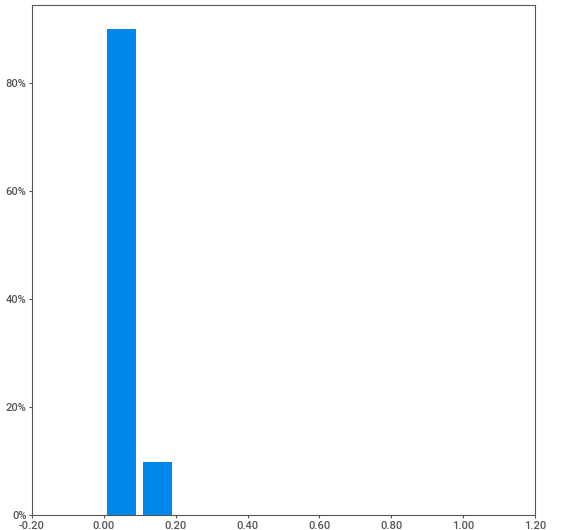
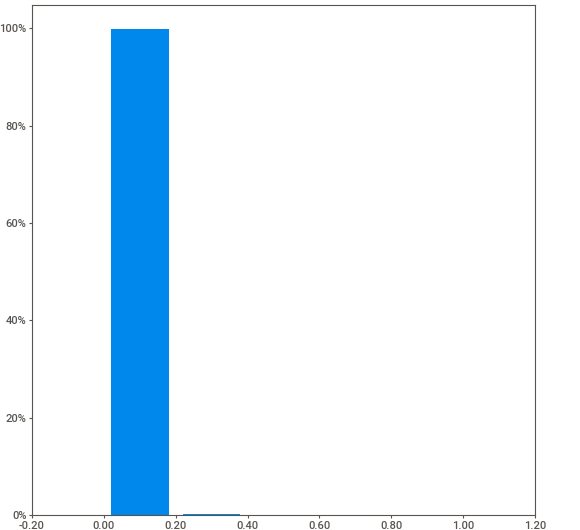
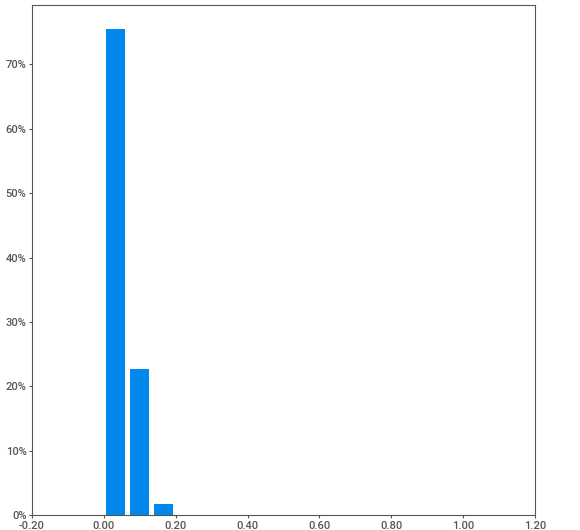
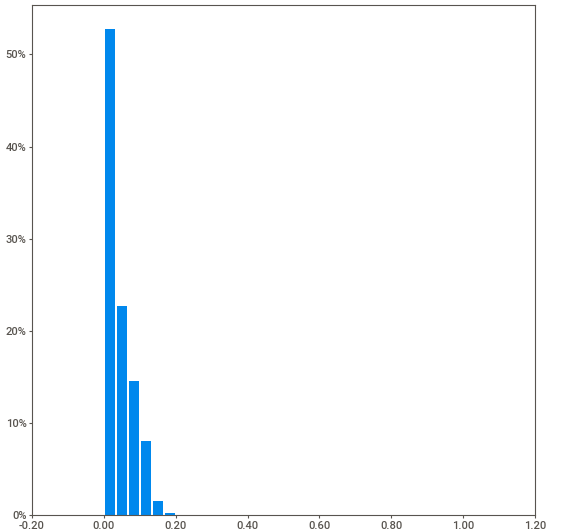
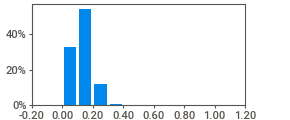
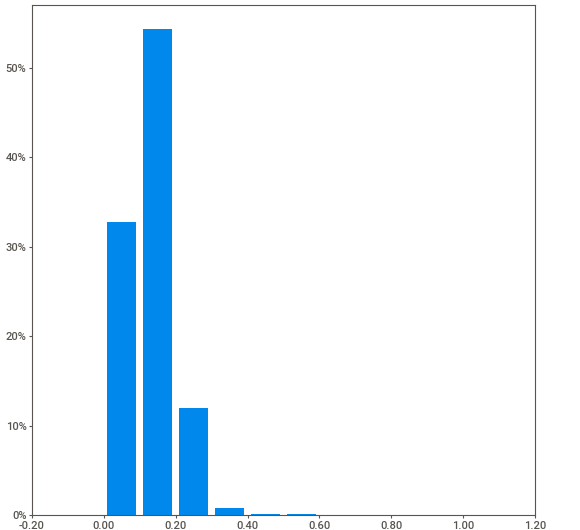
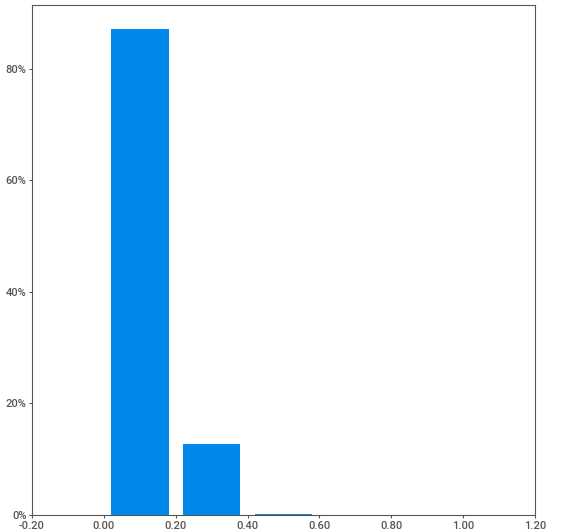
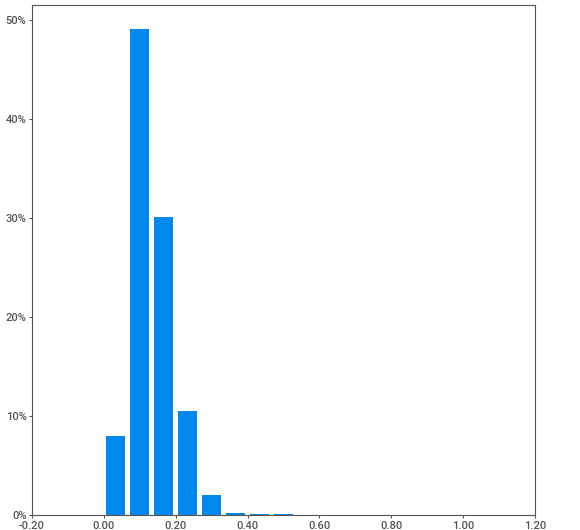
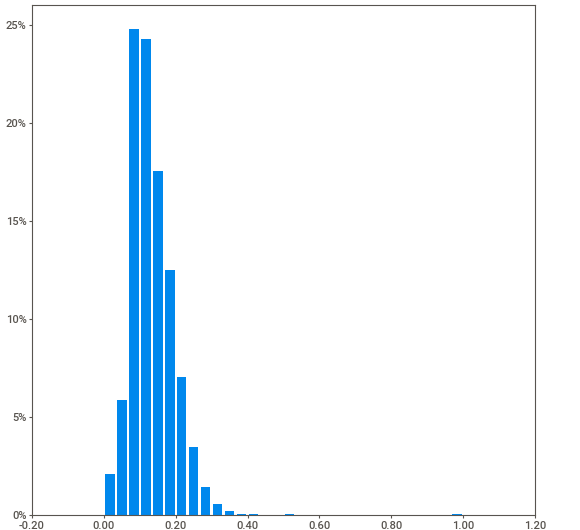
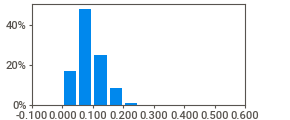
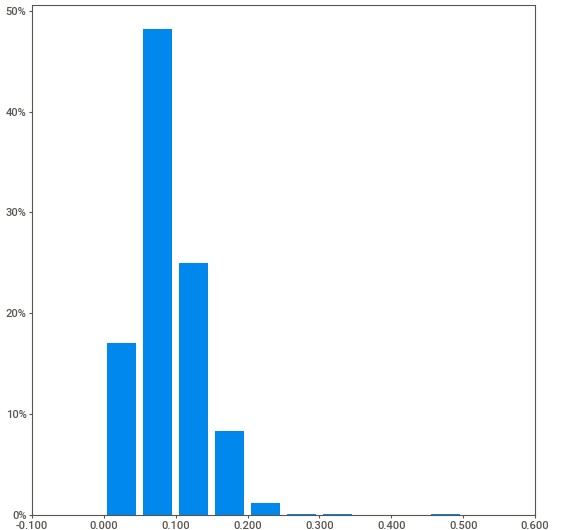
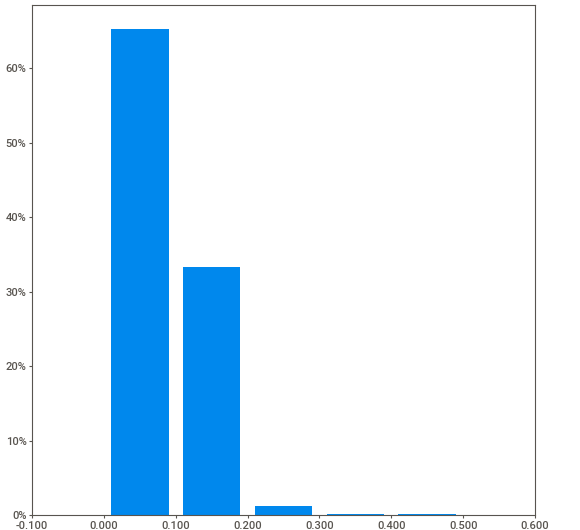
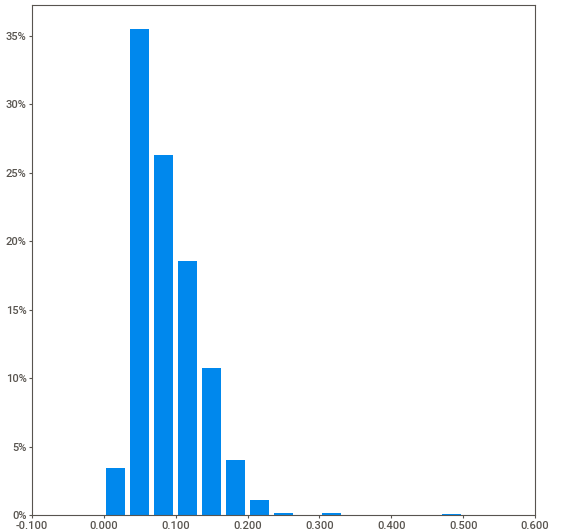
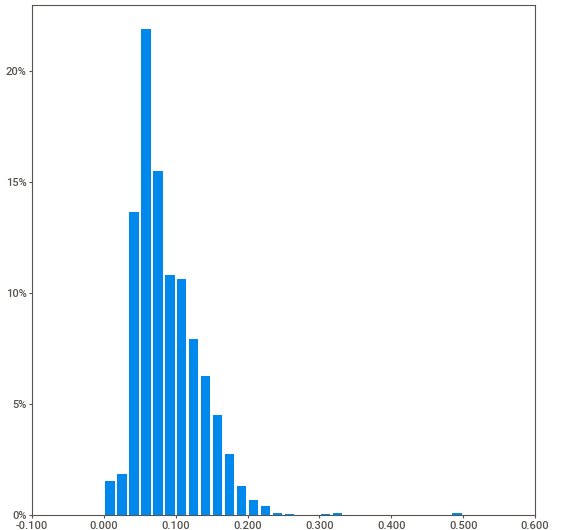
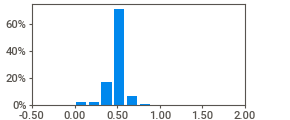
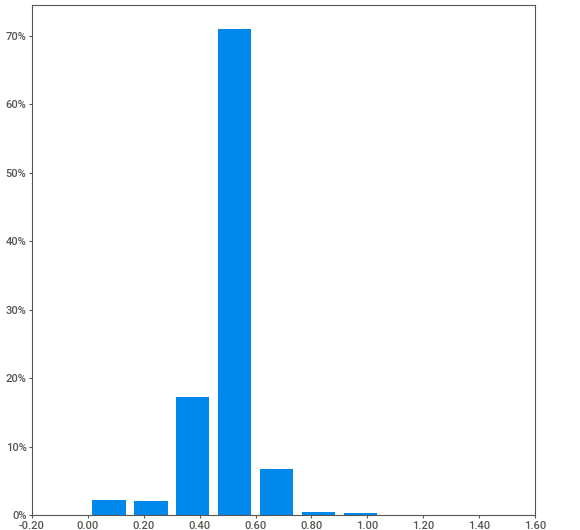
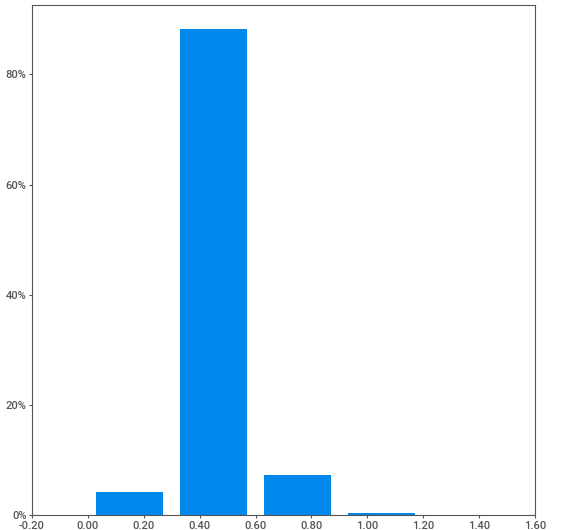
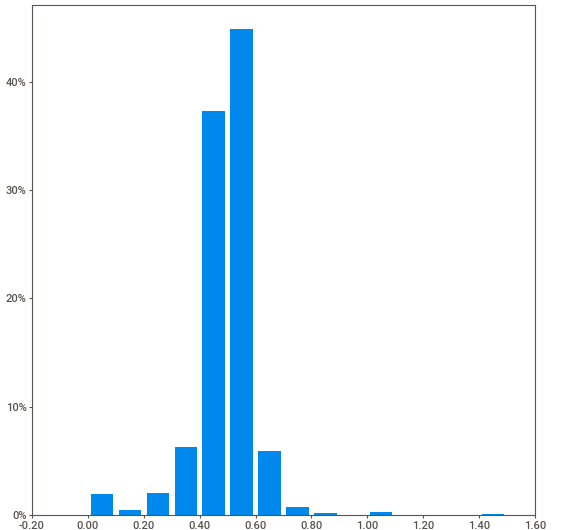
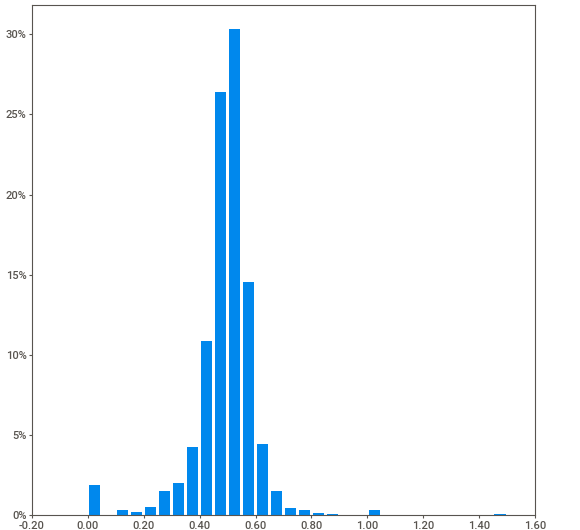
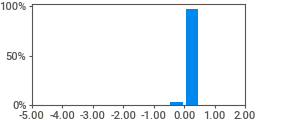
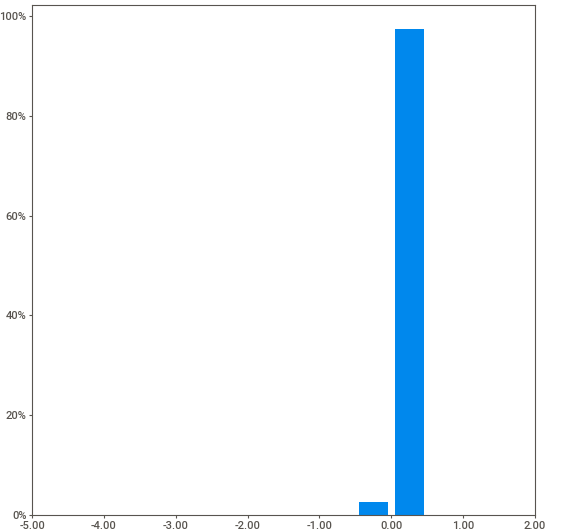
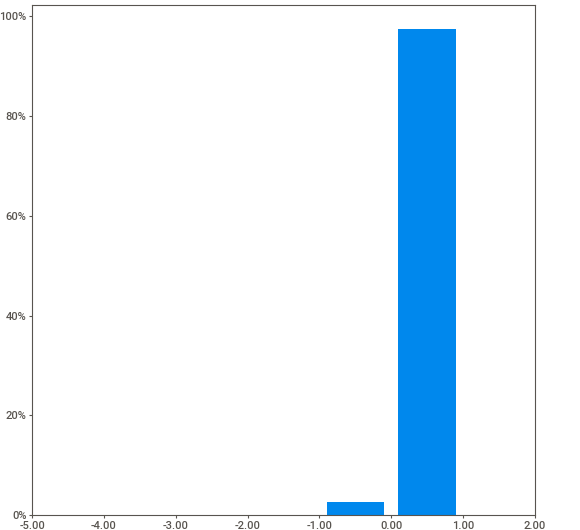
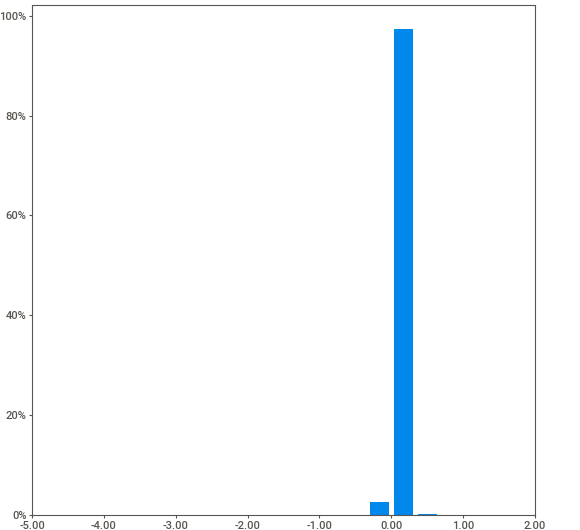
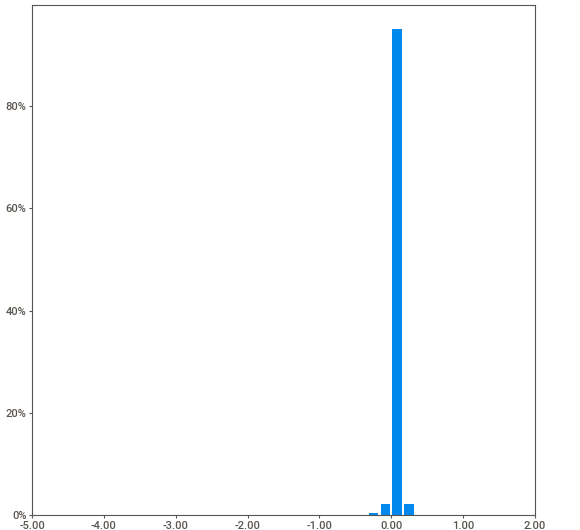
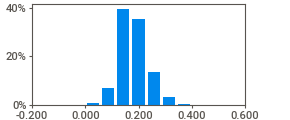
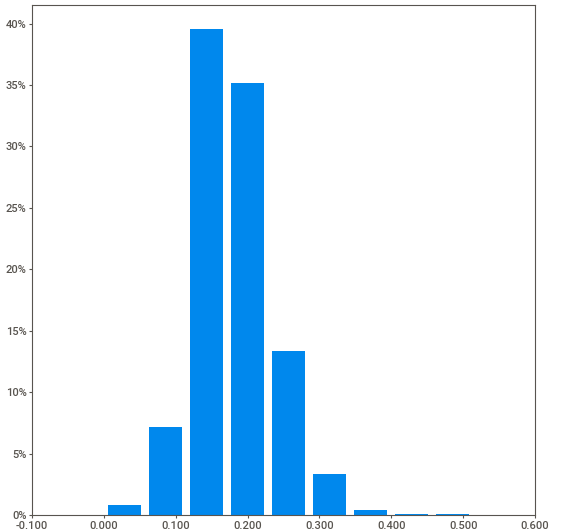
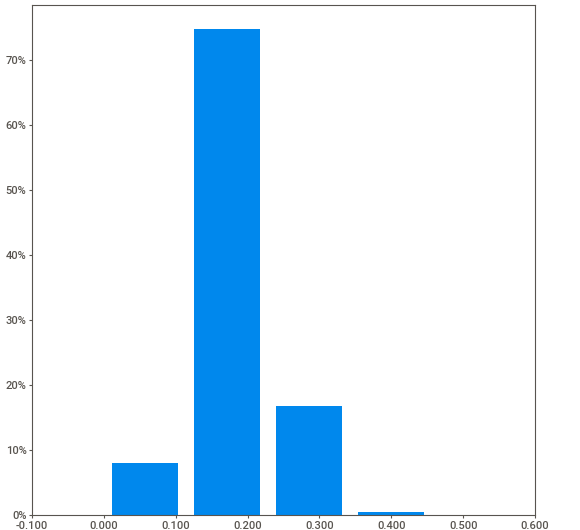
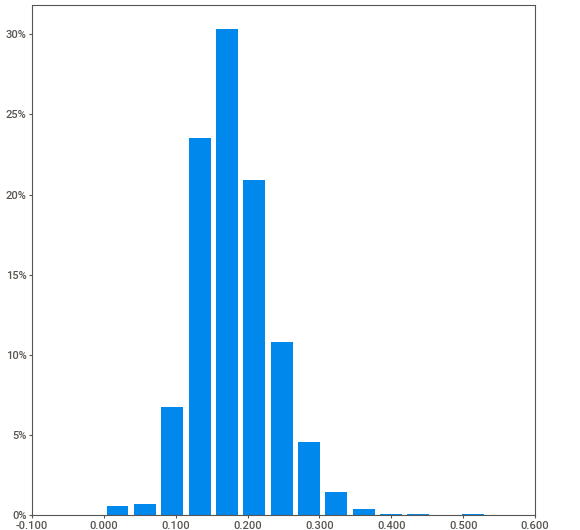
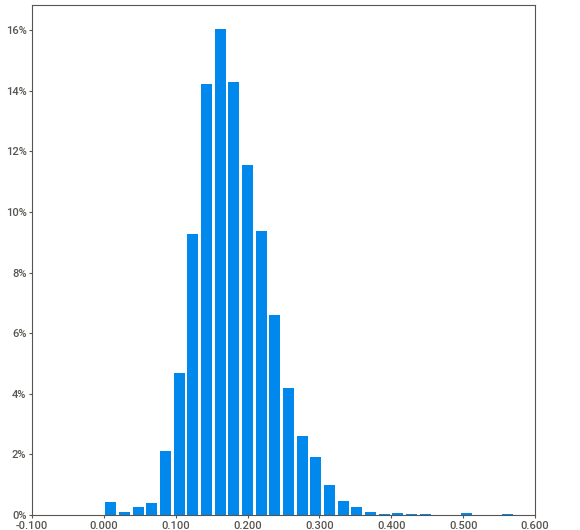
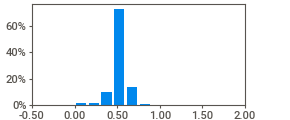
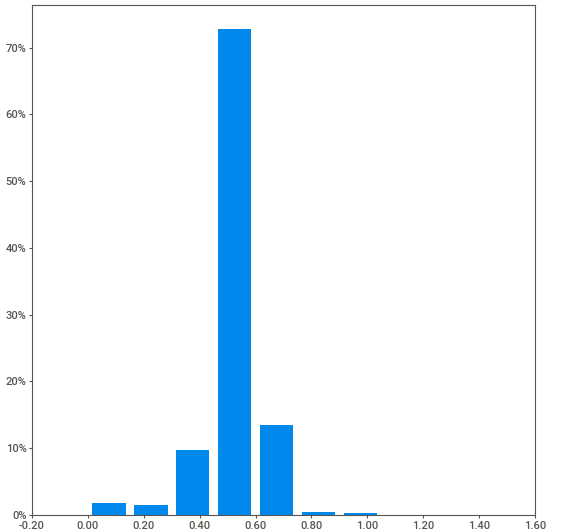
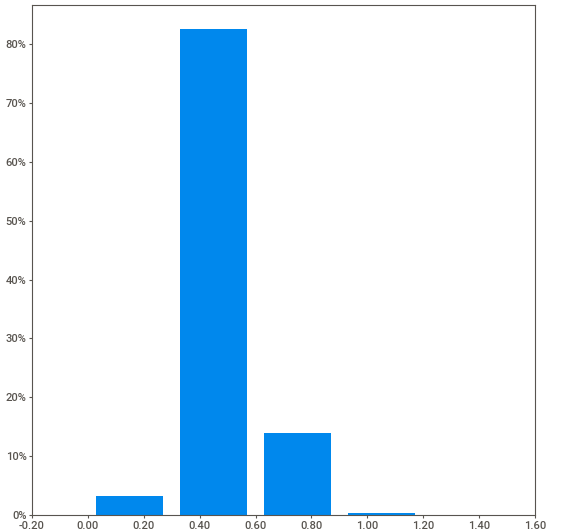
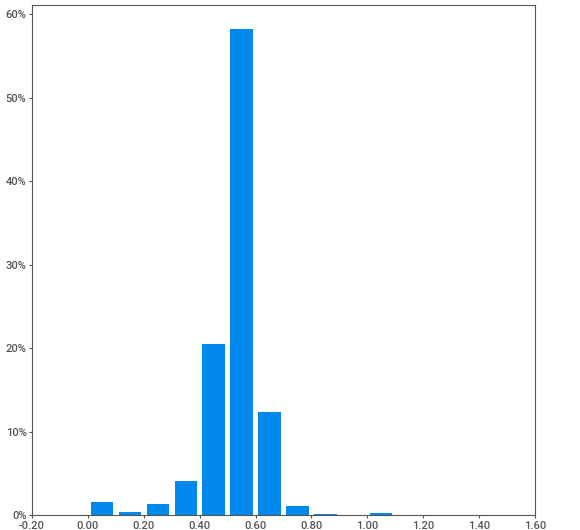
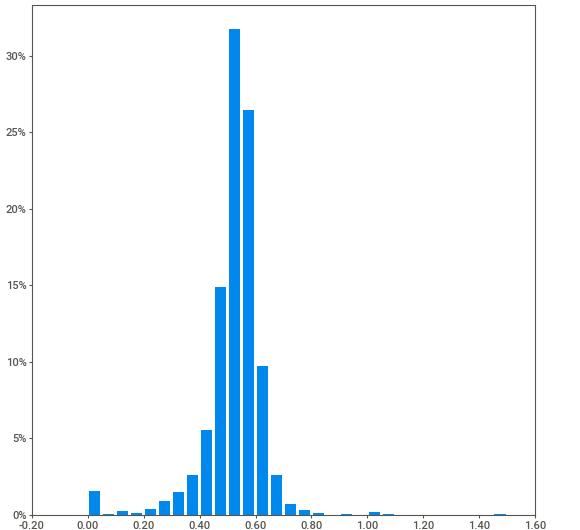
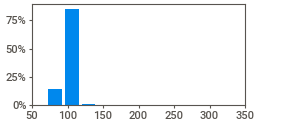
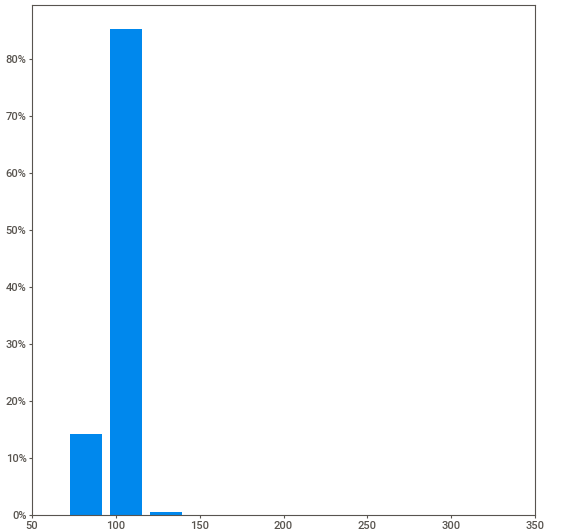
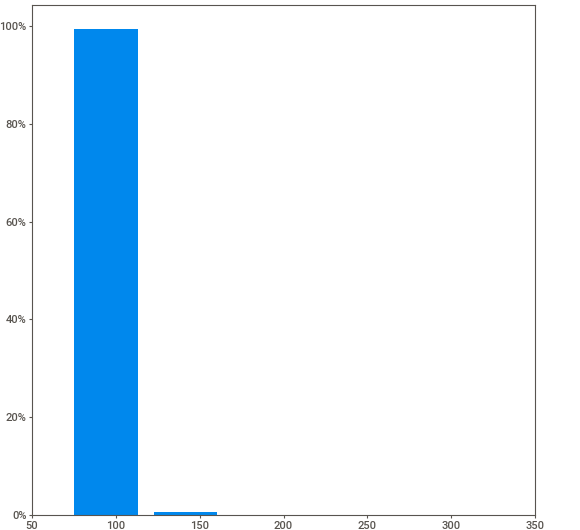
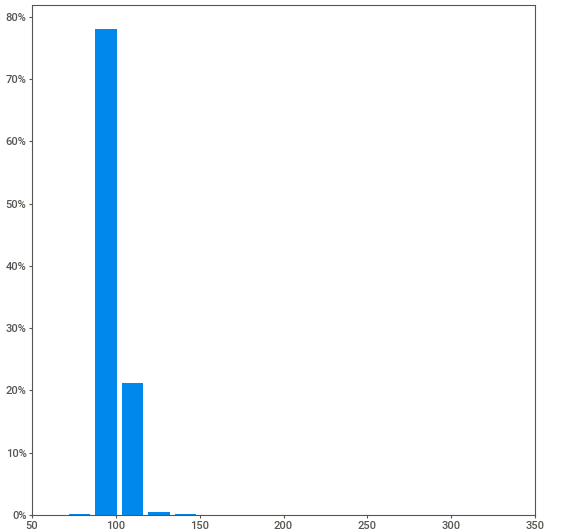
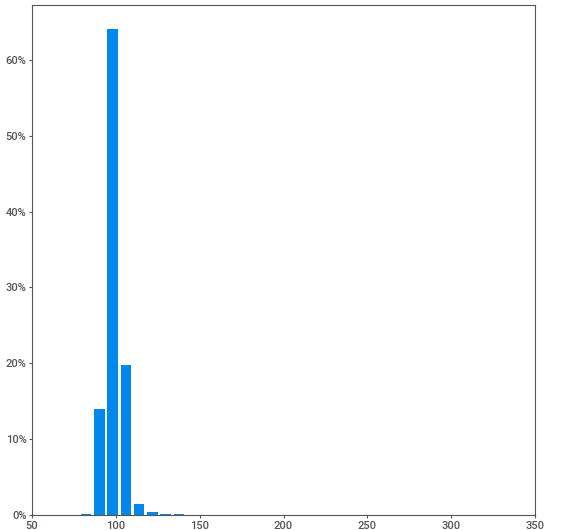
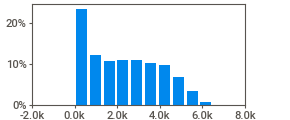
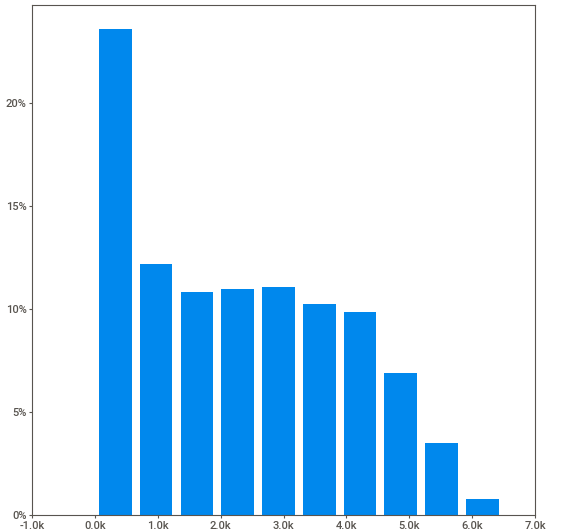
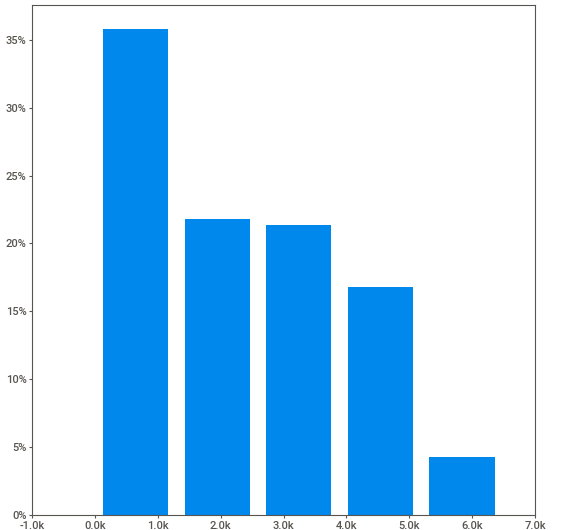
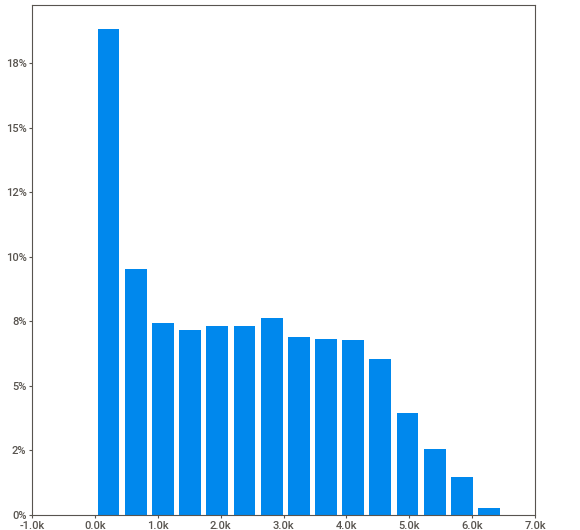
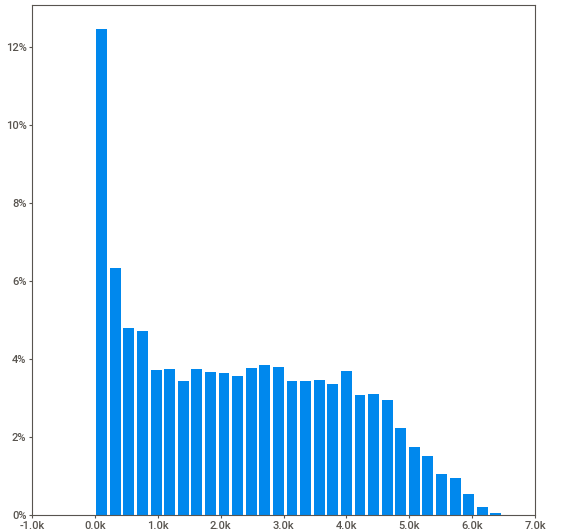
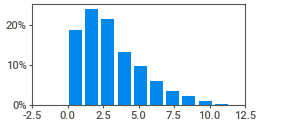
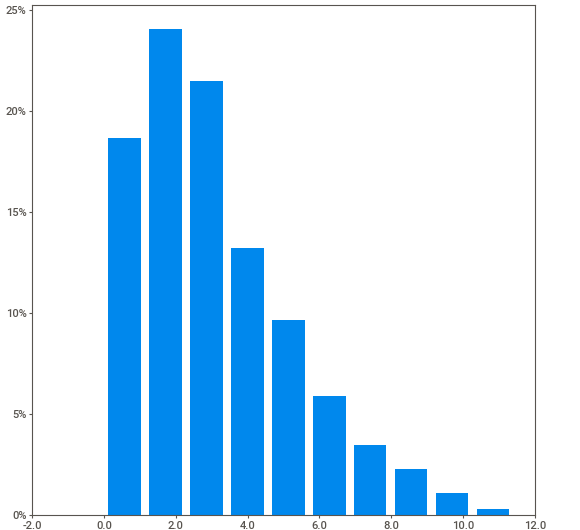
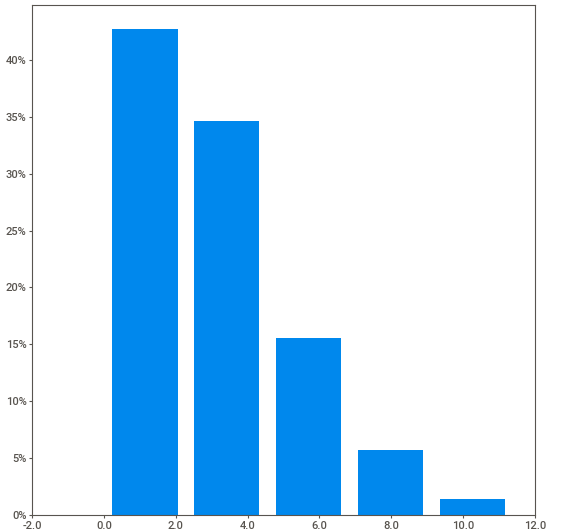
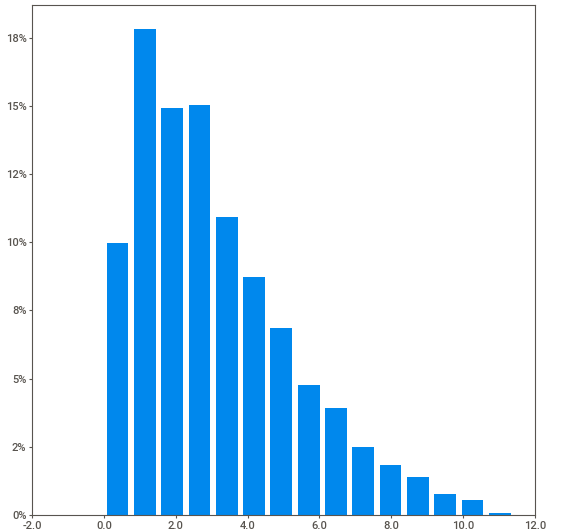
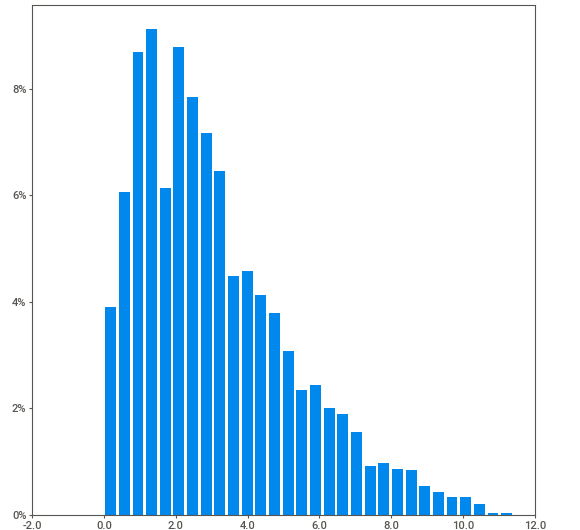
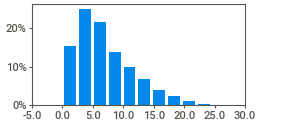
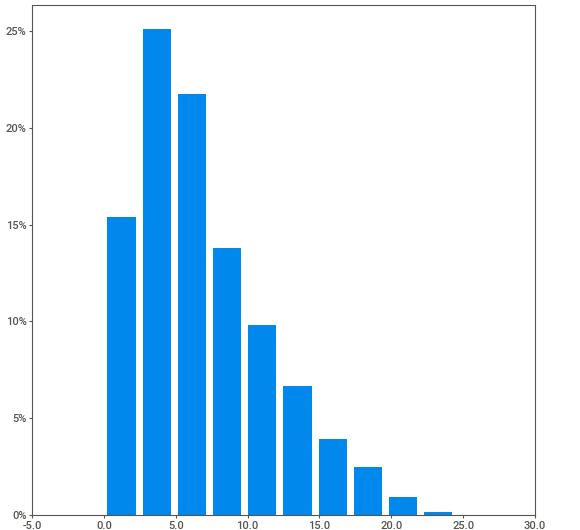
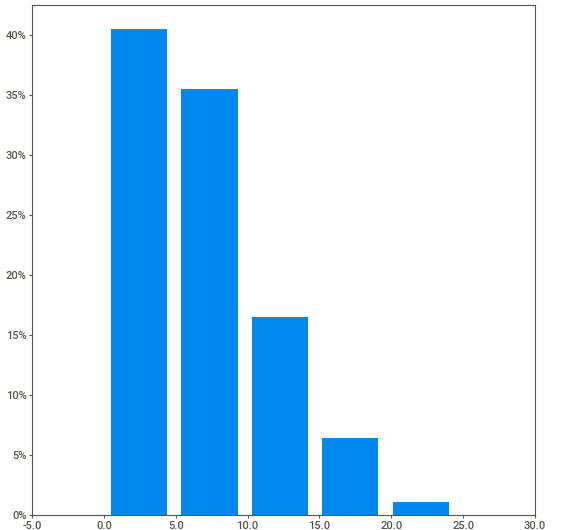
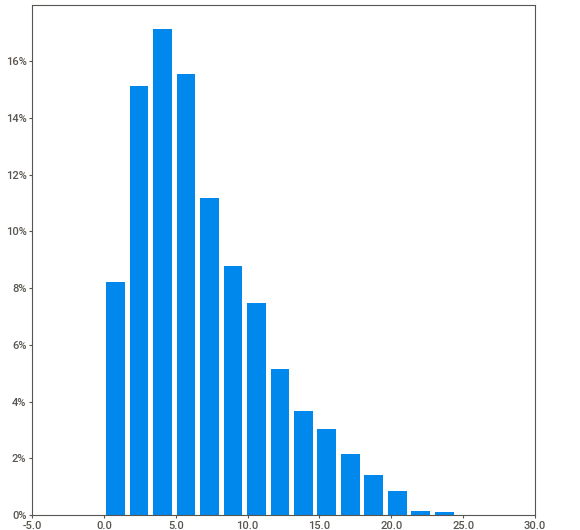
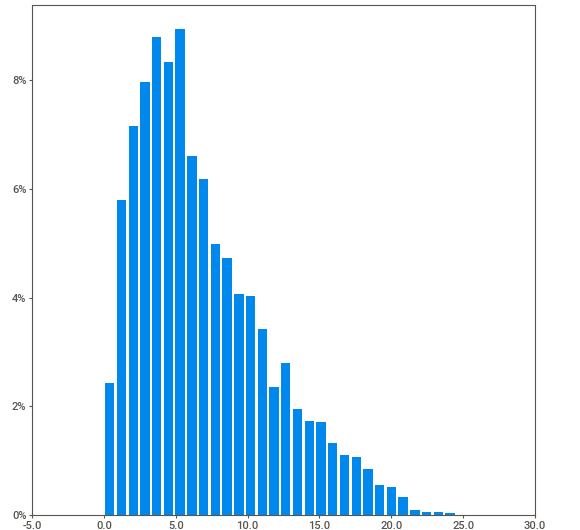
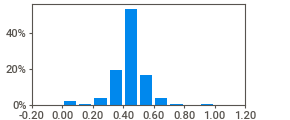
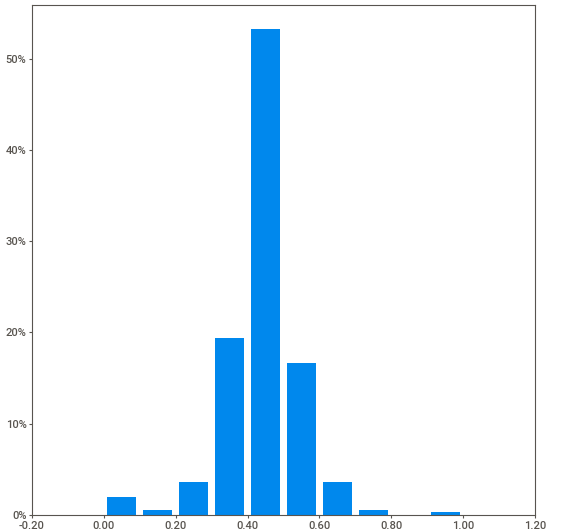
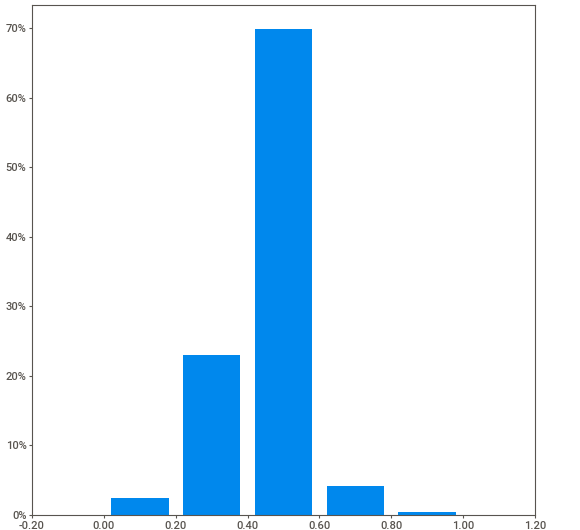
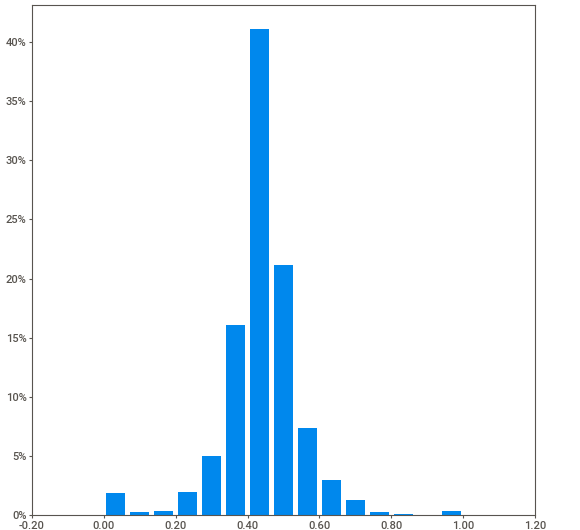
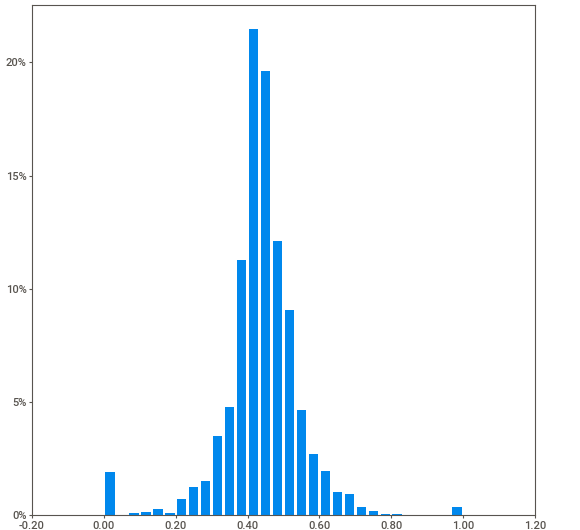
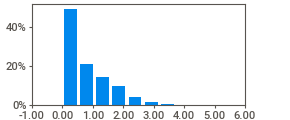
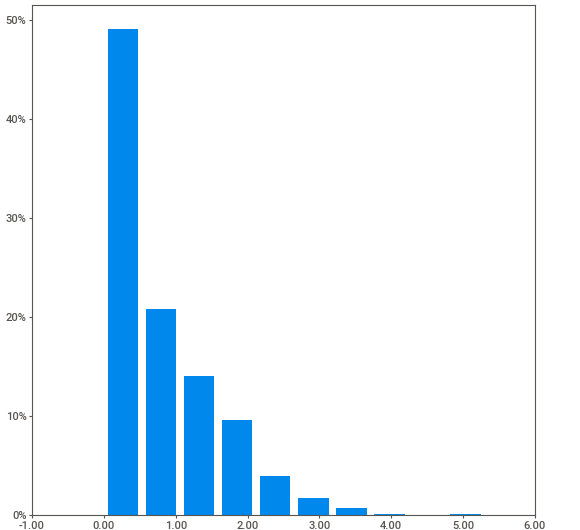
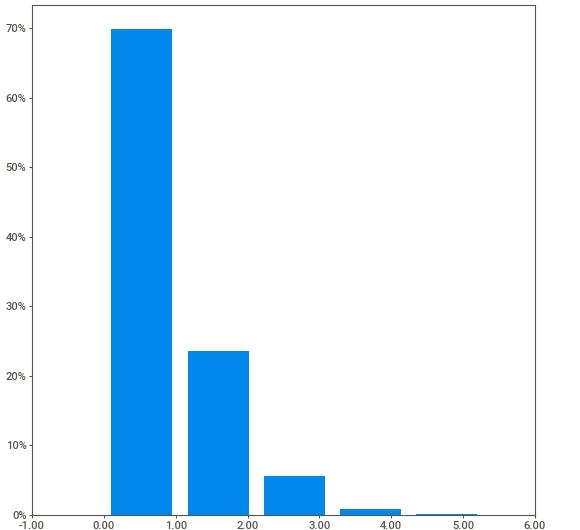
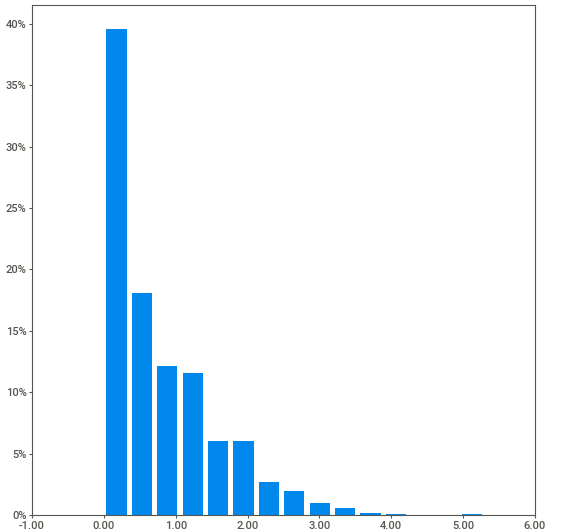
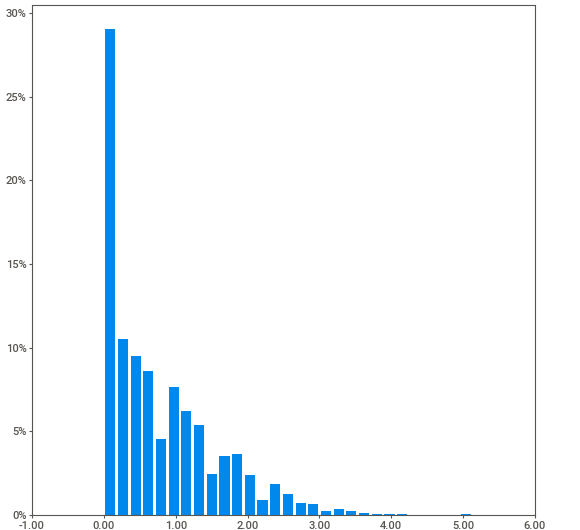
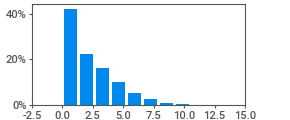
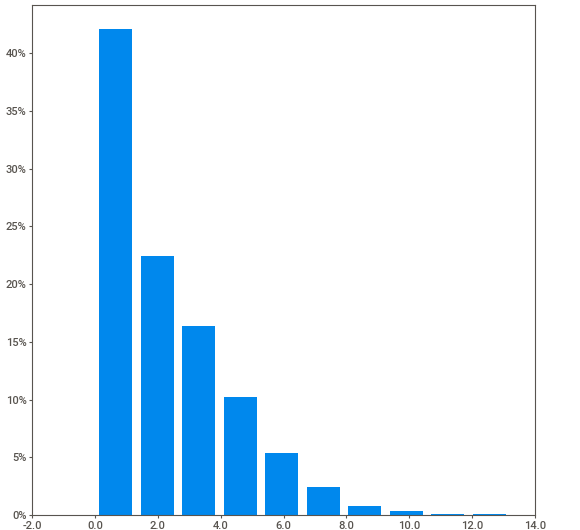
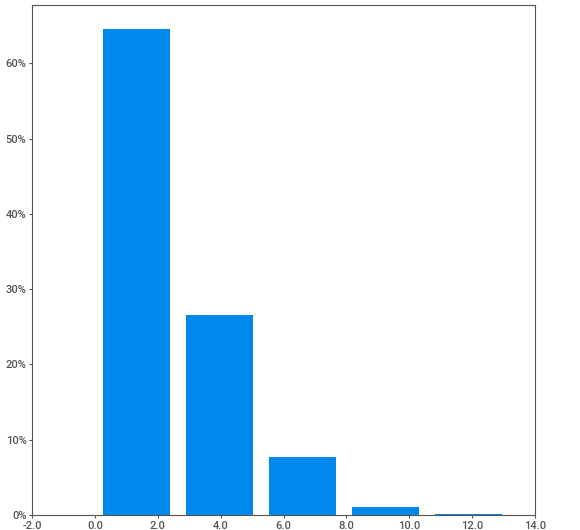
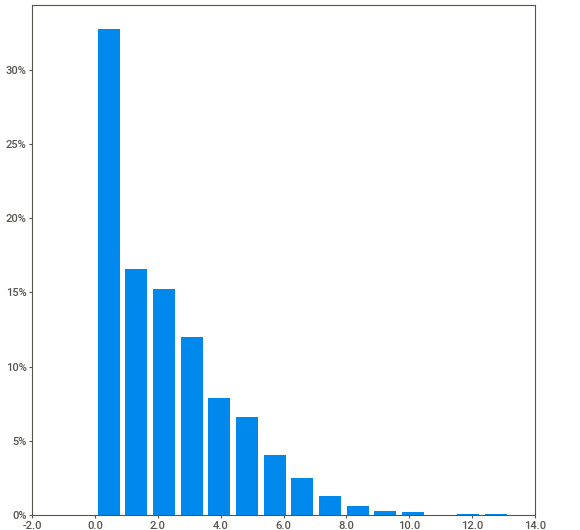
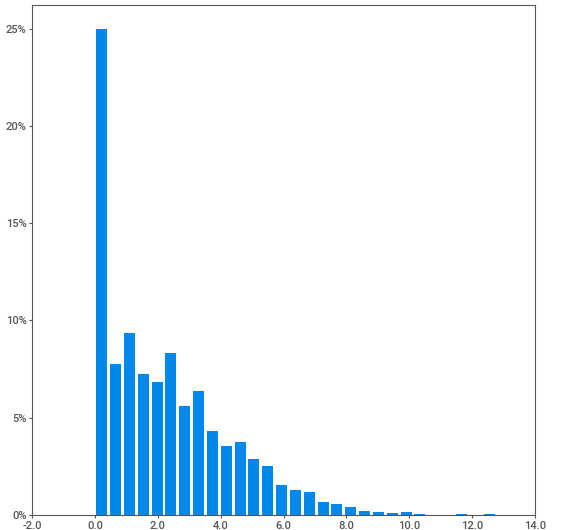
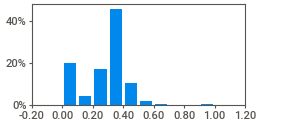
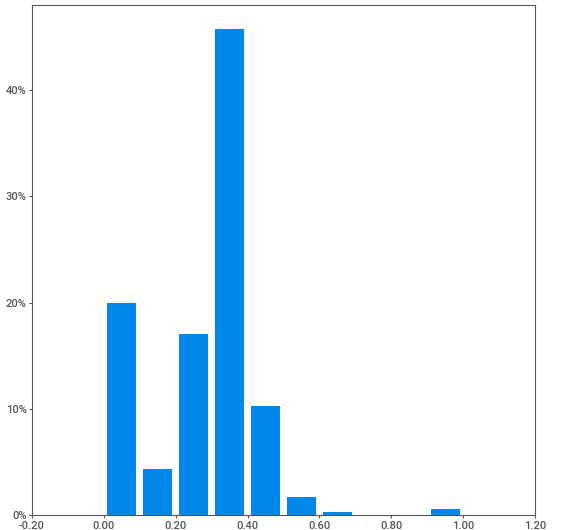
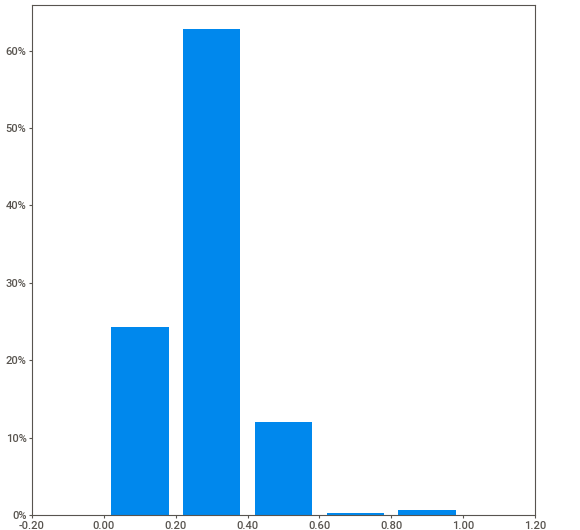
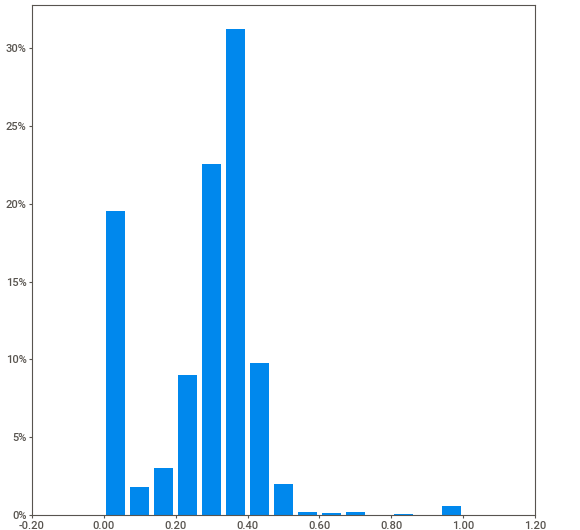
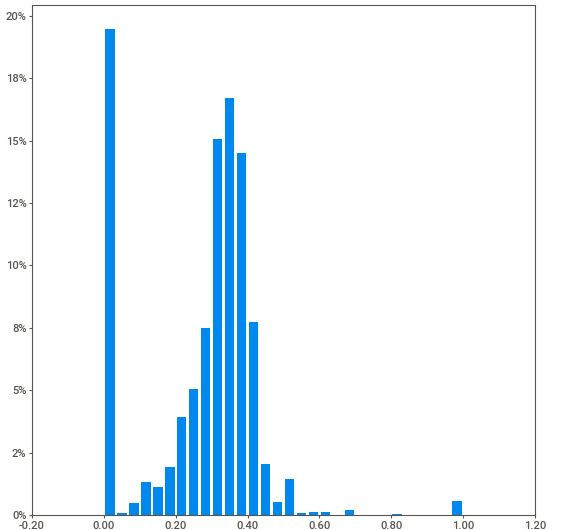
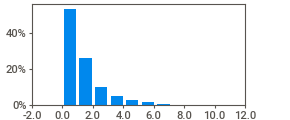
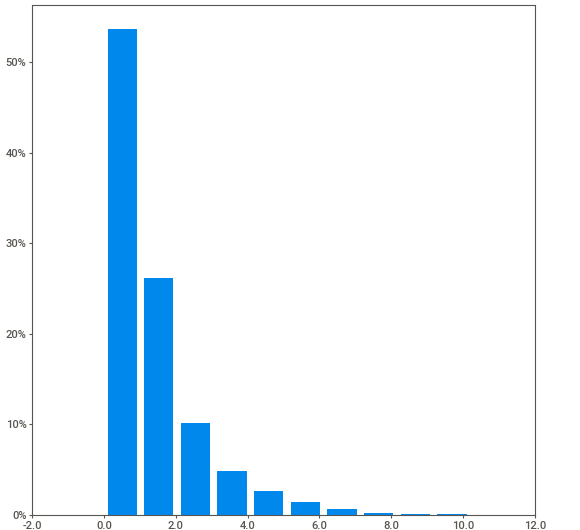
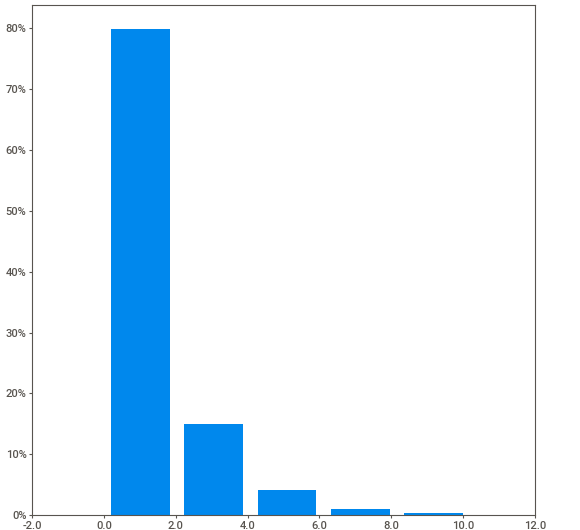
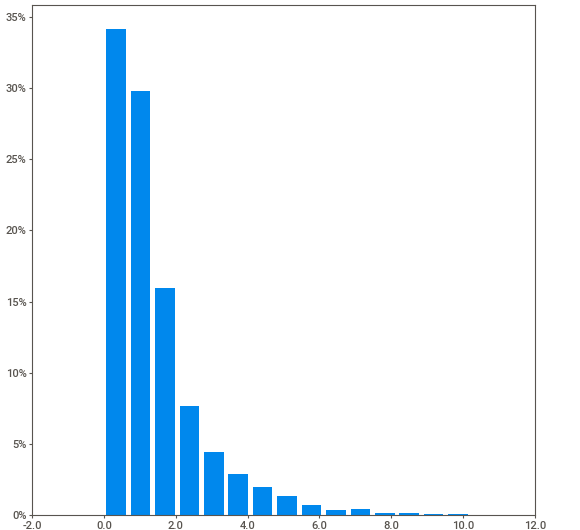
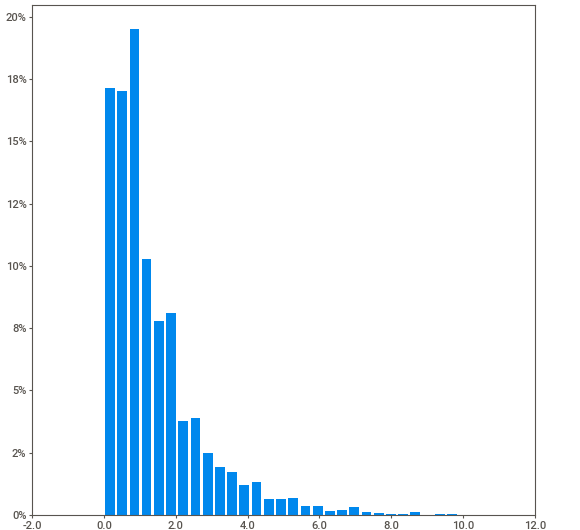
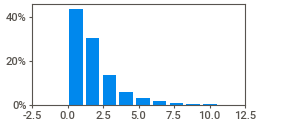
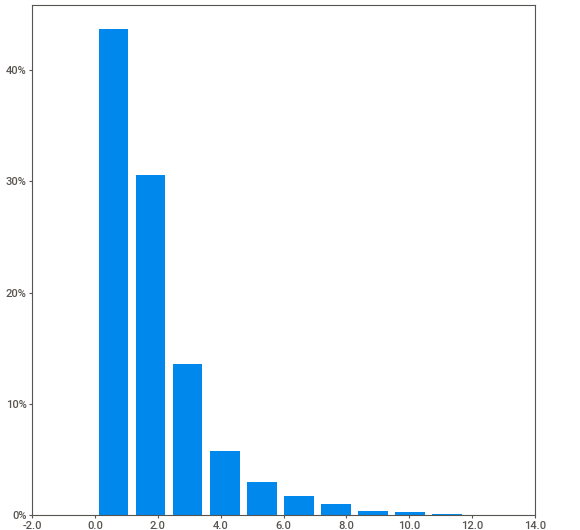
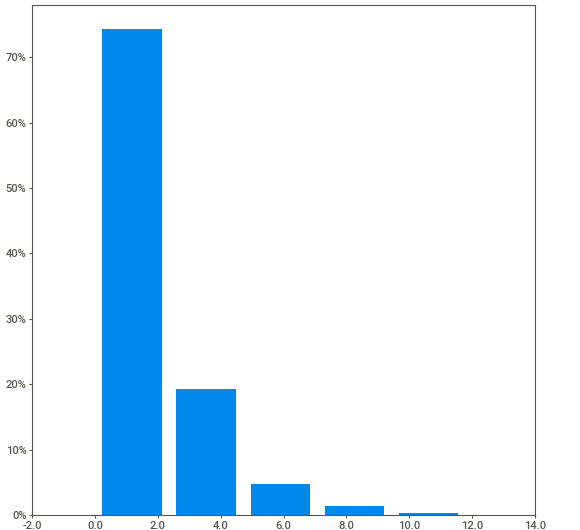
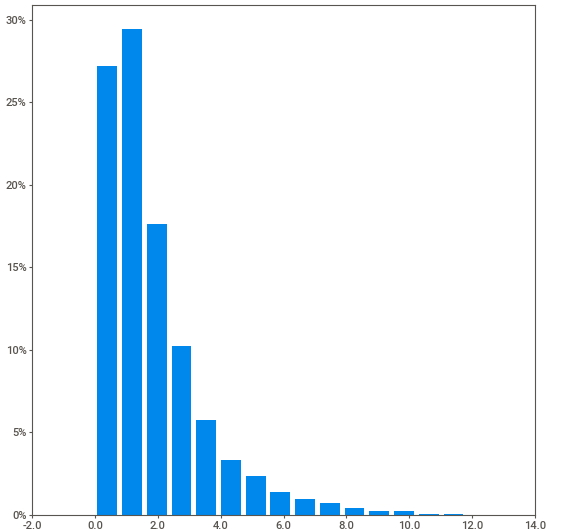
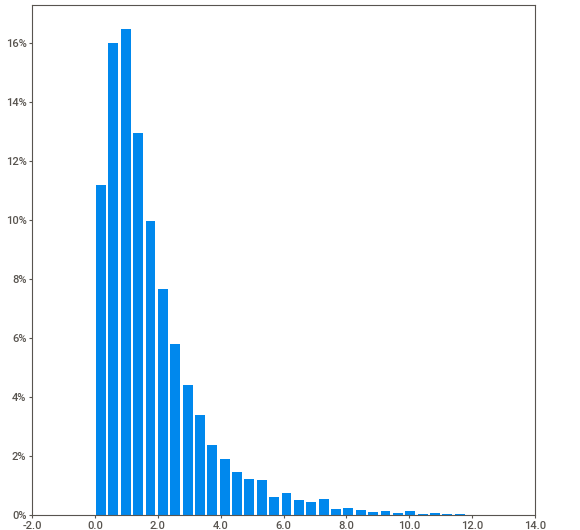
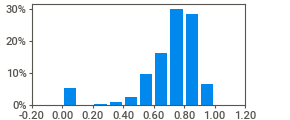
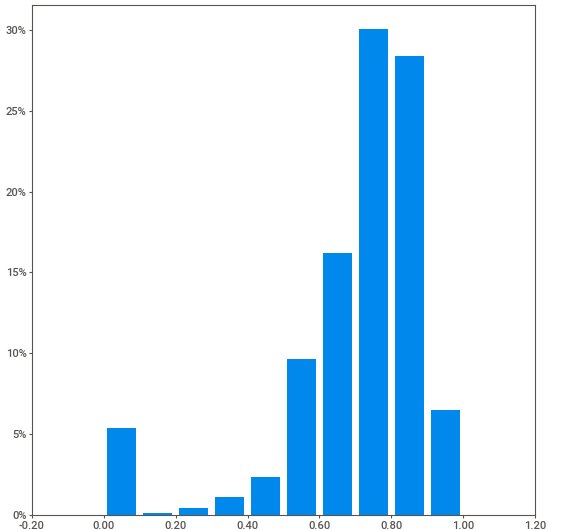
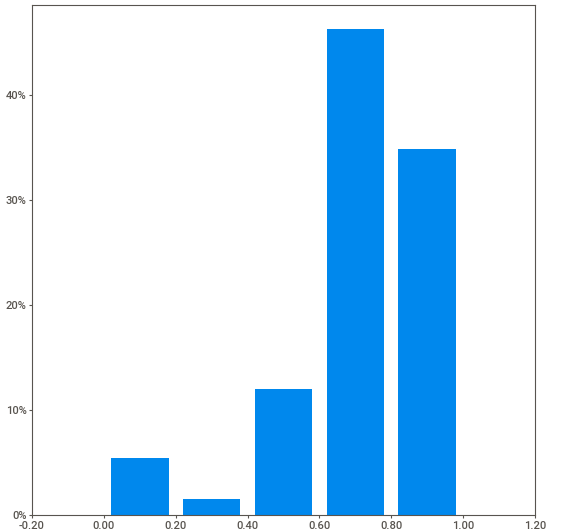
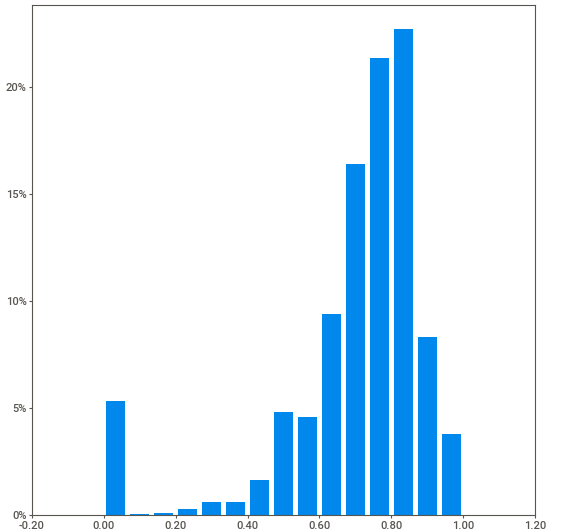
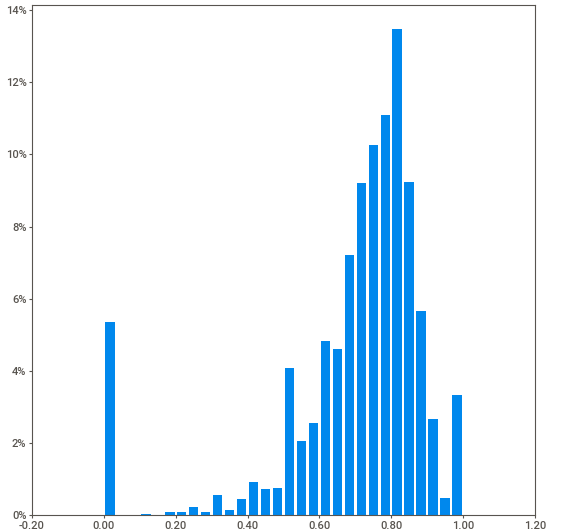
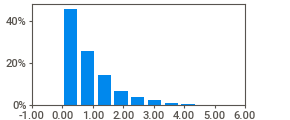
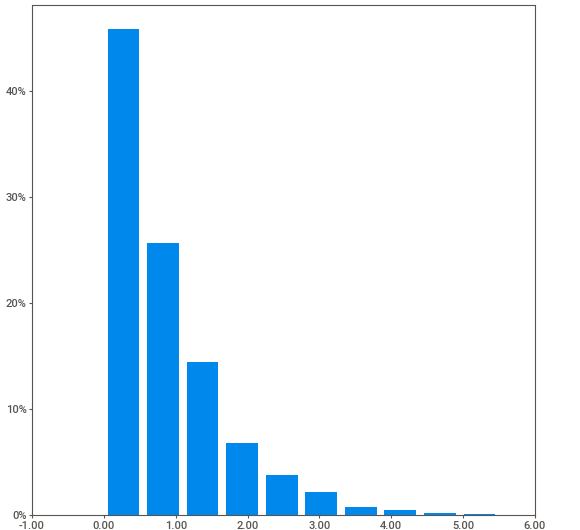
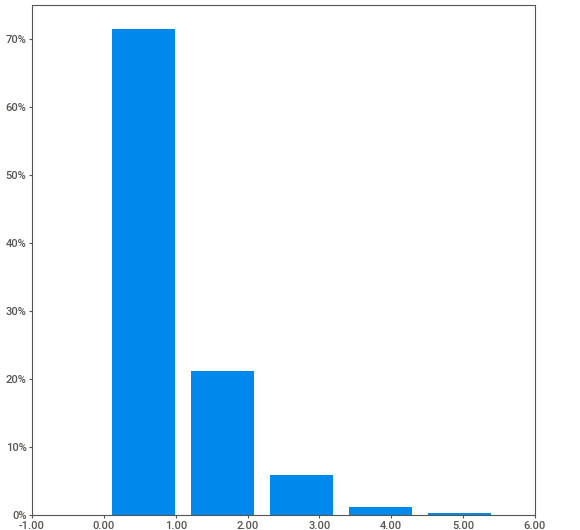
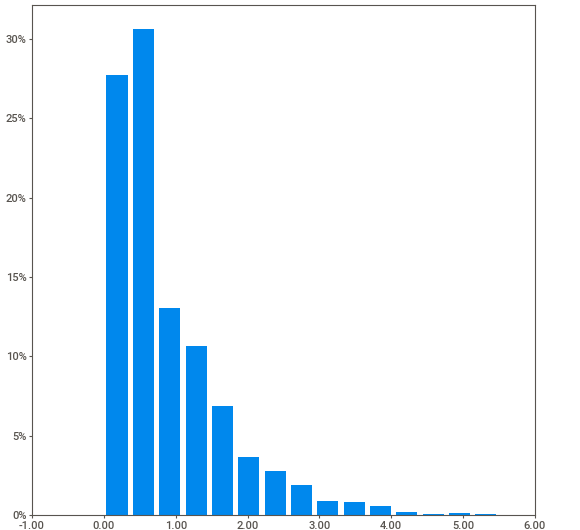
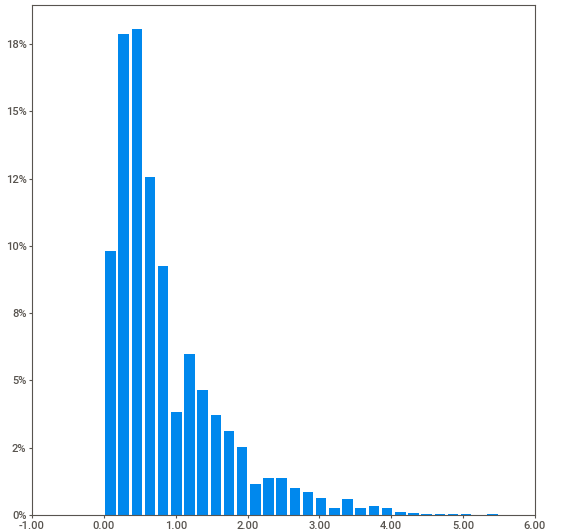
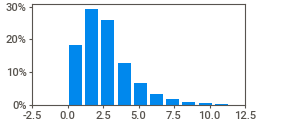
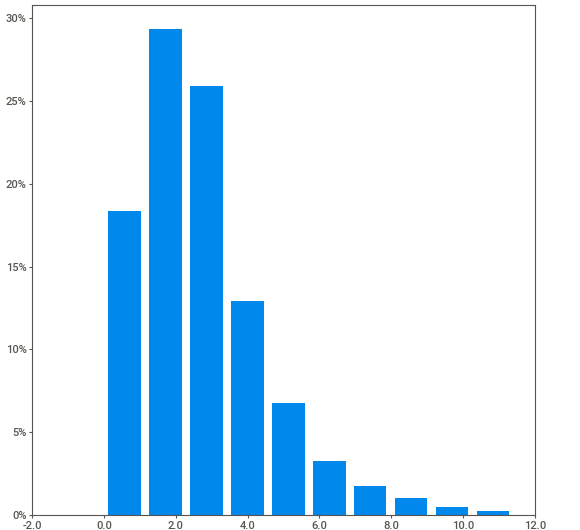
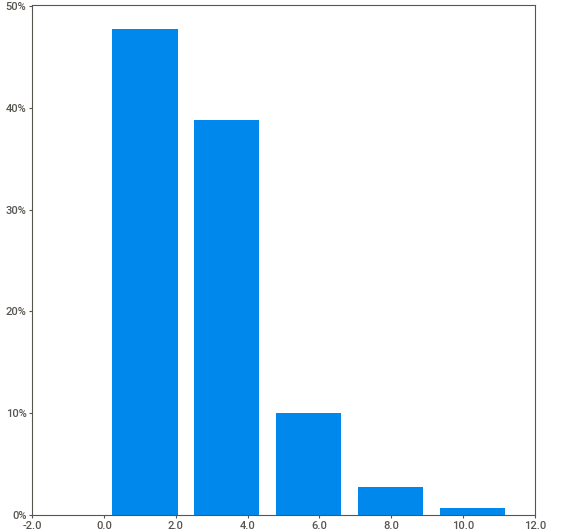
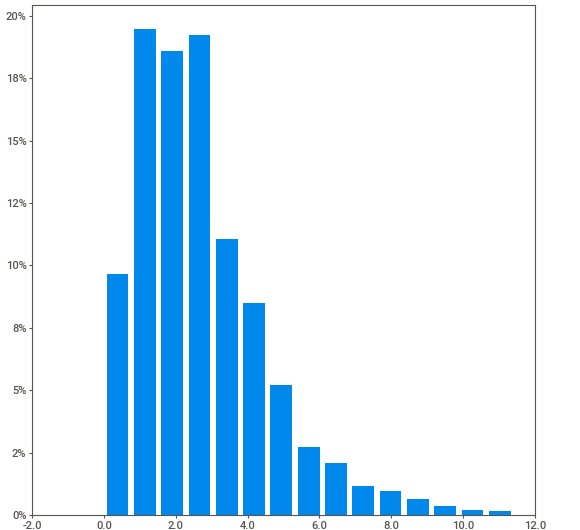
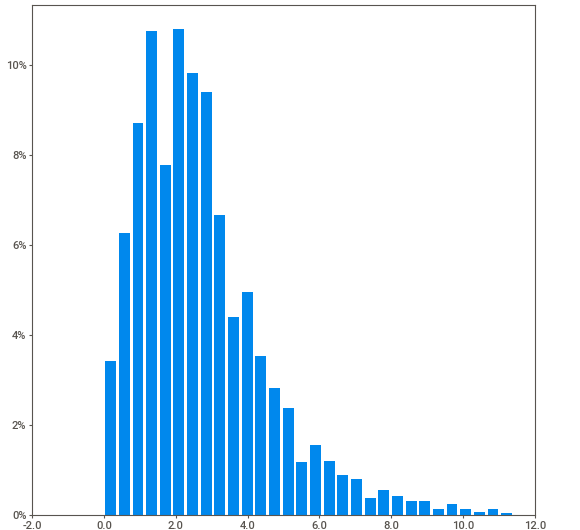
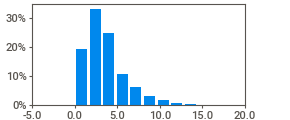
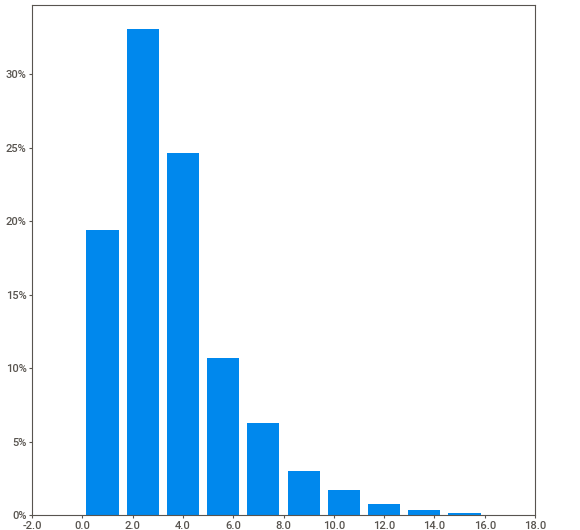
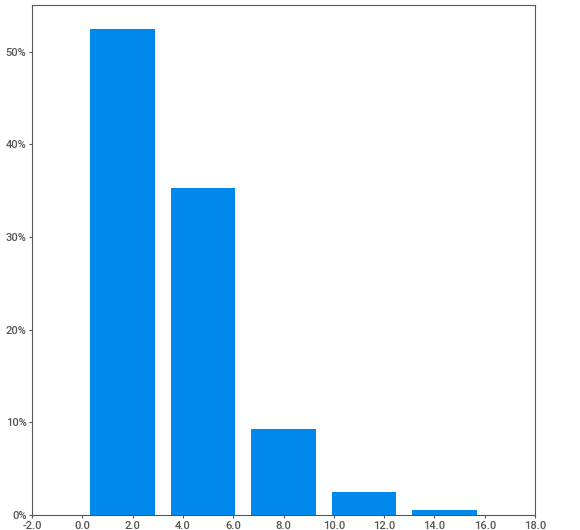
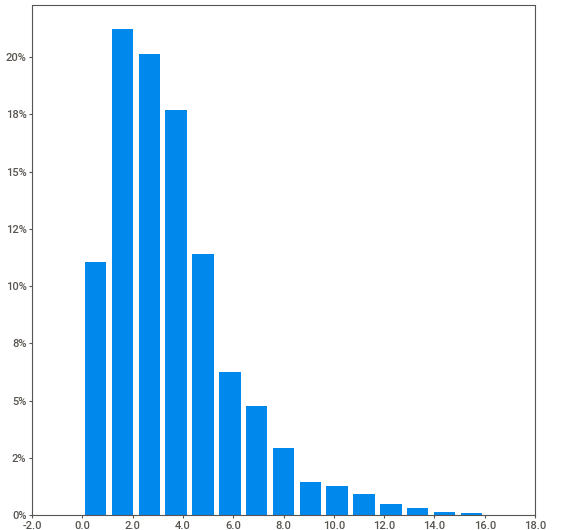
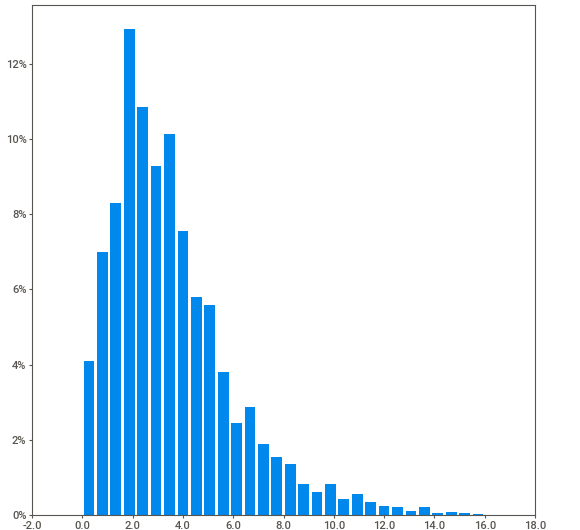
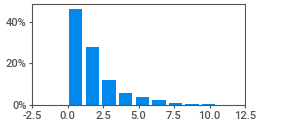
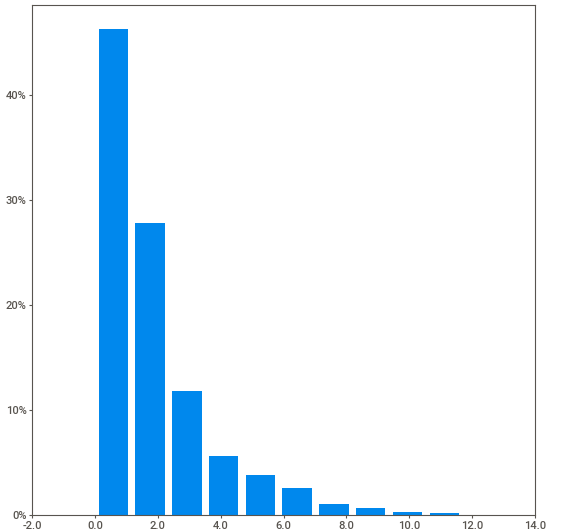
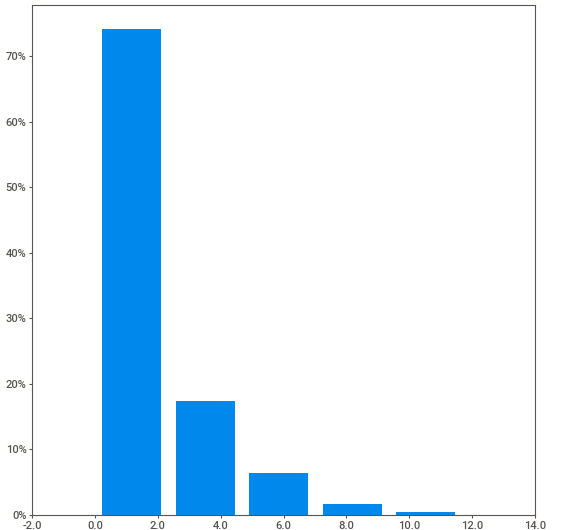
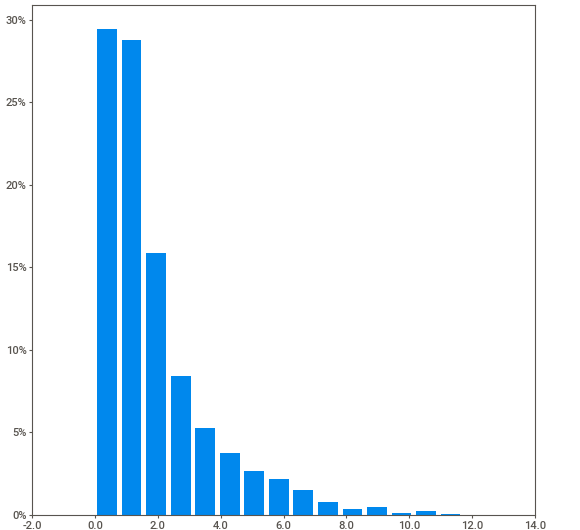
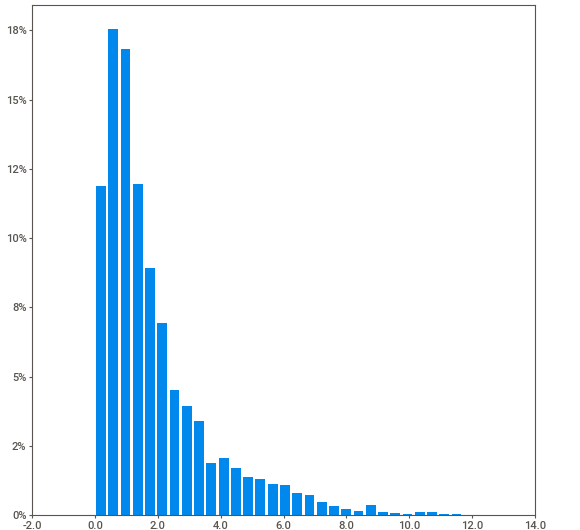
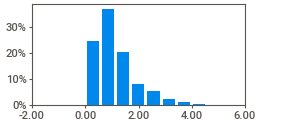
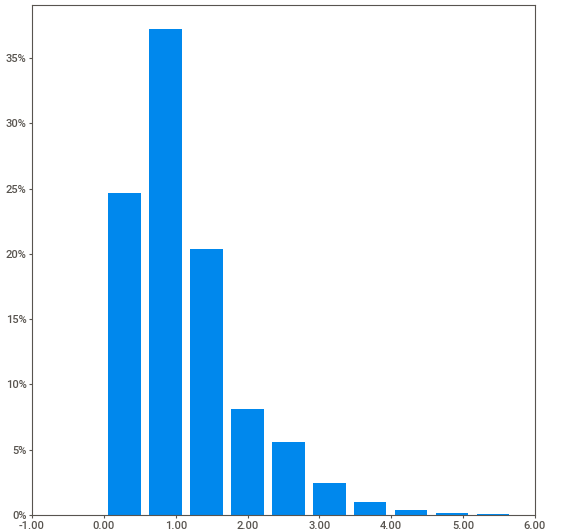
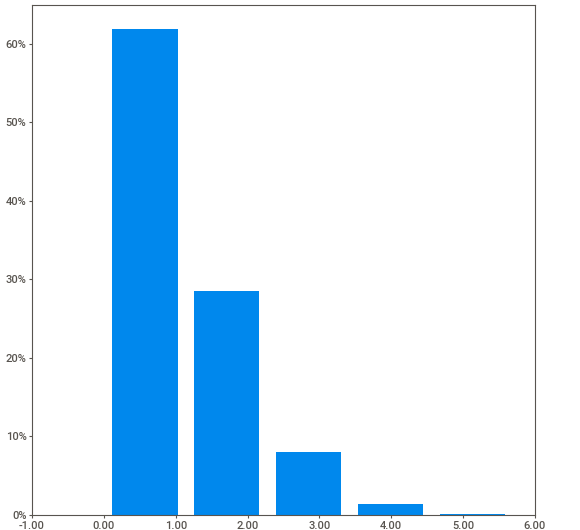
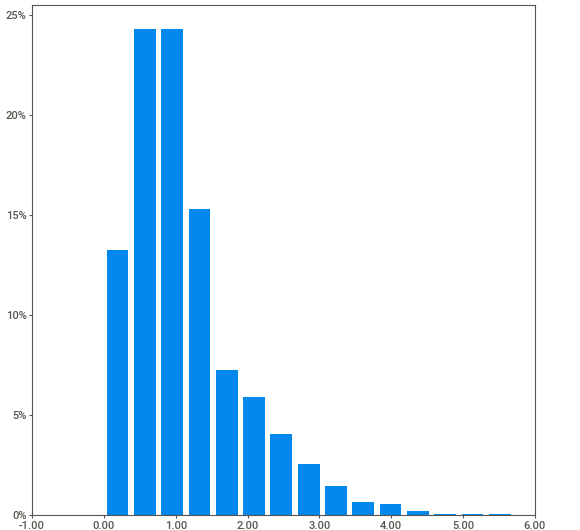
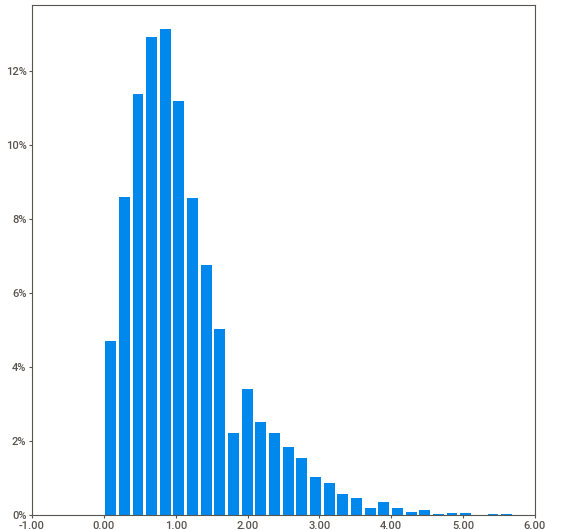
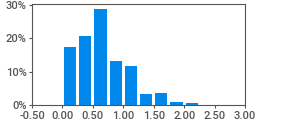
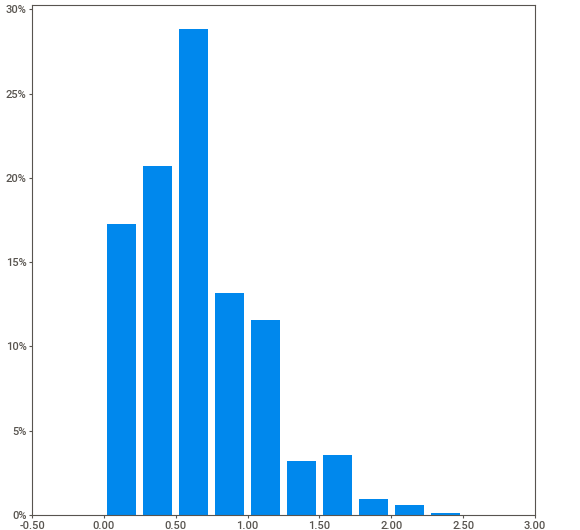
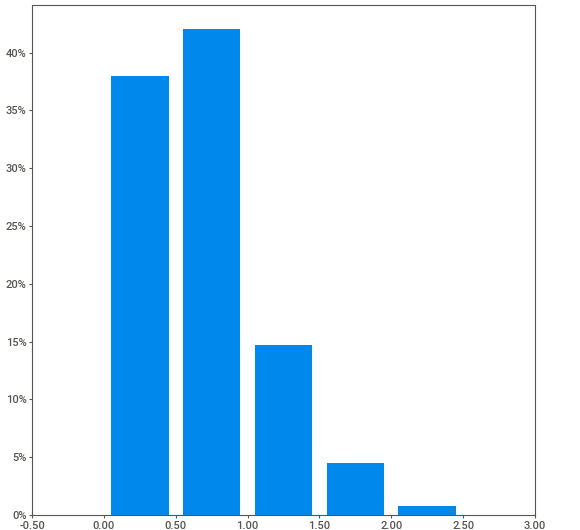
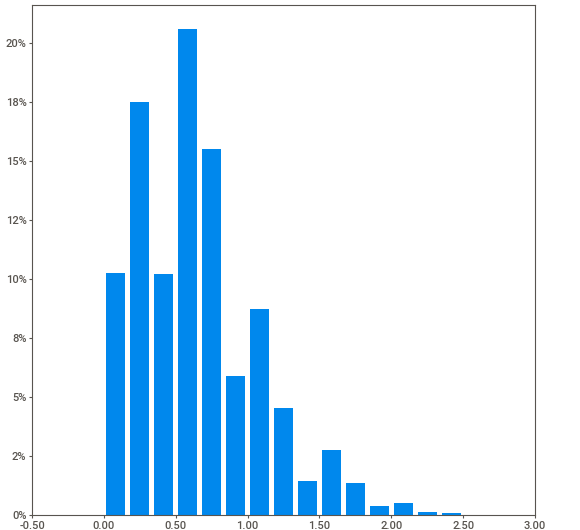
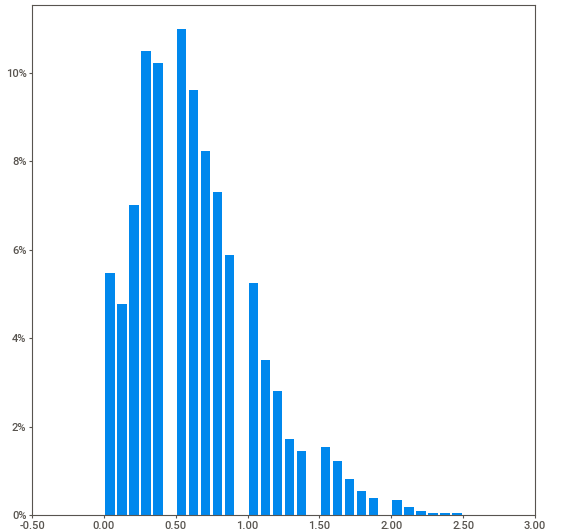
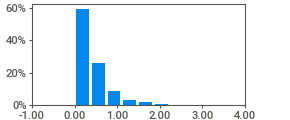
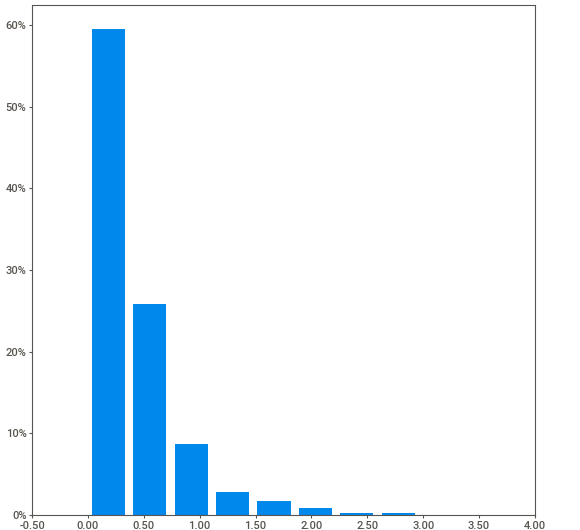
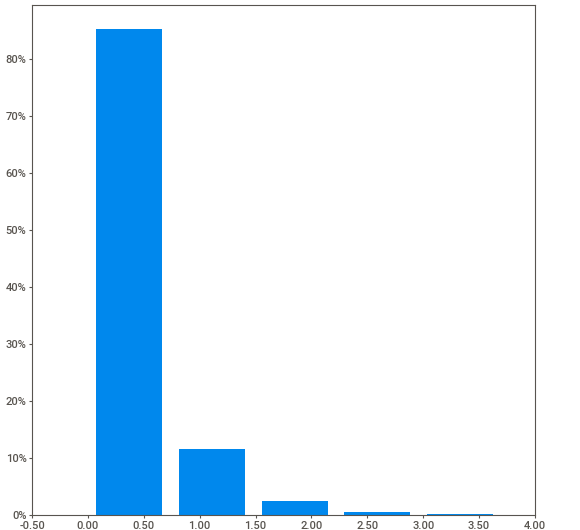
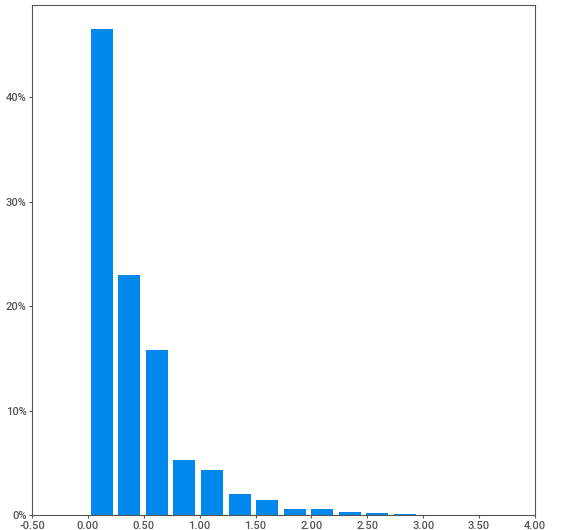
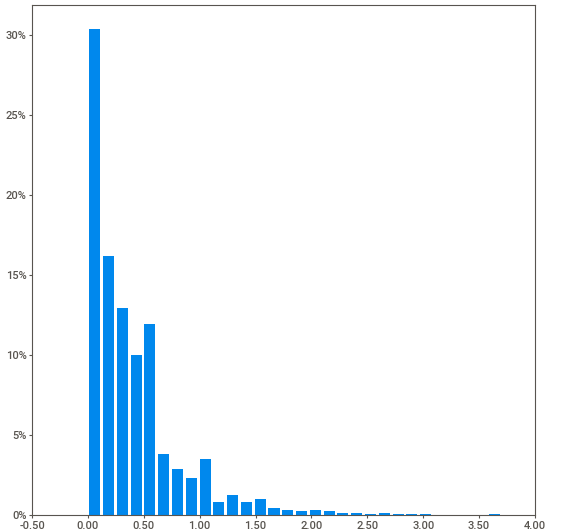
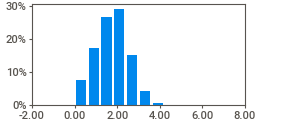
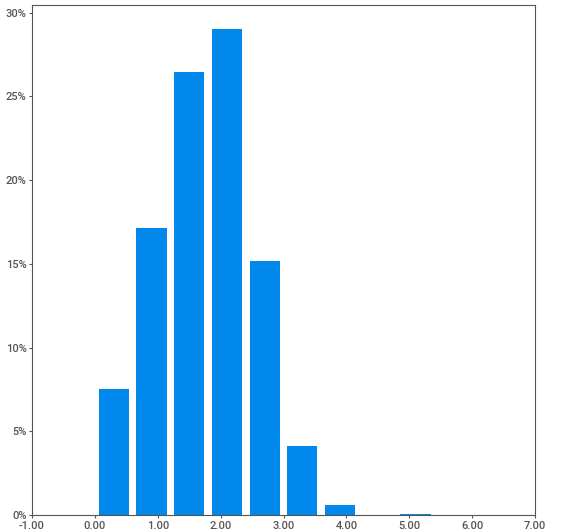
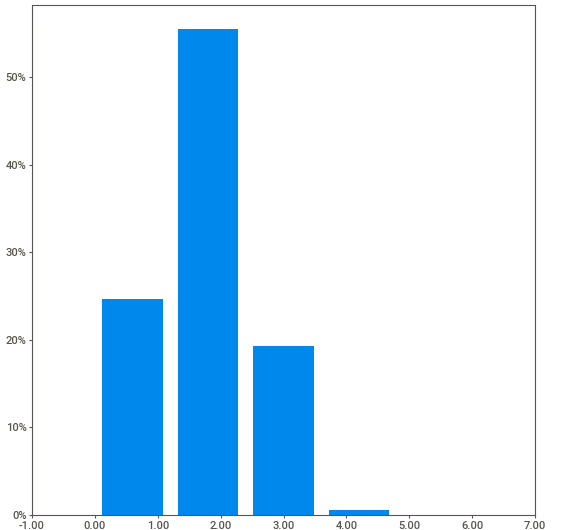
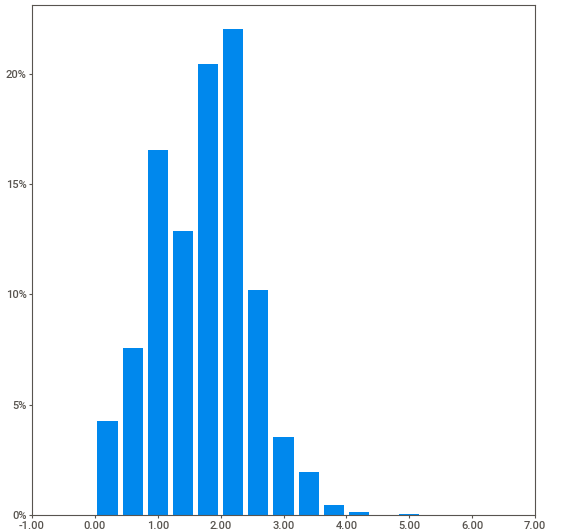
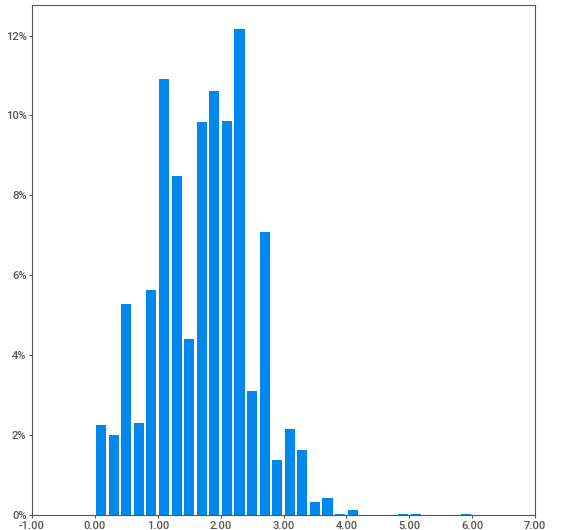
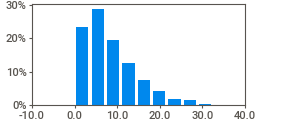
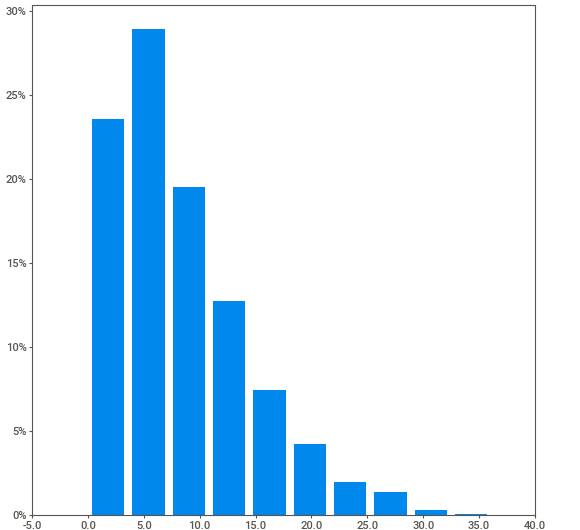
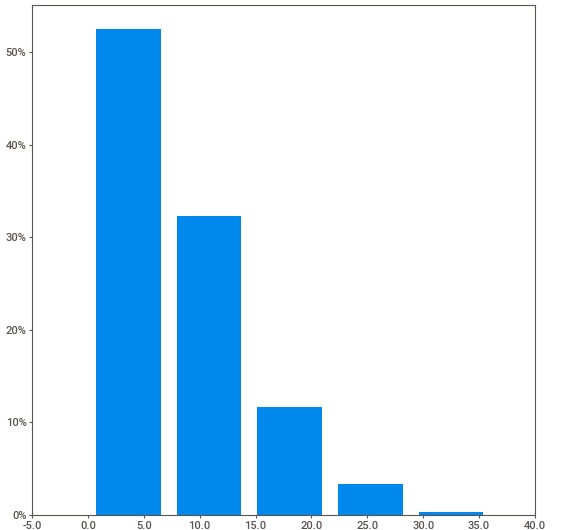
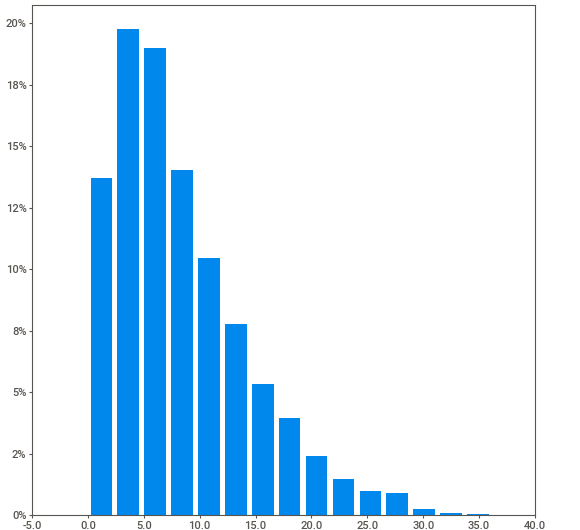
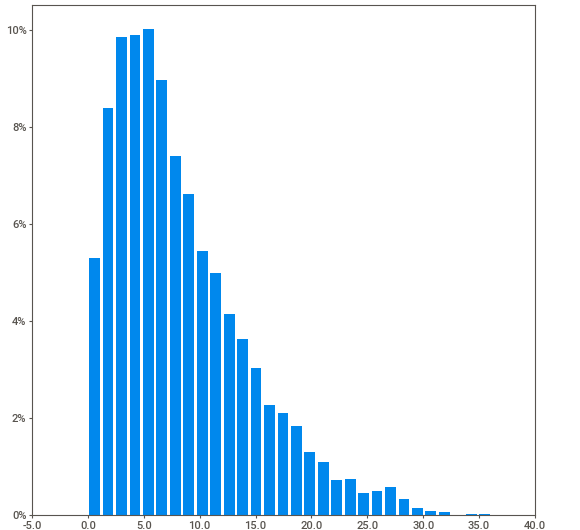
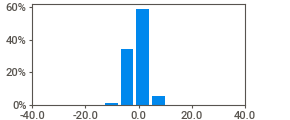
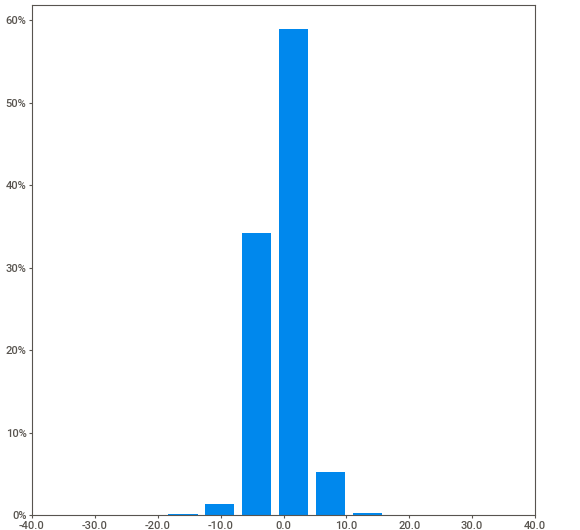
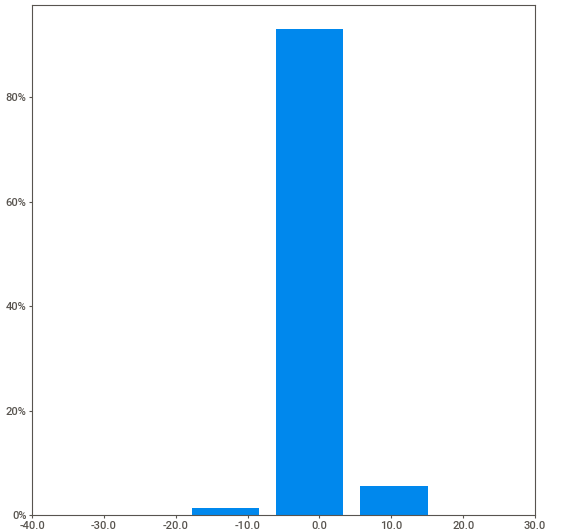
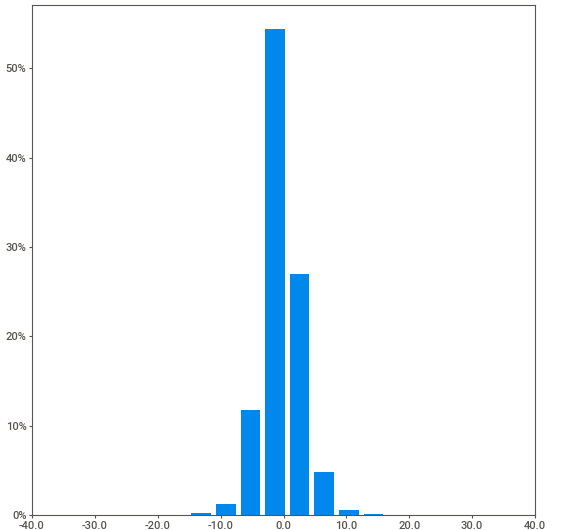
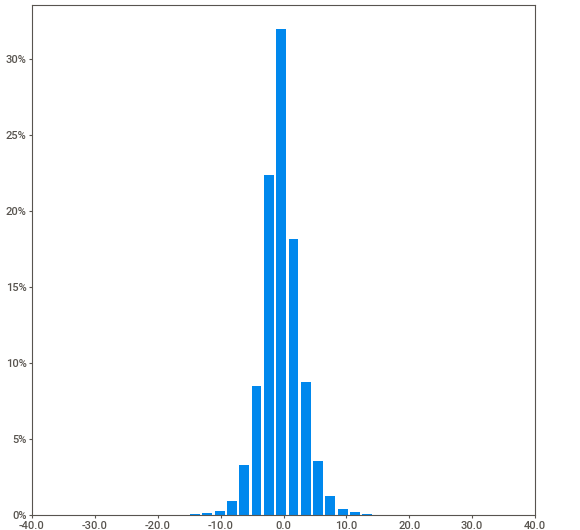
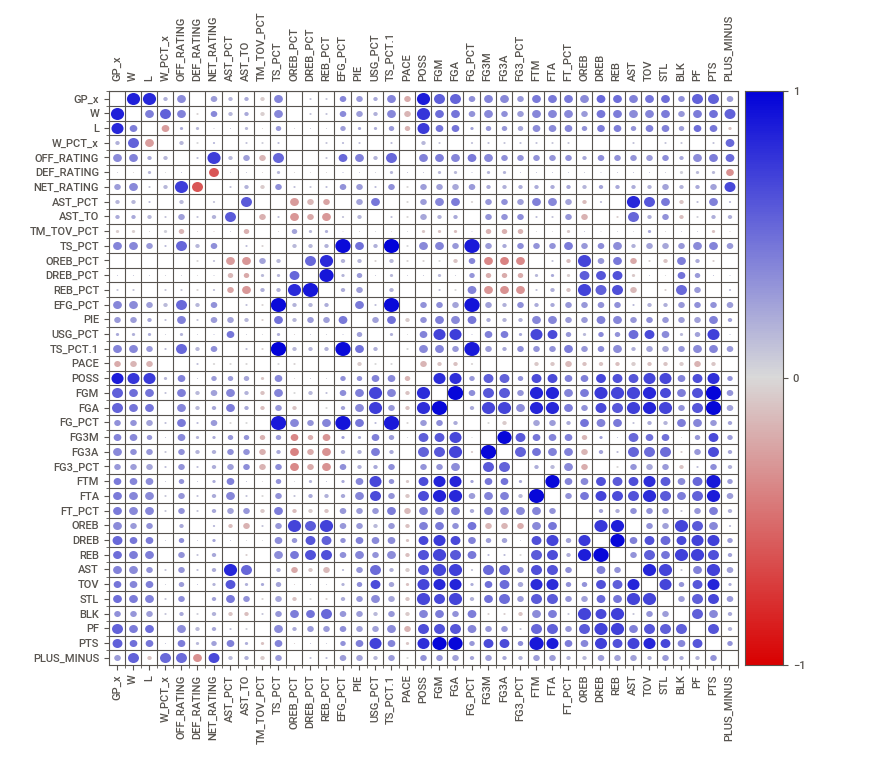
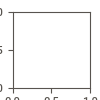

In [ ]:
#analyzing the dataset
cont_report = sv.analyze(continous)
#display the report
cont_report.show_notebook()

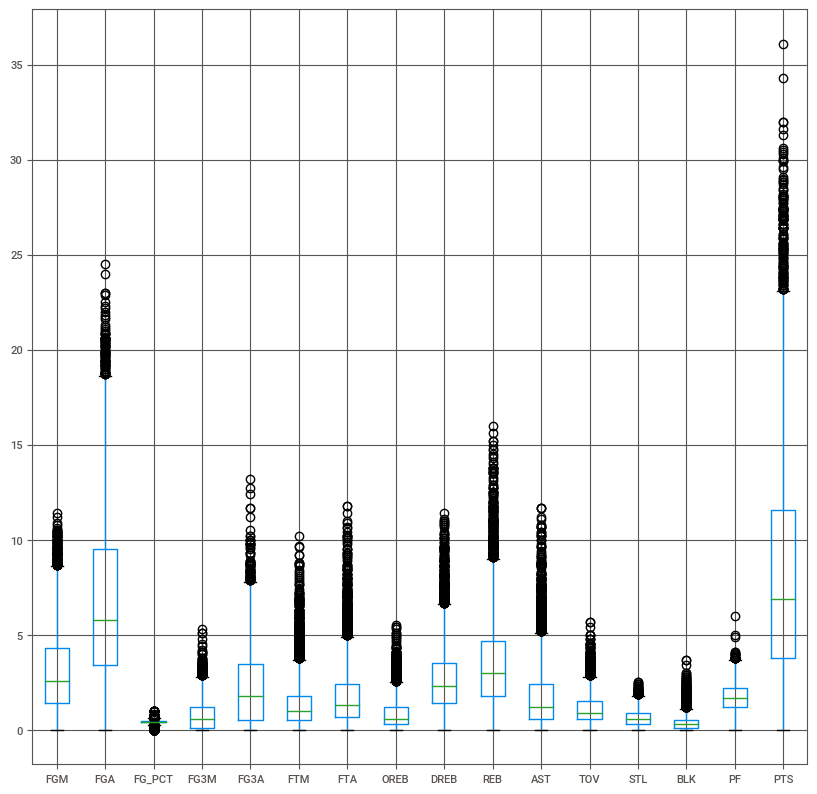

In [ ]:
continous[['FGM',	'FGA',	'FG_PCT',	'FG3M',	'FG3A',	'FTM',	'FTA', 'OREB',	'DREB',	'REB',	'AST',	'TOV',	'STL',	'BLK',	'PF',	'PTS'	]].boxplot(figsize=(10,10))

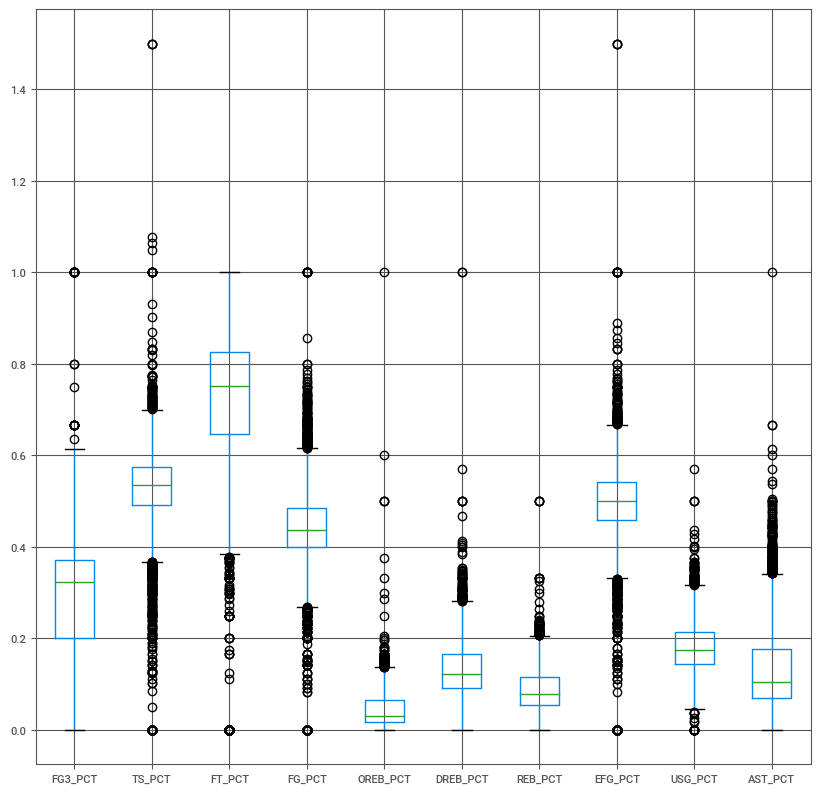

In [ ]:
continous[['FG3_PCT','TS_PCT', 'FT_PCT','FG_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'USG_PCT','AST_PCT']].boxplot(figsize=(10,10))

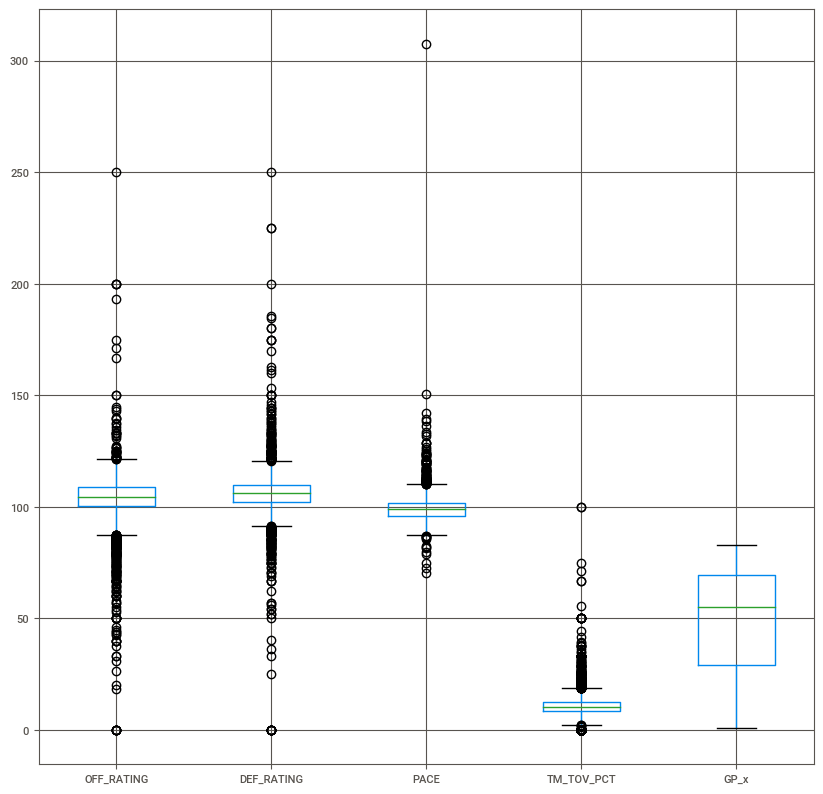

In [ ]:
continous[['OFF_RATING','DEF_RATING','PACE', 'TM_TOV_PCT','GP_x']].boxplot(figsize=(10,10))

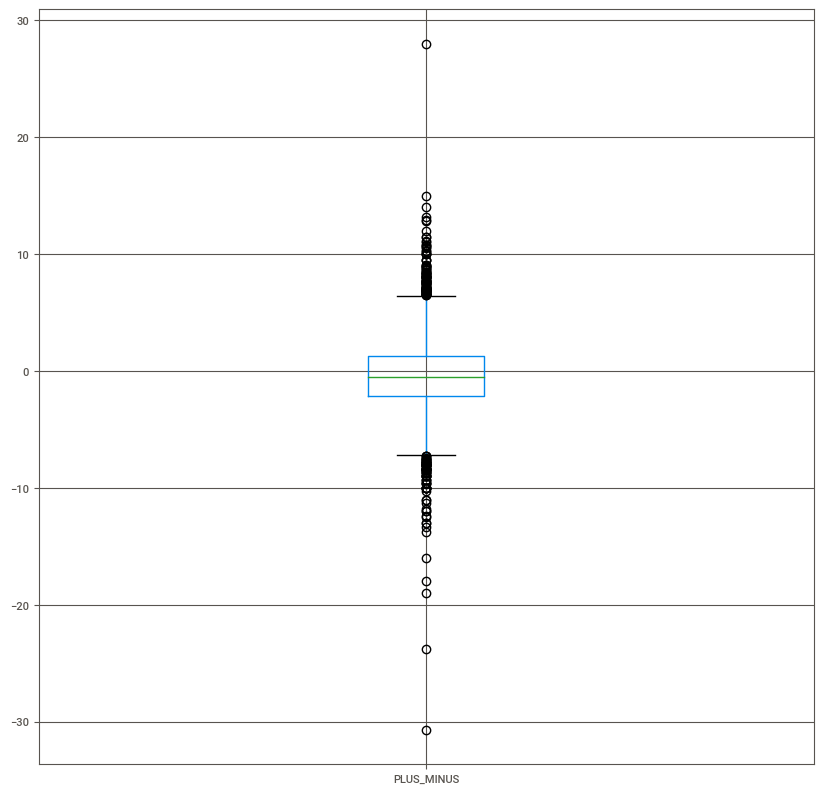

In [ ]:
continous[['PLUS_MINUS']].boxplot(figsize=(10,10))

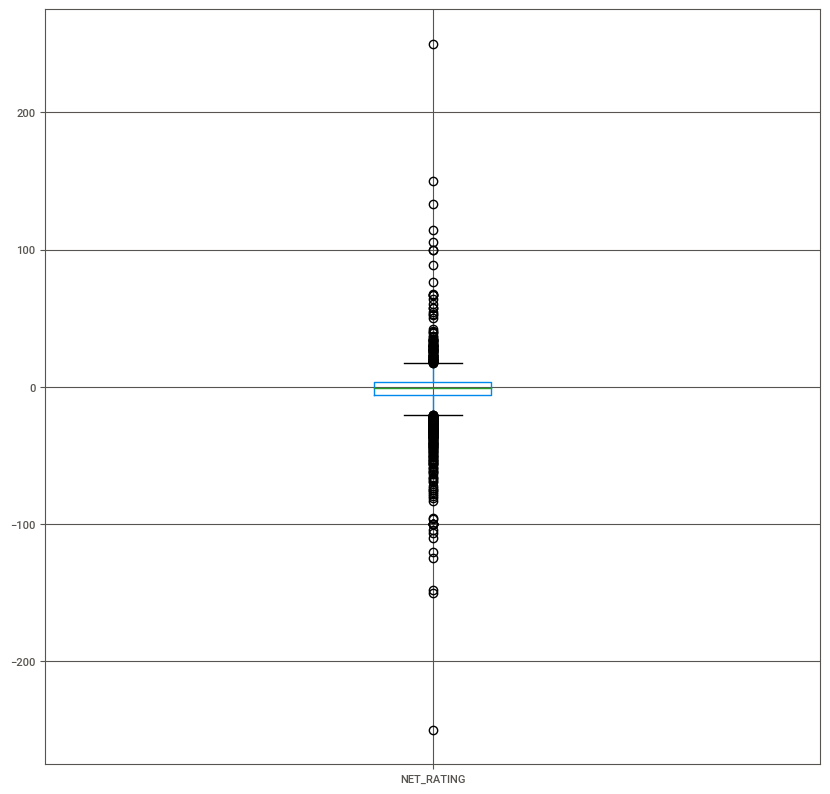

In [ ]:
continous[['NET_RATING']].boxplot(figsize=(10,10))

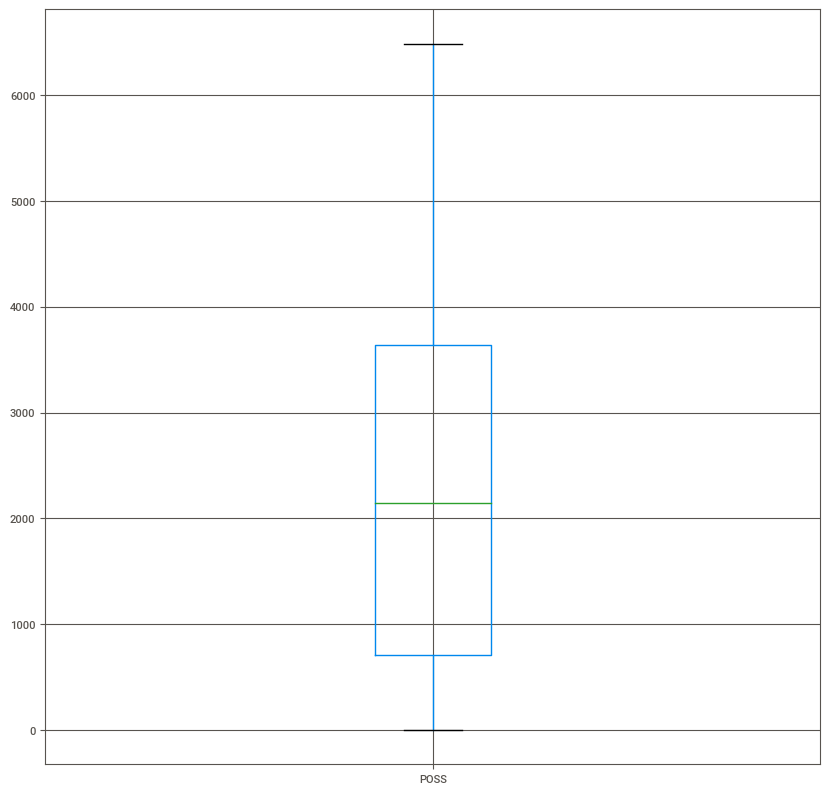

In [ ]:
continous[['POSS']].boxplot(figsize=(10,10))

                                             |          | [  0%]   00:00 -> (? left)


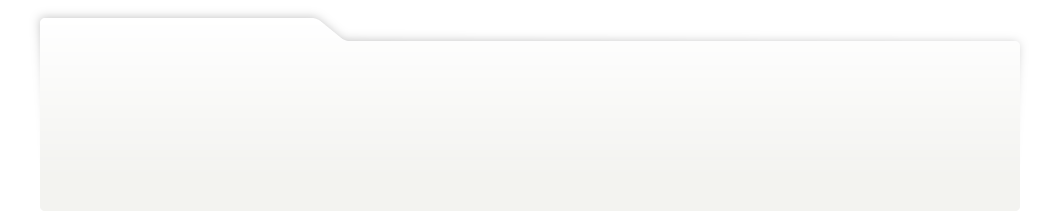
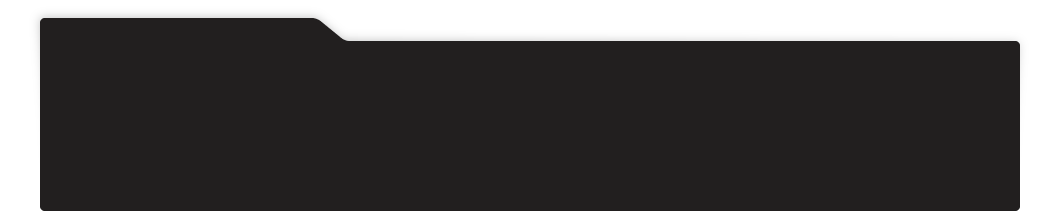
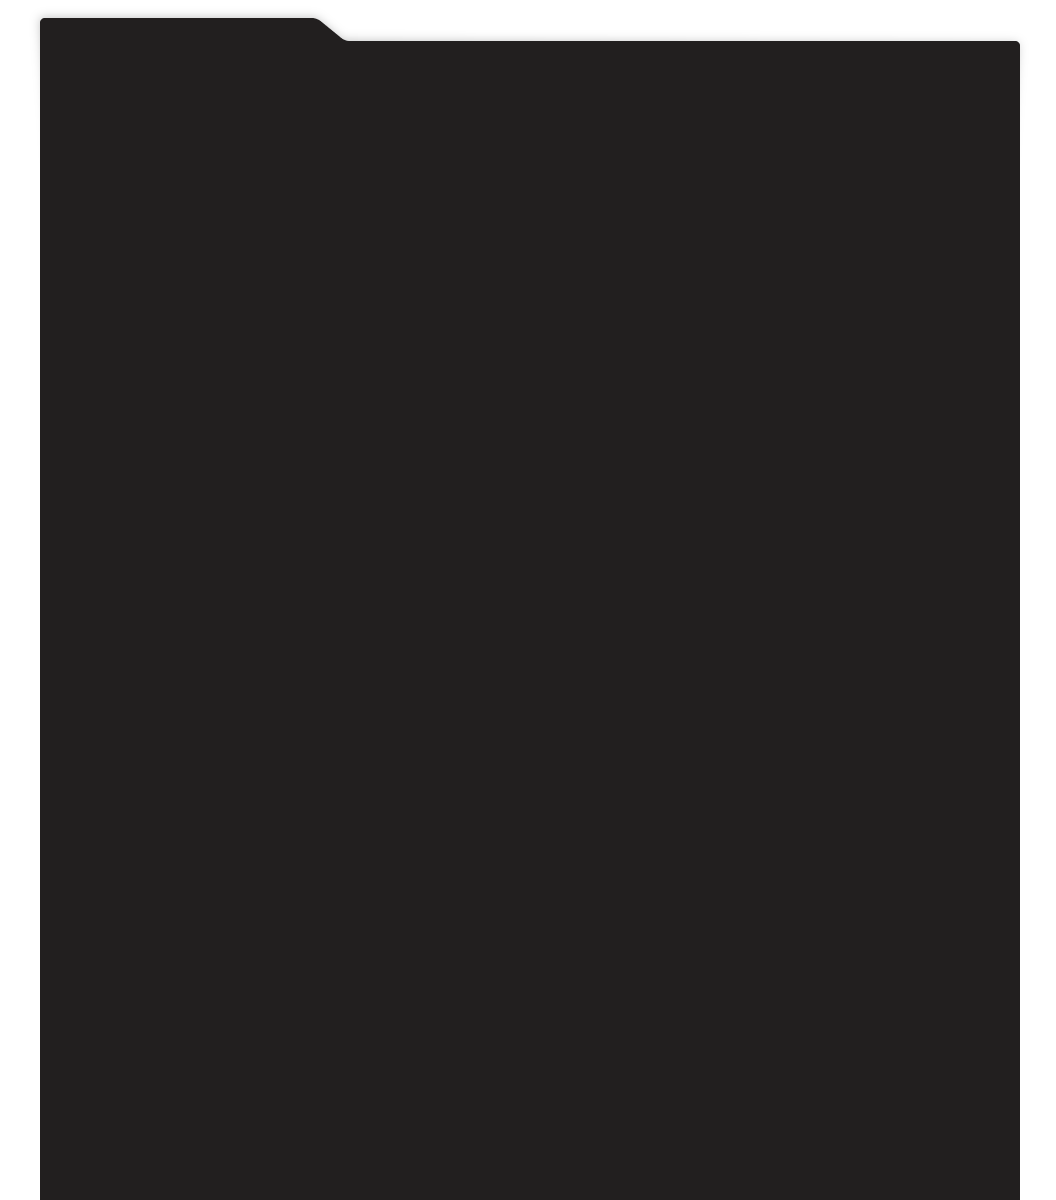
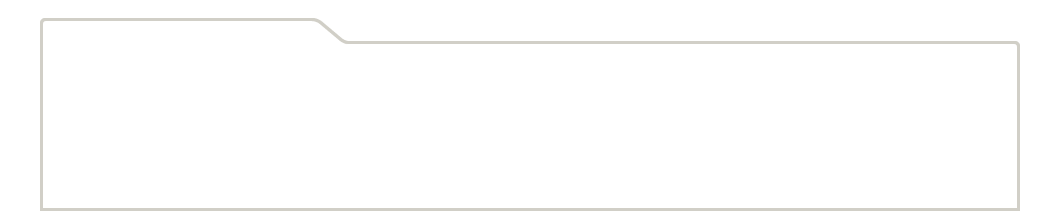
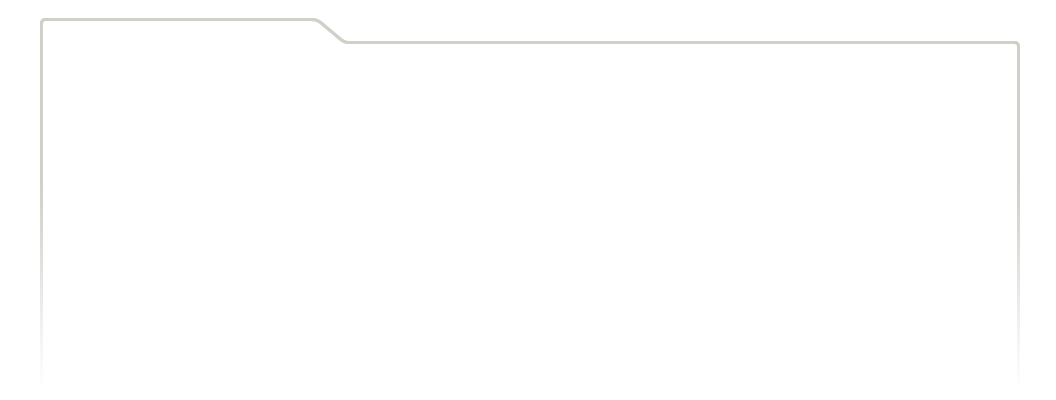
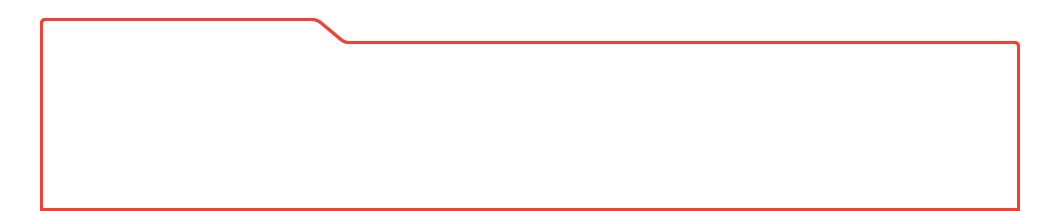
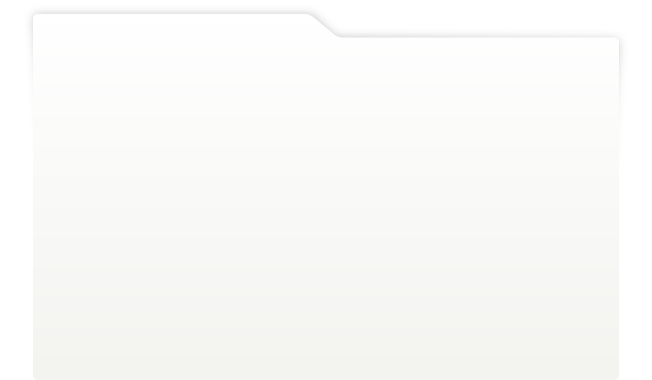
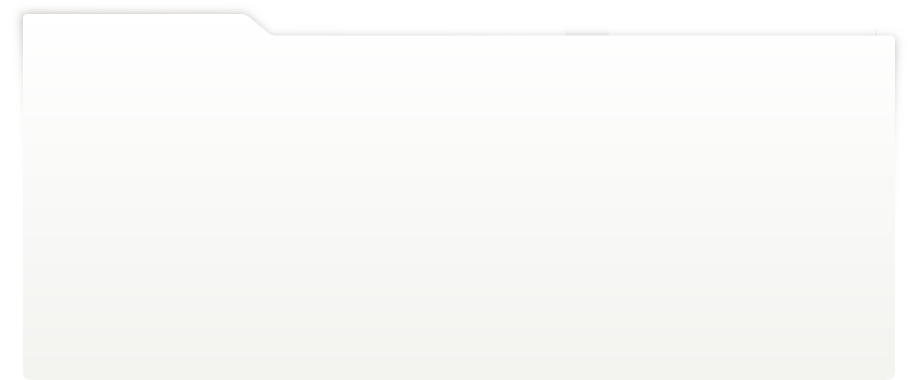
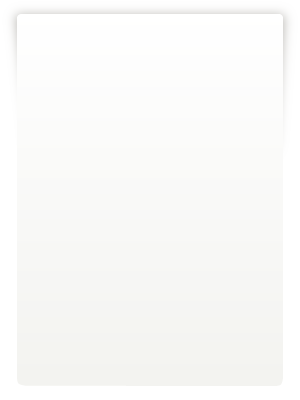
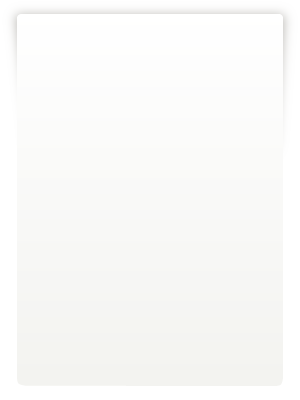
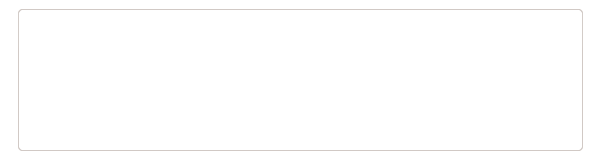
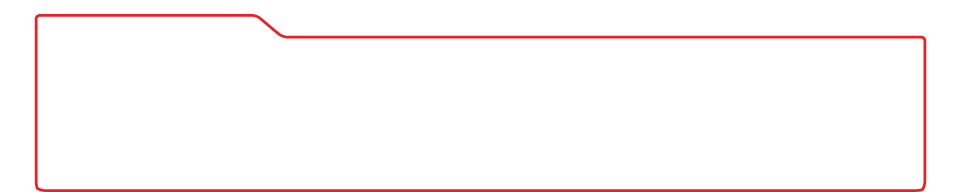
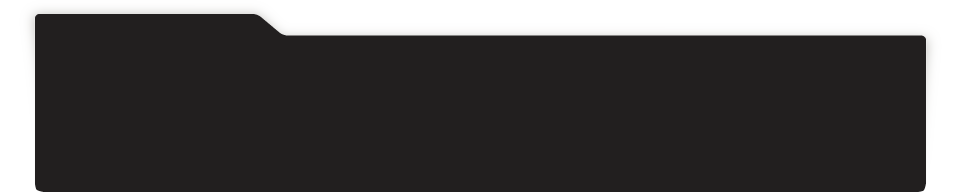
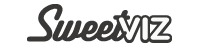
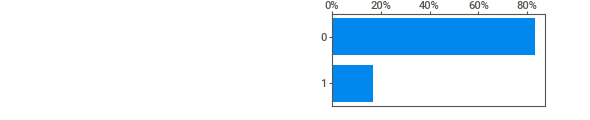
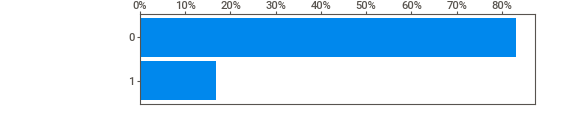
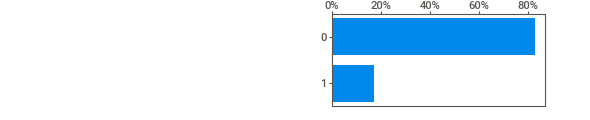
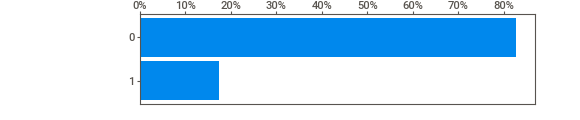
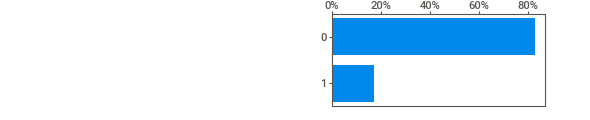
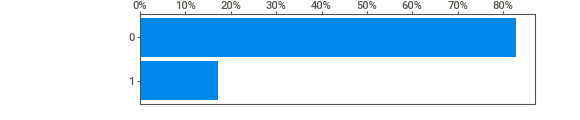
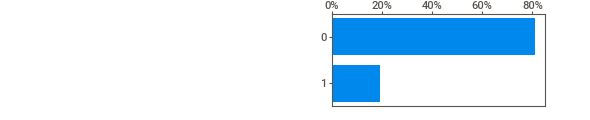
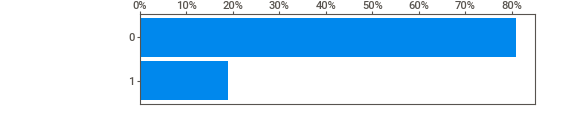
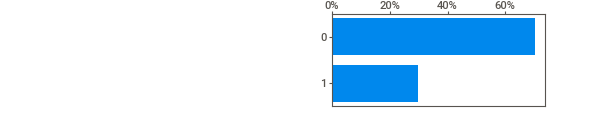
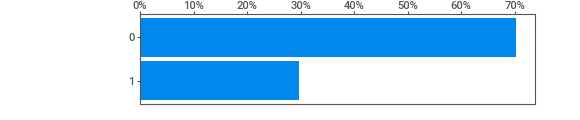
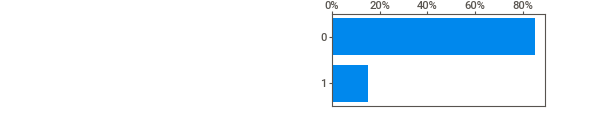
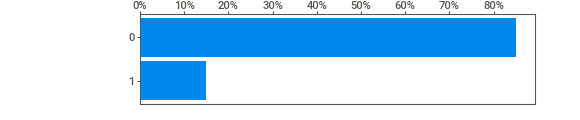
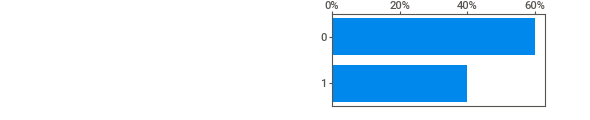
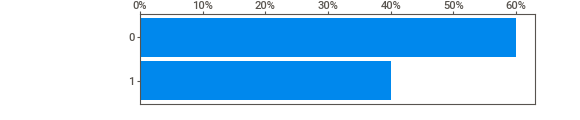
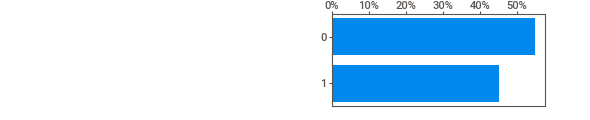
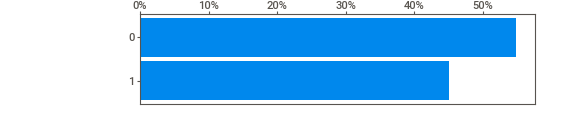
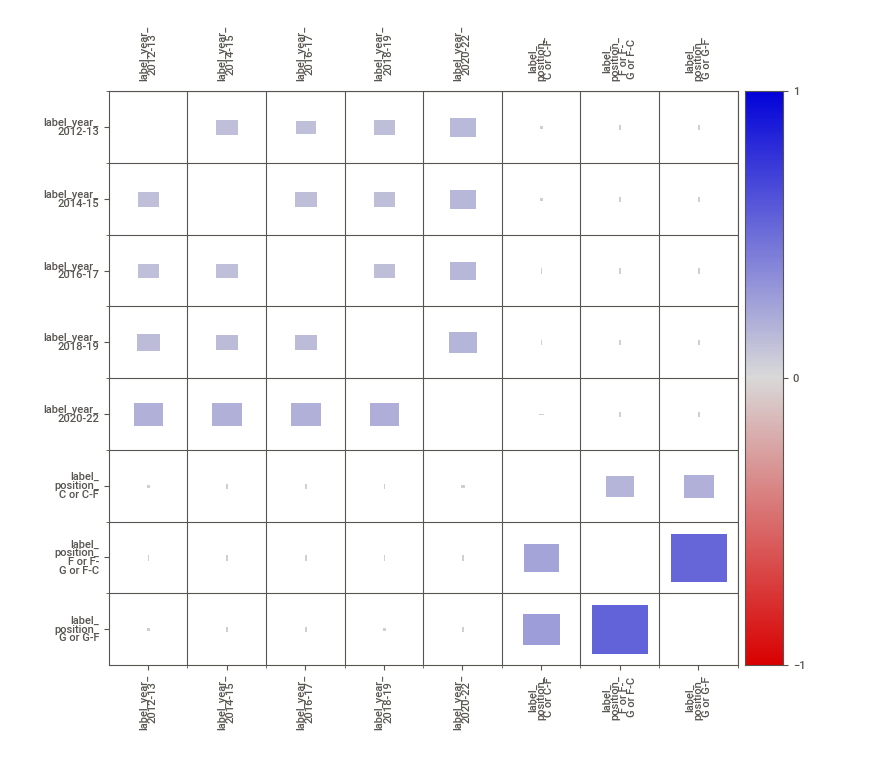
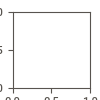

In [ ]:
#analyzing the dataset
Discrete_report = sv.analyze(categorical)
#display the report
Discrete_report.show_notebook()

#Preprocessing 

##Skew

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as stats


In [ ]:
# remove outliers

def iqrdf(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        s = 1.5*iqr
        l_bound = Q1 - s
        u_bound = Q3 + s
        df.loc[df[col] > u_bound,col] = u_bound
        df.loc[df[col] < l_bound,col] = l_bound
    return df

In [ ]:
# Powertransform


def pt_yeo(df):
    headers = list(df)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df = pt.fit_transform(df)
    df = pd.DataFrame(df)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
# Standardize data

def standard(df):
    scaler = StandardScaler()
    df_scale = scaler.fit_transform(df)
    #ind=df.index
    cols = df.columns
    df_scale = pd.DataFrame(df_scale, index=df.index, columns=cols) #(df_scale, index=ind, columns=cols)
    return df_scale

In [ ]:
# Minmax scaler to normalize between 1 and 0

def minmax(df):
    headers = list(df)
    s_scaler = MinMaxScaler()
    scaled = s_scaler.fit_transform(df)
    df = pd.DataFrame(scaled)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
continous.skew()

GP_x          -0.470083
W              0.245606
L              0.198999
W_PCT_x       -0.125518
OFF_RATING    -1.479258
DEF_RATING    -0.445506
NET_RATING    -1.078009
AST_PCT        1.370653
AST_TO         1.804781
TM_TOV_PCT     4.124163
TS_PCT        -1.392996
OREB_PCT       4.450232
DREB_PCT       1.804457
REB_PCT        1.369804
EFG_PCT       -1.026707
PIE          -29.554535
USG_PCT        0.563919
TS_PCT.1      -1.392996
PACE           9.908002
POSS           0.297826
FGM            0.955393
FGA            0.905957
FG_PCT        -0.573202
FG3M           1.196992
FG3A           1.028134
FG3_PCT       -0.180477
FTM            2.038707
FTA            1.887743
FT_PCT        -1.945206
OREB           1.735504
DREB           1.278652
REB            1.350393
AST            1.856577
TOV            1.319637
STL            0.896564
BLK            2.208992
PF             0.036280
PTS            1.088145
PLUS_MINUS    -0.028376
dtype: float64

In [ ]:
from scipy import stats as stats
def yeo(df):
  new_df = []
  for col in df.columns:
    # print(col)
    # print(df.loc[:,col])
    new_col = stats.yeojohnson(df.loc[:,col])[0]
    # print(new_col.shape)
    new_df.append(new_col)
  new_df = np.transpose(np.array(new_df))
  new_df = pd.DataFrame(new_df, columns=df.columns)
  return(new_df)

In [ ]:
con_1 = pt_yeo(continous)

In [ ]:
con_2 = iqrdf(con_1)

In [ ]:
con_3 = standard(con_2)

In [ ]:
con_4 = minmax(con_3)

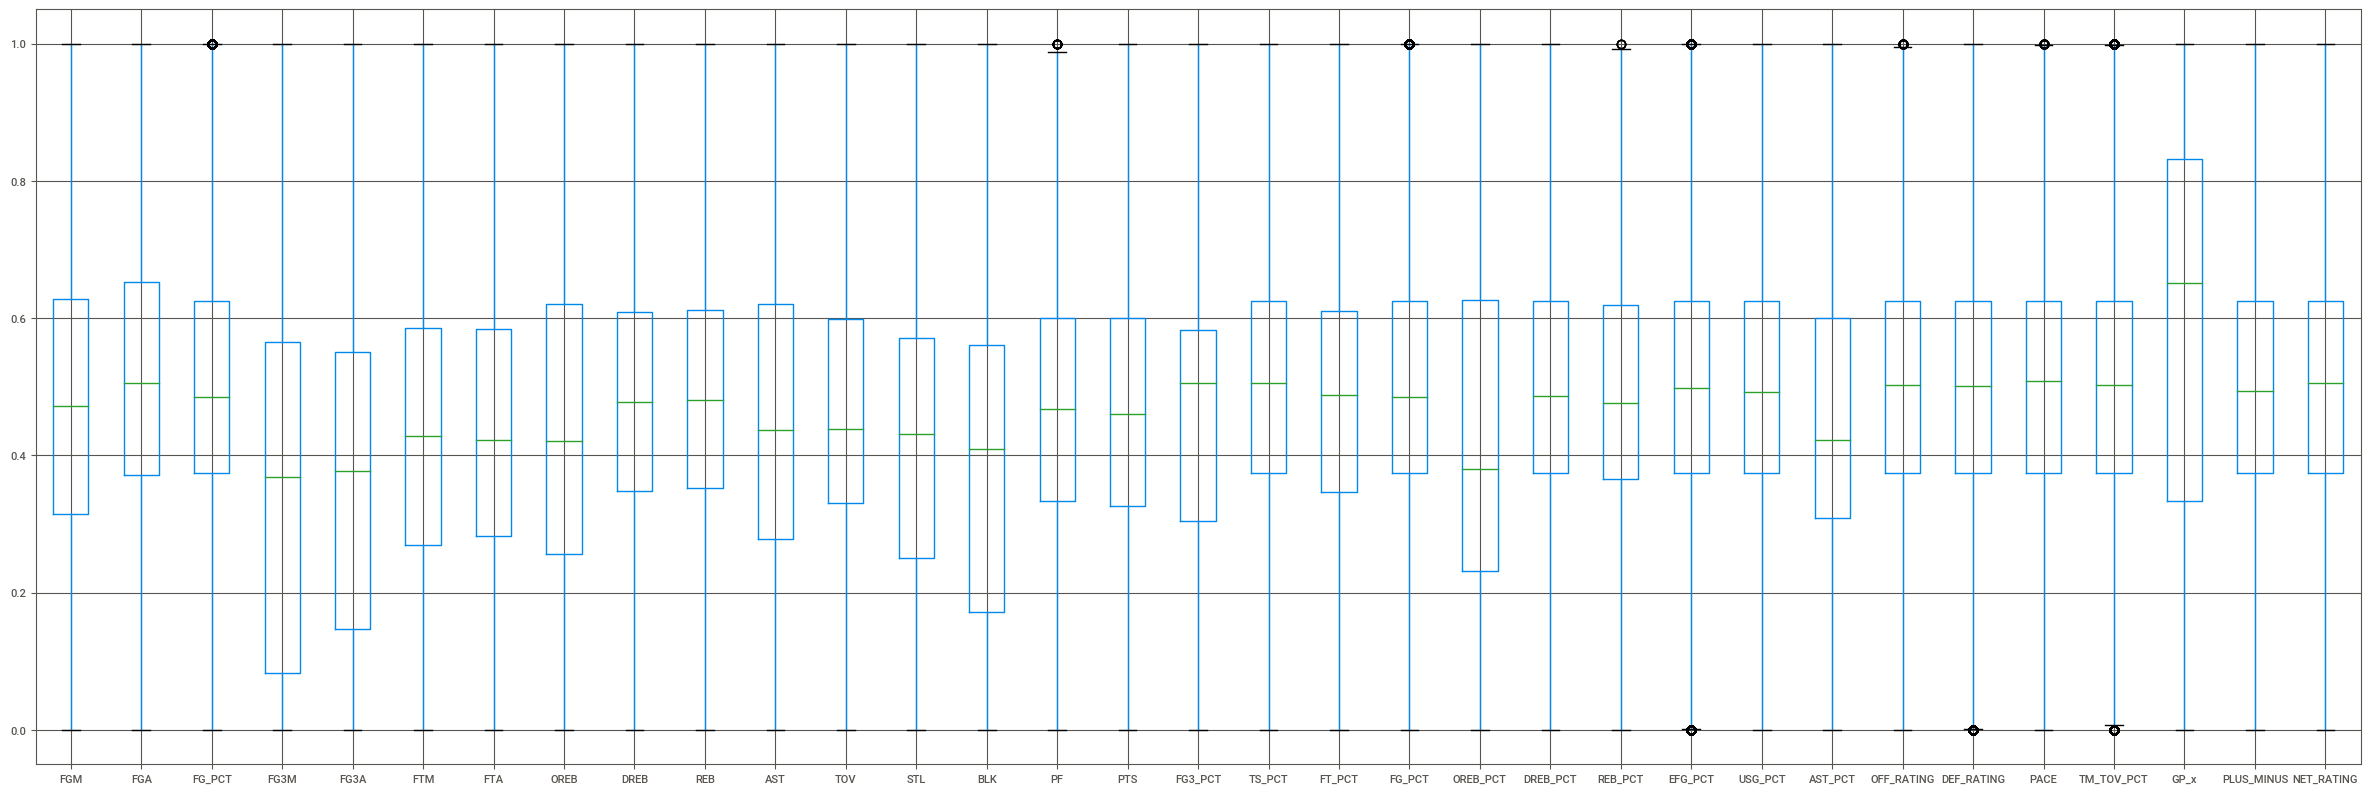

In [ ]:
con_4[['FGM',	'FGA',	'FG_PCT',	'FG3M',	'FG3A',	'FTM',	'FTA', 'OREB',	'DREB',	'REB',	'AST',	'TOV',	'STL',	'BLK',	'PF',	'PTS','FG3_PCT','TS_PCT', 'FT_PCT','FG_PCT', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'EFG_PCT', 'USG_PCT','AST_PCT','OFF_RATING','DEF_RATING','PACE', 'TM_TOV_PCT','GP_x','PLUS_MINUS','NET_RATING']].boxplot(figsize=(30,10))

In [ ]:
continuous_final = con_4

In [ ]:
continuous_final.skew()

GP_x         -0.449567
W            -0.211028
L            -0.193314
W_PCT_x      -0.031922
OFF_RATING   -0.326397
DEF_RATING   -0.086565
NET_RATING   -0.214289
AST_PCT       0.095610
AST_TO       -0.195552
TM_TOV_PCT    0.020754
TS_PCT       -0.259103
OREB_PCT      0.225624
DREB_PCT      0.016407
REB_PCT       0.014052
EFG_PCT      -0.178984
PIE           0.040516
USG_PCT       0.132162
TS_PCT.1     -0.259103
PACE         -0.052207
POSS         -0.315515
FGM          -0.012131
FGA          -0.024584
FG_PCT        0.101213
FG3M          0.100368
FG3A         -0.008781
FG3_PCT      -0.666580
FTM           0.052374
FTA           0.027133
FT_PCT       -0.130547
OREB          0.080456
DREB         -0.007539
REB          -0.004218
AST           0.054449
TOV           0.009929
STL           0.013319
BLK           0.140865
PF           -0.082478
PTS          -0.023589
PLUS_MINUS    0.051762
dtype: float64

#Merge Data Frame

In [ ]:
continuous_final.reset_index(drop=True, inplace=True)
categorical.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)

In [ ]:
con_cat = pd.concat([continuous_final, categorical], axis=1)

In [ ]:
Complete_final = pd.concat([con_cat, target], axis=1) 

In [ ]:
Complete_final 

GP_x         W         L   W_PCT_x  OFF_RATING  DEF_RATING  NET_RATING   AST_PCT    AST_TO  TM_TOV_PCT    TS_PCT  OREB_PCT  DREB_PCT   REB_PCT   EFG_PCT       PIE   USG_PCT  TS_PCT.1      PACE      POSS       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA    FT_PCT      OREB      DREB       REB       AST       TOV       STL       BLK        PF       PTS  PLUS_MINUS  label_year_2012-13  label_year_2014-15  label_year_2016-17  label_year_2018-19  label_year_2020-22  label_position_C or C-F  label_position_F or F-G or F-C  label_position_G or G-F  Y
0     0.516245  0.512548  0.344406  0.605362    0.337814    0.216889    0.568634  0.733510  0.734789    0.501950  0.266862  0.277649  0.378846  0.359900  0.250287  0.549559  0.477575  0.266862  0.254487  0.402178  0.298372  0.409601  0.210788  0.368393  0.402447  0.457530  0.307733  0.309540  0.566071  0.256026  0.293273  0.298029  0.571101  0.369804  0.377081  0.000000  0.197335  0.331965    0.588911                   1                   0                   0                   0                   0                        0                               0                        1  0
1     0.577773  0.371560  0.555366  0.331044    0.267100    0.514761    0.282726  0.256045  0.220034    0.988317  0.475105  0.790411  0.851562  0.798379  0.545944  0.452906  0.335325  0.475105  0.097074  0.474800  0.359273  0.364825  0.714462  0.000000  0.000000  0.000000  0.269963  0.358982  0.228750  0.722656  0.653198  0.672249  0.278775  0.469986  0.316956  0.408899  0.704962  0.331965    0.299963                   1                   0                   0                   0                   0                        1                               0                        0  0
2     0.763312  0.623642  0.502553  0.551767    0.588992    0.378389    0.673786  0.356908  0.305738    0.514080  0.502136  0.474744  0.663010  0.612388  0.533915  0.601646  0.715859  0.502136  0.376914  0.729872  0.707735  0.733066  0.508312  0.653566  0.645087  0.519882  0.600212  0.625887  0.381749  0.594848  0.731262  0.694221  0.476564  0.660123  0.571517  0.304529  0.756870  0.663537    0.718178                   1                   0                   0                   0                   0                        0                               1                        0  0
3     0.116458  0.195063  0.108972  0.628648    0.621990    0.304073    0.766851  0.448047  0.496716    0.501950  0.656414  0.686801  0.593569  0.622455  0.658900  0.755714  0.488580  0.656414  0.063654  0.302438  0.694274  0.649253  0.827091  0.000000  0.034284  0.000000  0.614219  0.615881  0.459645  0.817354  0.701621  0.739731  0.596736  0.598569  0.571517  0.834294  0.521336  0.621795    0.867368                   1                   0                   0                   0                   0                        1                               0                        0  0
4     0.726100  0.575695  0.515948  0.512191    0.628011    0.456607    0.648635  0.448047  0.637905    0.102801  0.457208  0.637569  0.765014  0.711786  0.477263  0.902713  0.768371  0.457208  0.218010  0.781053  0.879514  0.859997  0.642759  0.000000  0.034284  0.384660  0.640186  0.635549  0.522748  0.794290  0.877594  0.848597  0.596736  0.469986  0.528576  0.892384  0.678921  0.762711    0.718178                   1                   0                   0                   0                   0                        1                               0                        0  0
...        ...       ...       ...       ...         ...         ...         ...       ...       ...         ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...         ...                 ...                 ...                 ...      

In [ ]:
Complete_final.isna().sum()

GP_x                              0
W                                 0
L                                 0
W_PCT_x                           0
OFF_RATING                        0
DEF_RATING                        0
NET_RATING                        0
AST_PCT                           0
AST_TO                            0
TM_TOV_PCT                        0
TS_PCT                            0
OREB_PCT                          0
DREB_PCT                          0
REB_PCT                           0
EFG_PCT                           0
PIE                               0
USG_PCT                           0
TS_PCT.1                          0
PACE                              0
POSS                              0
FGM                               0
FGA                               0
FG_PCT                            0
FG3M                              0
FG3A                              0
FG3_PCT                           0
FTM                               0
FTA                         

#extract data

In [ ]:
Complete_final.to_csv('/content/drive/MyDrive/Capstone/Complete_final_allnba',index=False)